# 505-01-FA22 {-}
# Team 1 {-}
# Final Project {-}

# Github Repository: \ {-}
https://github.com/amcarr-ds/ads505_business_proj.git

# Bankruptcy Data Set (Zięba et al., 2016b): \ {-}
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 25.4 MB/s 


## Feature name conversion map {-}

|Original Feature Name                                        |Changed|New Feature Name     |
|-------------------------------------------------------------|-------|---------------------|
|X1 net profit / total assets                                 |-->    |net_prof_to_tot_asset|
|                                                             |       |s_ratio              |
|X2 total liabilities / total assets                          |-->    |tot_liab_to_tot_asset|
|                                                             |       |s_ratio              |
|X3 working capital / total assets                            |-->    |work_cap_to_tot_asset|
|                                                             |       |s_ratio              |
|X4 current assets / short-term liabilities                   |-->    |curr_assets_to_st_lia|
|                                                             |       |b_ratio              |
|X5 [(cash + short-term securities + receivables - short-term |-->    |equ_to_ann_ops_exp_ra|
|liabilities) / (operating expenses - depreciation)] * 365    |       |tio                  |
|X6 retained earnings / total assets                          |-->    |ret_earn_to_tot_asset|
|                                                             |       |s_ratio              |
|X7 EBIT / total assets                                       |-->    |ebit_to_tot_assets_ra|
|                                                             |       |tio                  |
|X8 book value of equity / total liabilities                  |-->    |book_equ_to_tot_liab_|
|                                                             |       |ratio                |
|X9 sales / total assets                                      |-->    |sales_to_tot_assets_r|
|                                                             |       |atio                 |
|X10 equity / total assets                                    |-->    |equ_to_tot_assets_rat|
|                                                             |       |io                   |
|X11 (gross profit + extraordinary items + financial expenses)|-->    |mod_ef_grss_prof_to_t|
| / total assets                                              |       |ot_assets_ratio      |
|X12 gross profit / short-term liabilities                    |-->    |grss_prof_to_st_liab_|
|                                                             |       |ratio                |
|X13 (gross profit + depreciation) / sales                    |-->    |mod_dep_grss_prof_to_|
|                                                             |       |sales_ratio          |
|X14 (gross profit + interest) / total assets                 |-->    |mod_int_grss_prof_to_|
|                                                             |       |tot_assets_ratio     |
|X15 (total liabilities * 365) / (gross profit + depreciation)|-->    |ann_tot_liab_to_mod_g|
|                                                             |       |rss_prof_ratio       |
|X16 (gross profit + depreciation) / total liabilities        |-->    |mod_dep_grss_prof_to_|
|                                                             |       |tot_liab_ratio       |
|X17 total assets / total liabilities                         |-->    |tot_assets_to_tot_lia|
|                                                             |       |b_ratio              |
|X18 gross profit / total assets                              |-->    |grss_prof_to_tot_asse|
|                                                             |       |ts_ratio             |
|X19 gross profit / sales                                     |-->    |grss_prof_to_sales_ra|
|                                                             |       |tio                  |
|X20 (inventory * 365) / sales                                |-->    |ann_inven_to_sales_ra|
|                                                             |       |tio                  |
|X21 sales (n) / sales (n-1)                                  |-->    |sales_to_mod_sales_ra|
|                                                             |       |tio                  |
|X22 profit on operating activities / total assets            |-->    |ops_prof_to_tot_asset|
|                                                             |       |s_ratio              |
|X23 net profit / sales                                       |-->    |net_prof_to_sales_rat|
|                                                             |       |io                   |
|X24 gross profit (in 3 years) / total assets                 |-->    |grss_prof3_to_tot_ass|
|                                                             |       |ets_ratio            |
|X25 (equity - share capital) / total assets                  |-->    |mod_equ_to_tot_assets|
|                                                             |       |_ratio               |
|X26 (net profit + depreciation) / total liabilities          |-->    |mod_dep_net_prof_to_t|
|                                                             |       |ot_liab_ratio        |
|X27 profit on operating activities / financial expenses      |-->    |ops_prof_to_fin_exp_r|
|                                                             |       |atio                 |
|X28 working capital / fixed assets                           |-->    |work_cap_to_fx_assets|
|                                                             |       |_ratio               |
|X29 logarithm of total assets                                |-->    |tot_assets_log       |
|X30 (total liabilities - cash) / sales                       |-->    |mod_csh_tot_liab_to_s|
|                                                             |       |ales_ratio           |
|X31 (gross profit + interest) / sales                        |-->    |mod_int_grss_prof_to_|
|                                                             |       |sales_ratio          |
|X32 (current liabilities * 365) / cost of products sold      |-->    |ann_curr_liab_to_cops|
|                                                             |       |_ratio               |
|X33 operating expenses / short-term liabilities              |-->    |ops_exp_to_st_liab_ra|
|                                                             |       |tio                  |
|X34 operating expenses / total liabilities                   |-->    |ops_exp_to_tot_liab_r|
|                                                             |       |atio                 |
|X35 profit on sales / total assets                           |-->    |sales_prof_to_tot_ass|
|                                                             |       |ets_ratio            |
|X36 total sales / total assets                               |-->    |tot_sales_to_tot_asse|
|                                                             |       |ts_ratio             |
|X37 (current assets - inventories) / long-term liabilities   |-->    |mod_curr_assets_to_lt|
|                                                             |       |_liab_ratio          |
|X38 constant capital / total assets                          |-->    |co_cap_to_tot_assets_|
|                                                             |       |ratio                |
|X39 profit on sales / sales                                  |-->    |sales_prof_to_sales_r|
|                                                             |       |atio                 |
|X40 (current assets - inventory - receivables) / short-term l|-->    |mod_ir_curr_assets_to|
|iabilities                                                   |       |_st_liab_ratio       |
|X41 total liabilities / ((profit on operating activities + de|-->    |tot_liab_to_mth_mod_o|
|preciation) * (12/365))                                      |       |ps_prof              |
|X42 profit on operating activities / sales                   |-->    |ops_prof_to_sales_rat|
|                                                             |       |io                   |
|X43 rotation receivables + inventory turnover in days        |-->    |mod_rot_receiv       |
|X44 (receivables * 365) / sales                              |-->    |ann_receiv_to_sales_r|
|                                                             |       |atio                 |
|X45 net profit / inventory                                   |-->    |net_prof_to_inven_rat|
|                                                             |       |io                   |
|X46 (current assets - inventory) / short-term liabilities    |-->    |mod_inven_curr_assets|
|                                                             |       |_to_st_liab_ratio    |
|X47 (inventory * 365) / cost of products sold                |-->    |ann_inven_to_cops_rat|
|                                                             |       |io                   |
|X48 EBITDA (profit on operating activities - depreciation) / |-->    |ebitda_to_tot_assets_|
|total assets                                                 |       |ratio                |
|X49 EBITDA (profit on operating activities - depreciation) / |-->    |ebitda_to_tot_sales_r|
|sales                                                        |       |atio                 |
|X50 current assets / total liabilities                       |-->    |curr_assets_to_tot_li|
|                                                             |       |ab_ratio             |
|X51 short-term liabilities / total assets                    |-->    |st_liab_to_tot_assets|
|                                                             |       |_ratio               |
|X52 (short-term liabilities * 365) / cost of products sold)  |-->    |ann_st_liab_to_cops_r|
|                                                             |       |atio                 |
|X53 equity / fixed assets                                    |-->    |equ_to_fx_assets_rati|
|                                                             |       |o                    |
|X54 constant capital / fixed assets                          |-->    |co_cap_to_fx_assets_r|
|                                                             |       |atio                 |
|X55 working capital                                          |-->    |work_cap             |
|X56 (sales - cost of products sold) / sales                  |-->    |mod_cops_sales_to_sal|
|                                                             |       |es_ratio             |
|X57 (current assets - inventory - short-term liabilities) / (|-->    |mod_curr_assets_to_mo|
|sales - gross profit - depreciation)                         |       |d_sales_ratio        |
|X58 total costs /total sales                                 |-->    |tot_costs_to_tot_sale|
|                                                             |       |s_ratio              |
|X59 long-term liabilities / equity                           |-->    |lt_liab_to_equ_ratio |
|X60 sales / inventory                                        |-->    |sales_to_inven_ratio |
|X61 sales / receivables                                      |-->    |sales_to_receiv_ratio|
|X62 (short-term liabilities *365) / sales                    |-->    |ann_st_liab_to_sales_|
|                                                             |       |ratio                |
|X63 sales / short-term liabilities                           |-->    |sales_to_st_liab_rati|
|                                                             |       |o                    |
|X64 sales / fixed assets                                     |-->    |sales_to_fx_assets_ra|
|                                                             |       |tio                  |
|class                                                        |-->    |Class                |

## Import libraries {-}

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pylab as plt
from matplotlib import figure
import seaborn as sns
import missingno as msno
import os
import joblib
import textwrap
from textwrap import wrap
from tabulate import tabulate
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from scipy.io import arff
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, \
LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, \
LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, \
plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, \
precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder, LabelEncoder, PowerTransformer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, \
KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import statsmodels.api as sm
import statsmodels.tools.tools as stattools
from xgboost import XGBClassifier
from geopy.distance import great_circle
import dmba
from dmba import classificationSummary, regressionSummary, gainsChart, \
liftChart, backward_elimination, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

no display found. Using non-interactive Agg backend


## 1. Data preprocessing (Phase 1) {-}

### Load data and display characteristics {-}

In [4]:
directory_path = os.getcwd()
print("My current directory is: " + directory_path)
folder_name = os.path.basename(directory_path)
print("My directory name is: " + folder_name)
parent = os.path.dirname(directory_path)
print("Parent directory", parent)

My current directory is: /content
My directory name is: content
Parent directory /


In [5]:
folder_path = r'/content/drive/MyDrive/ADS505_Team1_Final_Project/Working Files'
folder_path_mods = r'/content/drive/MyDrive/ADS505_Team1_Final_Project/Working Files/models'

raw_arff01 = arff.loadarff(folder_path + '/1year.arff')
df01a = pd.DataFrame(raw_arff01[0])
#display(df01a.shape) # Display dimensions
#display(df01a.describe()) # Display simple descriptive stats
#display(df01a.head()) # Display first 5 rows
#display(df01a.info())

raw_arff02 = arff.loadarff(folder_path + '/2year.arff')
df01b = pd.DataFrame(raw_arff02[0])
#display(df01b.shape) # Display dimensions
#display(df01b.describe()) # Display simple descriptive stats
#display(df01b.head()) # Display first 5 rows
#display(df01b.info())

raw_arff03 = arff.loadarff(folder_path + '/3year.arff')
df01c = pd.DataFrame(raw_arff03[0])
#display(df01c.shape) # Display dimensions
#display(df01c.describe()) # Display simple descriptive stats
#display(df01c.head()) # Display first 5 rows
#display(df01c.info())

raw_arff04 = arff.loadarff(folder_path + '/4year.arff')
df01d = pd.DataFrame(raw_arff04[0])
#display(df01d.shape) # Display dimensions
#display(df01d.describe()) # Display simple descriptive stats
#display(df01d.head()) # Display first 5 rows
#display(df01d.info())

raw_arff05 = arff.loadarff(folder_path + '/5year.arff')
df01e = pd.DataFrame(raw_arff05[0])
#display(df01e.shape) # Display dimensions
#display(df01e.describe()) # Display simple descriptive stats
#display(df01e.head()) # Display first 5 rows
#display(df01e.info())

#### Preprocessing phase 1 explanation 1.1 \
Import five separate weka formatted (`.arff`) files downloaded from the UCI Machine Learning Repository. Convert each to a pandas dataframe (df).

### Merge multiple raw dataframes {-}

In [6]:
#comment out the first or second df01 to return the full list or just the --
#--first list
df01 = pd.concat([df01a, df01b, df01c, df01d, df01e],
                 axis=0)
#df01 = df01a

#### Preprocessing phase 1 explanation 1.2 \
Use pandas `.concat()` function to combine the five separate df's into one.

### Define feature space {-}

In [7]:
xy01_lst01 = ['net_prof_to_tot_assets_ratio',
              'tot_liab_to_tot_assets_ratio',
              'work_cap_to_tot_assets_ratio',
              'curr_assets_to_st_liab_ratio',
              'equ_to_ann_ops_exp_ratio',
              'ret_earn_to_tot_assets_ratio',
              'ebit_to_tot_assets_ratio',
              'book_equ_to_tot_liab_ratio',
              'sales_to_tot_assets_ratio',
              'equ_to_tot_assets_ratio',
              'mod_ef_grss_prof_to_tot_assets_ratio',
              'grss_prof_to_st_liab_ratio',
              'mod_dep_grss_prof_to_sales_ratio',
              'mod_int_grss_prof_to_tot_assets_ratio',
              'ann_tot_liab_to_mod_grss_prof_ratio',
              'mod_dep_grss_prof_to_tot_liab_ratio',
              'tot_assets_to_tot_liab_ratio',
              'grss_prof_to_tot_assets_ratio',
              'grss_prof_to_sales_ratio',
              'ann_inven_to_sales_ratio',
              'sales_to_mod_sales_ratio',
              'ops_prof_to_tot_assets_ratio',
              'net_prof_to_sales_ratio',
              'grss_prof3_to_tot_assets_ratio',
              'mod_equ_to_tot_assets_ratio',
              'mod_dep_net_prof_to_tot_liab_ratio',
              'ops_prof_to_fin_exp_ratio',
              'work_cap_to_fx_assets_ratio',
              'tot_assets_log',
              'mod_csh_tot_liab_to_sales_ratio',
              'mod_int_grss_prof_to_sales_ratio',
              'ann_curr_liab_to_cops_ratio',
              'ops_exp_to_st_liab_ratio',
              'ops_exp_to_tot_liab_ratio',
              'sales_prof_to_tot_assets_ratio',
              'tot_sales_to_tot_assets_ratio',
              'mod_curr_assets_to_lt_liab_ratio',
              'co_cap_to_tot_assets_ratio',
              'sales_prof_to_sales_ratio',
              'mod_ir_curr_assets_to_st_liab_ratio',
              'tot_liab_to_mth_mod_ops_prof',
              'ops_prof_to_sales_ratio',
              'mod_rot_receiv',
              'ann_receiv_to_sales_ratio',
              'net_prof_to_inven_ratio',
              'mod_inven_curr_assets_to_st_liab_ratio',
              'ann_inven_to_cops_ratio',
              'ebitda_to_tot_assets_ratio',
              'ebitda_to_tot_sales_ratio',
              'curr_assets_to_tot_liab_ratio',
              'st_liab_to_tot_assets_ratio',
              'ann_st_liab_to_cops_ratio',
              'equ_to_fx_assets_ratio',
              'co_cap_to_fx_assets_ratio',
              'work_cap',
              'mod_cops_sales_to_sales_ratio',
              'mod_curr_assets_to_mod_sales_ratio',
              'tot_costs_to_tot_sales_ratio',
              'lt_liab_to_equ_ratio',
              'sales_to_inven_ratio',
              'sales_to_receiv_ratio',
              'ann_st_liab_to_sales_ratio',
              'sales_to_st_liab_ratio',
              'sales_to_fx_assets_ratio',
              'Class']

### Label Encode target feature values {-}

In [8]:
# Change df columns names
df01.columns = xy01_lst01

# Convert (factorize) nominal target var to binary (0/1)
df01_ohe_fit = LabelEncoder().fit(df01['Class'])
df01['class_tx'] = df01_ohe_fit.transform(df01['Class'])

print(f'{df01.head(3)}\n{df01.shape}')
display(df01.info())

   net_prof_to_tot_assets_ratio  tot_liab_to_tot_assets_ratio  \
0                       0.20055                       0.37951   
1                       0.20912                       0.49988   
2                       0.24866                       0.69592   

   work_cap_to_tot_assets_ratio  curr_assets_to_st_liab_ratio  \
0                       0.39641                        2.0472   
1                       0.47225                        1.9447   
2                       0.26713                        1.5548   

   equ_to_ann_ops_exp_ratio  ret_earn_to_tot_assets_ratio  \
0                   32.3510                       0.38825   
1                   14.7860                       0.00000   
2                   -1.1523                       0.00000   

   ebit_to_tot_assets_ratio  book_equ_to_tot_liab_ratio  \
0                   0.24976                     1.33050   
1                   0.25834                     0.99601   
2                   0.30906                     0.43695 

None

#### Preprocessing phase 1 explanation 1.3 \
The default column names from the downloaded weka files were not descriptive. Using the feature name map provided on the UCI Machine Learning Repositiry as reference, column names were converted. Additionally, the nominal values of the target (dependent) variable were converted to binary (0/1) for ease of use during processing and machine learning (ML) modeling.

In [9]:
#create dataframe of key values to incorporate into final model metrics
key_ratio = df01[['tot_liab_to_tot_assets_ratio',
                  'curr_assets_to_tot_liab_ratio',
                  'work_cap_to_tot_assets_ratio']]
                  
display(key_ratio.head())
print(key_ratio.shape)

,tot_liab_to_tot_assets_ratio,curr_assets_to_tot_liab_ratio,work_cap_to_tot_assets_ratio
0,0.37951,2.0420,0.39641
1,0.49988,1.9447,0.47225
2,0.69592,1.0758,0.26713
3,0.30734,2.4928,0.45879
4,0.61323,1.2959,0.22960


(43405, 3)


In [10]:
print(df01.shape)
df01.head()

(43405, 66)


,net_prof_to_tot_assets_ratio,tot_liab_to_tot_assets_ratio,work_cap_to_tot_assets_ratio,curr_assets_to_st_liab_ratio,equ_to_ann_ops_exp_ratio,ret_earn_to_tot_assets_ratio,ebit_to_tot_assets_ratio,book_equ_to_tot_liab_ratio,sales_to_tot_assets_ratio,equ_to_tot_assets_ratio,...,mod_curr_assets_to_mod_sales_ratio,tot_costs_to_tot_sales_ratio,lt_liab_to_equ_ratio,sales_to_inven_ratio,sales_to_receiv_ratio,ann_st_liab_to_sales_ratio,sales_to_st_liab_ratio,sales_to_fx_assets_ratio,Class,class_tx
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0',0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0',0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0',0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0',0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0',0


### Display overall class percentages {-}

In [11]:
# Calc proportions by class
df01_y01_cnt = pd.value_counts(df01['class_tx'])
df01_y01_cnt_df01 = pd.DataFrame(df01_y01_cnt)
df01_y01_cnt_df01['class_percent'] = round((df01_y01_cnt_df01['class_tx'] / 
                                 np.sum(df01_y01_cnt_df01['class_tx']))*100, 1)
print(f'Full data set count and percent per class:\n{df01_y01_cnt_df01}')

Full data set count and percent per class:
   class_tx  class_percent
0     41314           95.2
1      2091            4.8


Text(0.5, 0, 'Class')

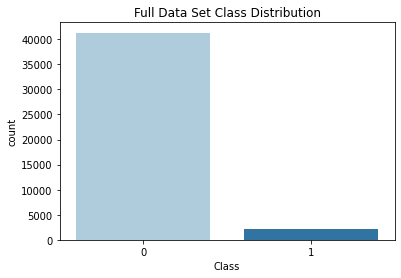

In [12]:
# Plot class distribution
sns.countplot(x=df01['class_tx'], palette="Paired")
plt.title("Full Data Set Class Distribution")
plt.xlabel("Class")

#### Preprocessing phase 1 explanation 1.4 \
Create a table and bar plot to display the count and relative proportion of each class in the full data set. The class of interest (1), which corresponds with those companies labeled as "bankrupt", represent 4.8% of the overall sample (*n* = 2,091).

### Create train/test split {-}


Training X matrix dimensions = (30383, 64)
Test X matrix dimensions = (13022, 64)

Training y matrix dimensions = (30383,)
Test y matrix dimensions = (13022,)


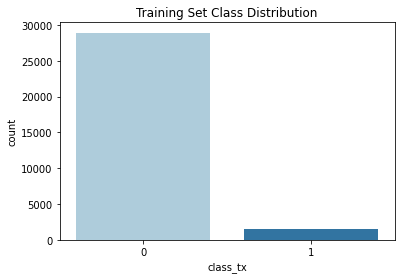

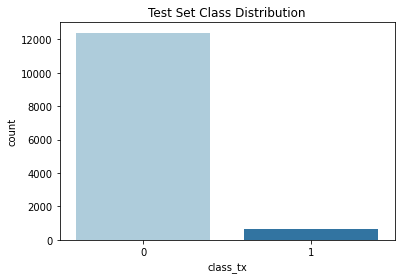

In [13]:
# Copy full df to begin preprocessing
df02 = df01.copy()
#print(df02.columns)

df02_x01_drp_lst01 = ['Class',
                      'class_tx']

# Create X & Y matrices
x01_df01 = df02.drop(df02_x01_drp_lst01, axis=1)
y01_df01 = df02['class_tx']

# Create train & test sets for X & Y (NOTE: stratification by y)
train_x01_df01, test_x01_df01, \
train_y01_df01, test_y01_df01 = train_test_split(x01_df01,
                                                 y01_df01,
                                                 test_size=.3,
                                                 random_state=1699,
                                                 stratify=y01_df01)

# Convert y df's to vector arrays
train_y01_vc01 = train_y01_df01.to_numpy()
test_y01_vc01 = test_y01_df01.to_numpy()

# Display train & test set df's
print(f'\nTraining X matrix dimensions = {train_x01_df01.shape}')
print(f'Test X matrix dimensions = {test_x01_df01.shape}')

print(f'\nTraining y matrix dimensions = {train_y01_df01.shape}')
print(f'Test y matrix dimensions = {test_y01_df01.shape}')

# Plot class distribution
df02a = pd.concat([train_x01_df01, train_y01_df01], axis=1)
df02b = pd.concat([test_x01_df01, test_y01_df01], axis=1)

sns.countplot(x=df02a['class_tx'], palette="Paired")
plt.title("Training Set Class Distribution")
plt.show()
#print('\n')
# Plot class distribution
sns.countplot(x=df02b['class_tx'], palette="Paired")
plt.title("Test Set Class Distribution")
plt.show()

#### Preprocessing phase 1 explanation 1.5 \
Setup X and Y matrices, then perform a 70/30 training/test split. Fitting of all transformations and model algorithms will be done on the training, which will then be used to transform the test sets as applicable. *Note:* The splitting was based on a random stratification to perserve the proportion of class 1 relative to the overall sample.

### Check for and remove features with near zero variance {-}

In [14]:
# Remove near-zero variance (NZV) features
train_x01_df01_nzv_fit = VarianceThreshold().fit(train_x01_df01)
train_x02_tx_vc01 = train_x01_df01_nzv_fit.transform(train_x01_df01)

train_x02_tx_df01 = pd.DataFrame(train_x02_tx_vc01,
                        columns=train_x01_df01_nzv_fit.get_feature_names_out())
test_x02_tx_df01 = test_x01_df01[train_x01_df01_nzv_fit.get_feature_names_out()]

print(f'Training X NZV transformed matrix dimensions = \
                                                    {train_x02_tx_df01.shape}')
print(f'Test X NZV transformed matrix dimensions = {test_x02_tx_df01.shape}')

print(f'\n{train_x01_df01.shape[1] - train_x02_tx_df01.shape[1]} \
                                  near zero variance features were eliminated')

Training X NZV transformed matrix dimensions =                                                     (30383, 64)
Test X NZV transformed matrix dimensions = (13022, 64)

0                                   near zero variance features were eliminated


#### Preprocessing phase 1 explanation 1.6 \
Check for any features that have near-zero variance (NZV) values in attempts to reduce dimensionality and complexity. In this case, none of the features had NZV.

## 2. Exploratory data analysis (EDA) {-}

### Display preprocessed df's ready for EDA {-}

In [15]:
'''NOTE: Numbers in variable names refer to the version/copy and:
"df"=dataframe, "vc"=vector; see feature map in section 3 for full df list'''
# Full (pre-split) X & Y data sets to use for EDA
print(f'{x01_df01.shape}')
print(f'{y01_df01.shape}')

# Alternatively, train X & Y data sets to use for EDA
print(f'\n{train_x02_tx_df01.shape}')
print(f'{train_y01_vc01.shape}')

(43405, 64)
(43405,)

(30383, 64)
(30383,)


#### EDA explanation 2.1 \
Using Splitted data

### Check for duplicates and drop them {-}

In [16]:
#Check for duplicates
duplicate = train_x02_tx_df01[train_x02_tx_df01.duplicated()]
duplicate.shape

(209, 64)

#### EDA explanation 2.2 \
There would be very small chance that companies had the same exact financial data through out 64 features, so they could be due to some input errors. Therefore, we drop them.

In [17]:
#Drop the duplicates in predictors dataframe
train_x02_tx_df01_eda1 = train_x02_tx_df01.drop_duplicates(inplace=False)

#Drop the duplicates in response dataframe
train_y01_vc01_eda1 = pd.DataFrame(train_y01_vc01).drop(duplicate.index, axis=0)
train_y01_vc01_eda1 = train_y01_vc01_eda1.to_numpy(). \
                                           reshape((len(train_y01_vc01_eda1),))
print(train_x02_tx_df01_eda1.shape)
print(train_y01_vc01_eda1.shape)

(30174, 64)
(30174,)


### Review feature correlations {-}

In [18]:
#Create correaltion matrix
corr_matrix = train_x02_tx_df01_eda1.corr()

In [19]:
#Correlation heatmap 
sns.set(rc = {'figure.figsize': (40,15)})
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap on the Training Set', fontsize=40)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

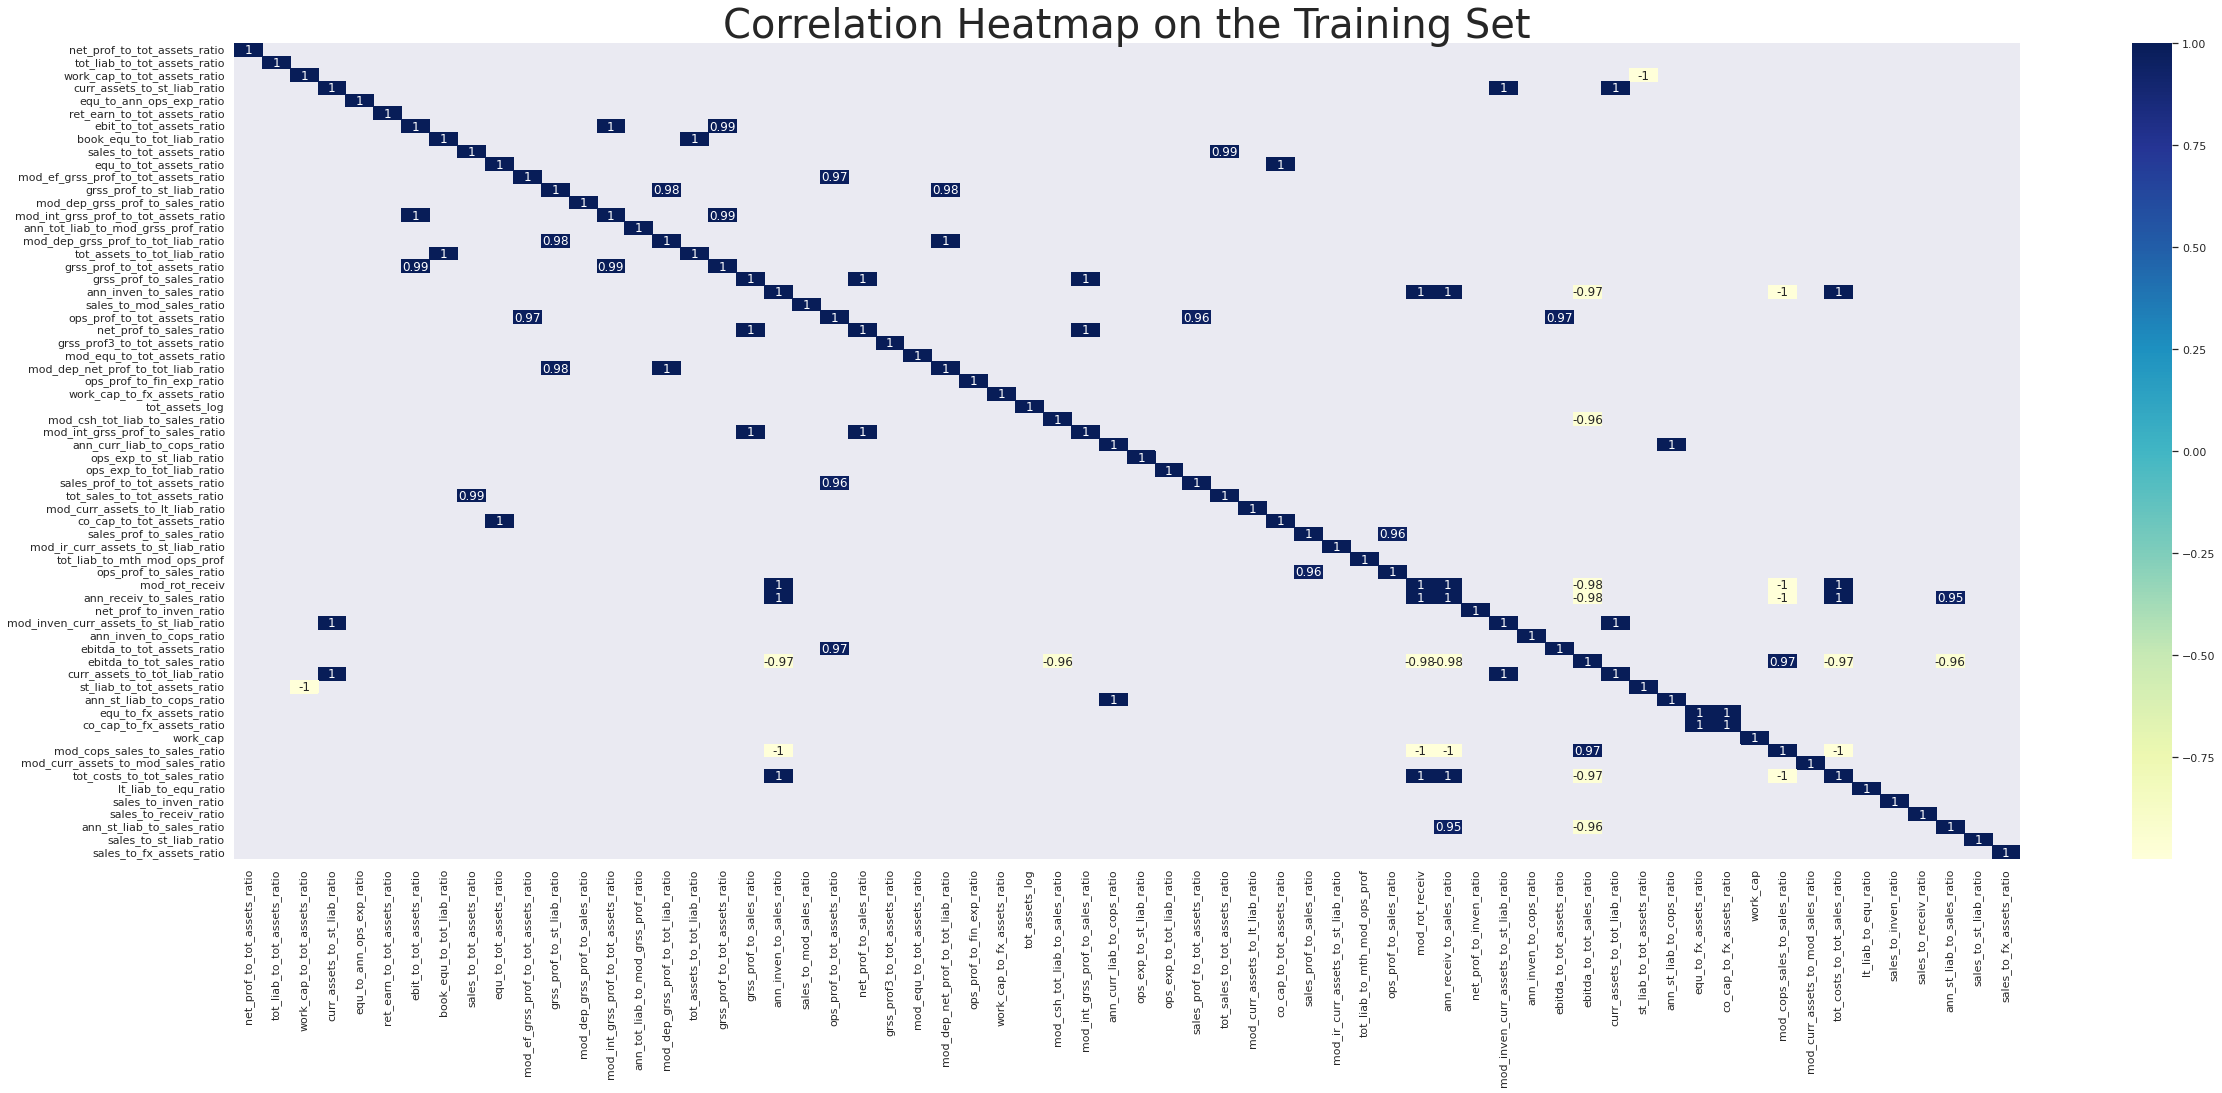

In [20]:
# Correlation heatmap for only those vals greater than |.95|
#print(pd.MultiIndex.from_frame(corr_matrix))
corr_matrix2 = corr_matrix[abs(corr_matrix) > .95]
#print(corr_matrix2)
sns.set(rc = {'figure.figsize': (40,15)})
sns.heatmap(corr_matrix2, cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap on the Training Set', fontsize=40)
plt.show()

#### EDA explanation 2.3 \
A lot of high correlated feature could be seen on the correlation heatmap. 

### Drop features with high correlation (*r* > .95) {-}

In [21]:
#Select columns with high correlation using upper half triangle of the matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).\
                                                                 astype(bool))
to_drop = [column for column in upper_tri.columns if 
                                                 any(upper_tri[column] > 0.95)]
to_drop

['mod_int_grss_prof_to_tot_assets_ratio',
 'mod_dep_grss_prof_to_tot_liab_ratio',
 'tot_assets_to_tot_liab_ratio',
 'grss_prof_to_tot_assets_ratio',
 'ops_prof_to_tot_assets_ratio',
 'net_prof_to_sales_ratio',
 'mod_dep_net_prof_to_tot_liab_ratio',
 'mod_int_grss_prof_to_sales_ratio',
 'sales_prof_to_tot_assets_ratio',
 'tot_sales_to_tot_assets_ratio',
 'co_cap_to_tot_assets_ratio',
 'ops_prof_to_sales_ratio',
 'mod_rot_receiv',
 'ann_receiv_to_sales_ratio',
 'mod_inven_curr_assets_to_st_liab_ratio',
 'ebitda_to_tot_assets_ratio',
 'curr_assets_to_tot_liab_ratio',
 'ann_st_liab_to_cops_ratio',
 'co_cap_to_fx_assets_ratio',
 'mod_cops_sales_to_sales_ratio',
 'tot_costs_to_tot_sales_ratio',
 'ann_st_liab_to_sales_ratio']

In [22]:
#Drop high correlation features in train set
train_x02_tx_df01_eda1.drop(to_drop,
                            axis=1,
                            inplace=True)
#Drop high correlation features in test set
test_x02_tx_df01_eda1 = test_x02_tx_df01.copy()
test_x02_tx_df01_eda1.drop(to_drop,
                           axis=1,
                           inplace=True)
print(train_x02_tx_df01_eda1.shape)
print(test_x02_tx_df01_eda1.shape)

(30174, 42)
(13022, 42)


#### EDA explanation 2.4 \
The number of features has reduced from 64 to 42.

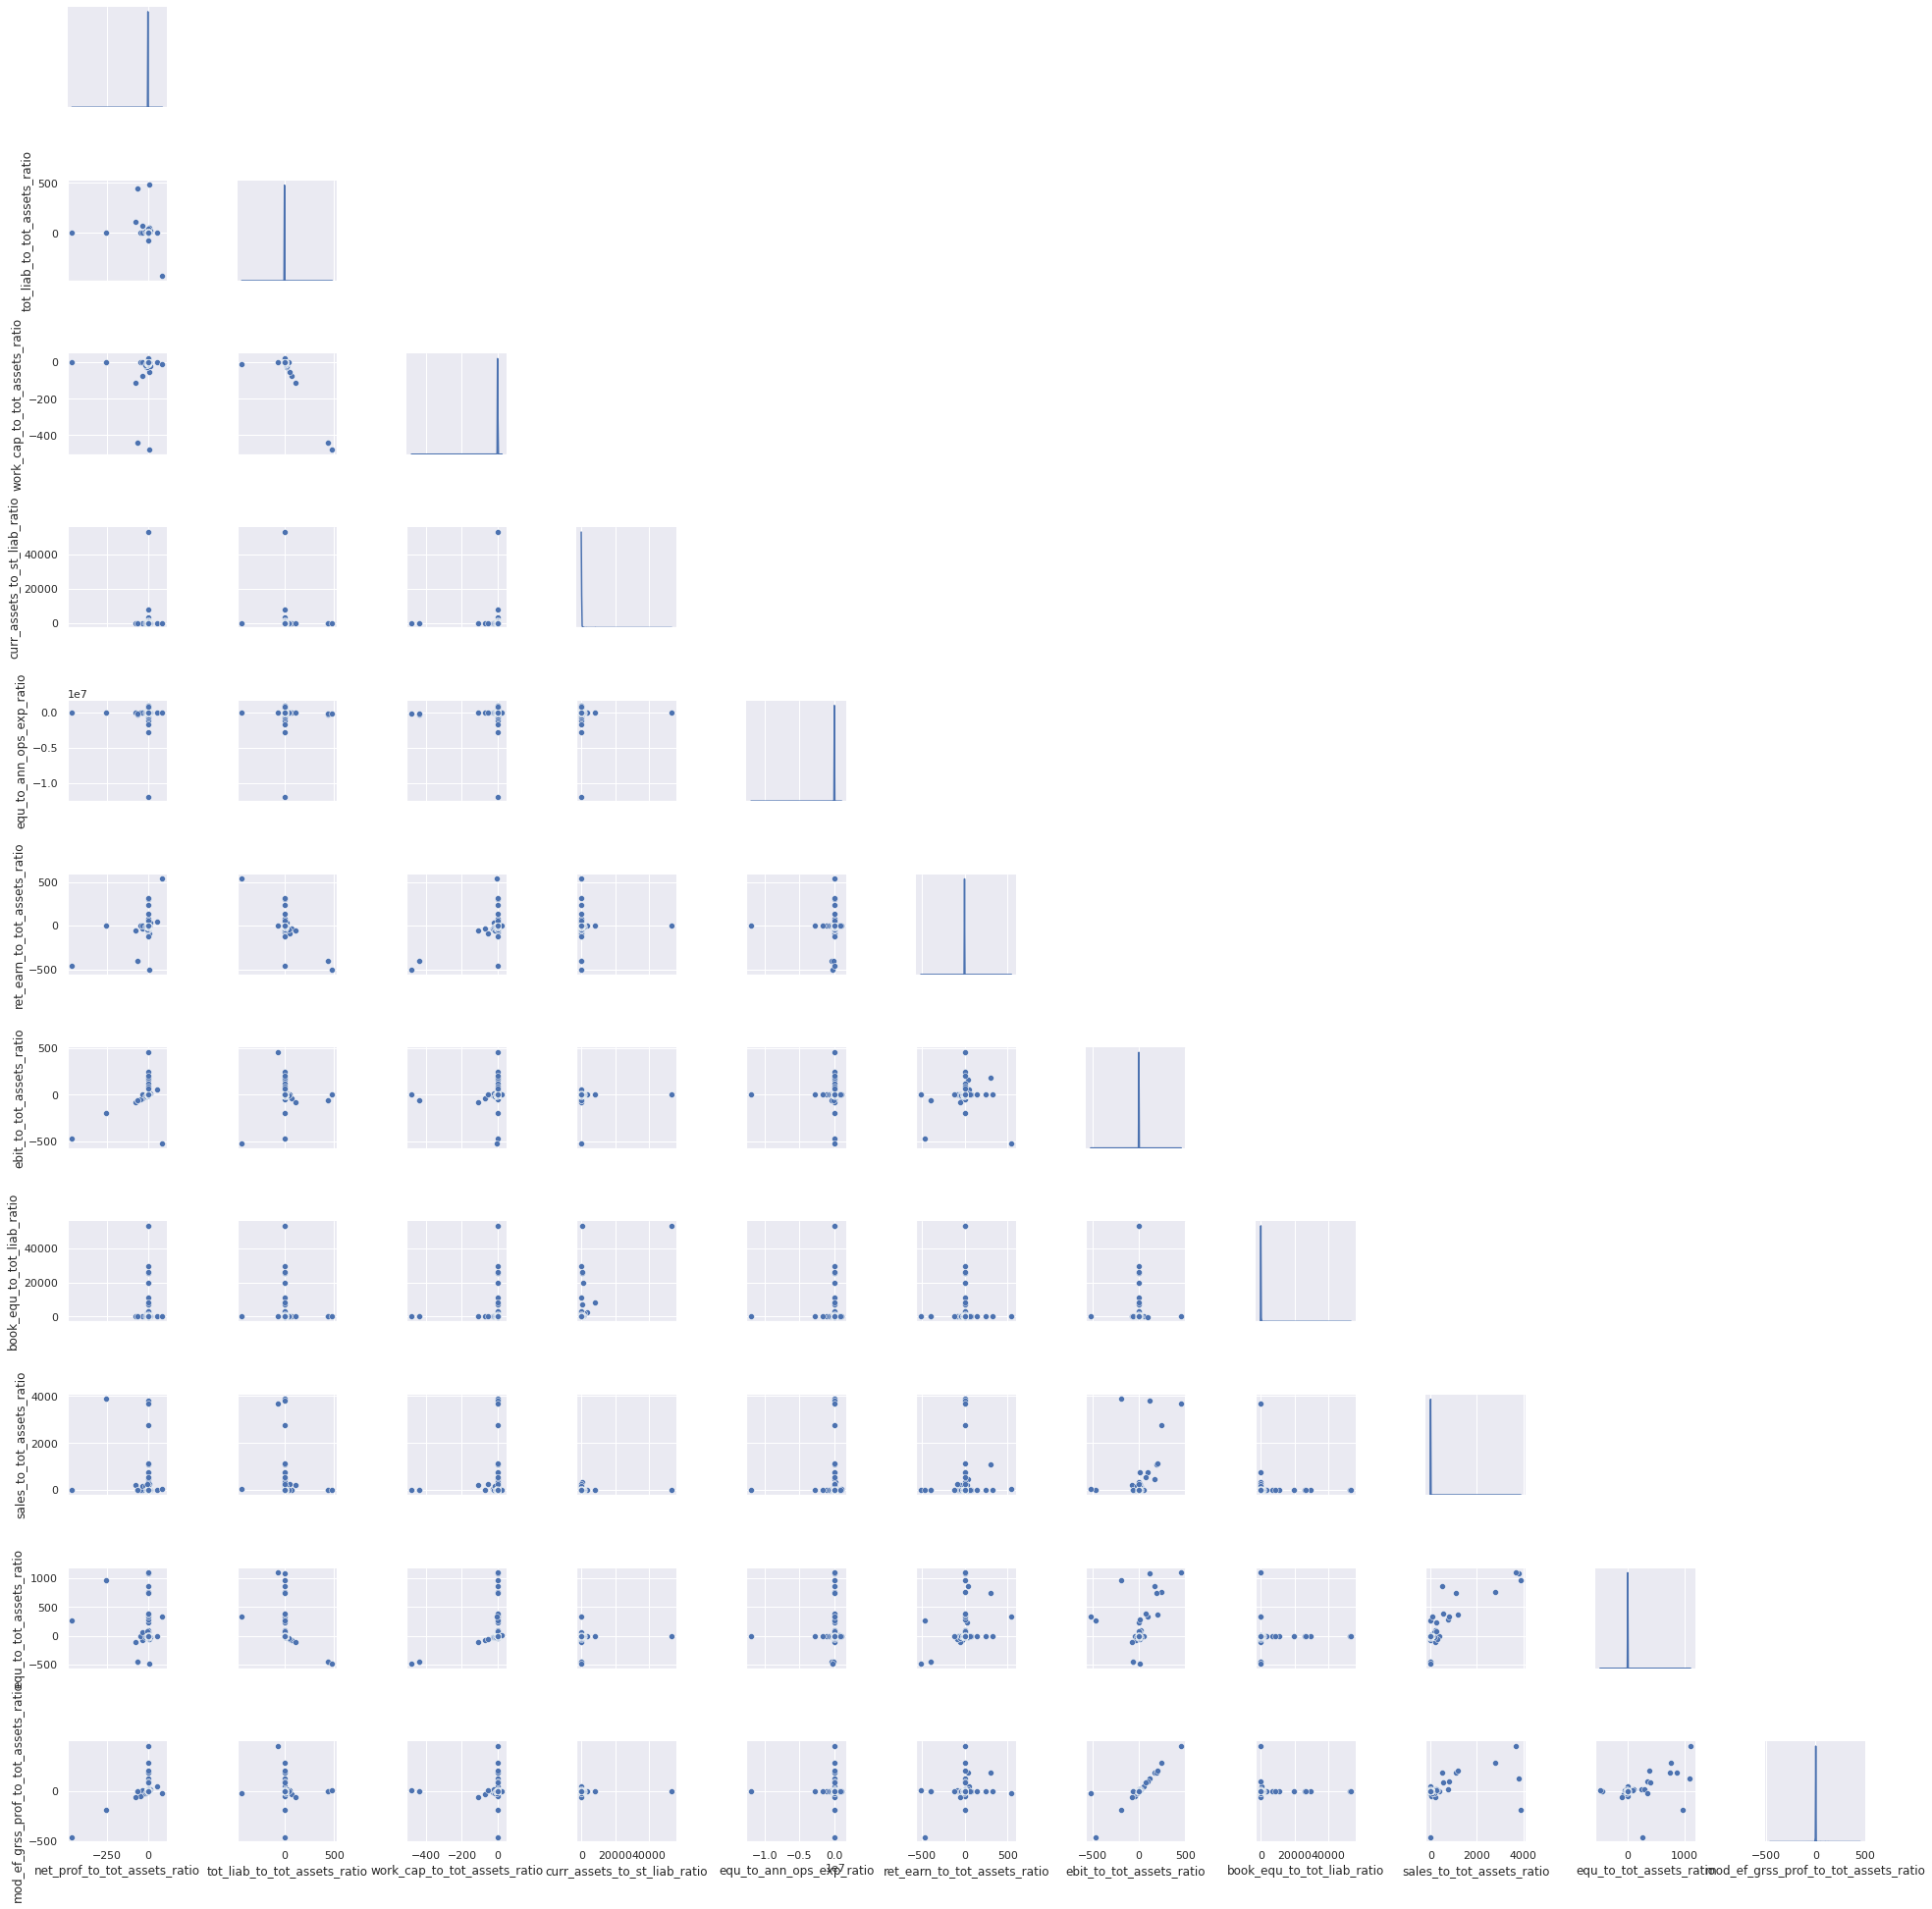

In [23]:
#Pair scatter plots for the first 11 features
g = sns.PairGrid(train_x02_tx_df01_eda1.iloc[:, 0:11],
                 diag_sharey=False,
                 corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

### Summary Statistics and outliers {-}

In [24]:
#Summary statistics
train_x02_tx_df01_eda1.describe()

,net_prof_to_tot_assets_ratio,tot_liab_to_tot_assets_ratio,work_cap_to_tot_assets_ratio,curr_assets_to_st_liab_ratio,equ_to_ann_ops_exp_ratio,ret_earn_to_tot_assets_ratio,ebit_to_tot_assets_ratio,book_equ_to_tot_liab_ratio,sales_to_tot_assets_ratio,equ_to_tot_assets_ratio,...,ebitda_to_tot_sales_ratio,st_liab_to_tot_assets_ratio,equ_to_fx_assets_ratio,work_cap,mod_curr_assets_to_mod_sales_ratio,lt_liab_to_equ_ratio,sales_to_inven_ratio,sales_to_receiv_ratio,sales_to_st_liab_ratio,sales_to_fx_assets_ratio
count,30168.000000,30168.000000,30168.000000,30080.000000,3.011400e+04,30168.000000,30168.000000,30108.000000,30165.000000,30168.000000,...,30077.000000,30168.000000,29620.000000,3.017400e+04,30169.000000,30169.000000,2.865400e+04,30104.000000,30080.000000,29620.000000
mean,0.027545,0.571545,0.127836,6.050144,-4.955621e+02,-0.034775,0.077446,12.457331,2.429359,0.662647,...,-0.576657,0.469322,16.599028,7.681001e+03,-0.041043,1.445195,3.717762e+02,18.086122,8.439761,57.698125
std,3.218895,5.291554,4.639301,313.180715,7.262682e+04,6.945786,5.582060,535.455617,42.829654,14.798294,...,53.543411,4.638281,619.954901,7.454397e+04,12.431378,139.344425,2.571343e+04,656.380446,23.615707,1509.051143
min,-463.890000,-430.870000,-479.730000,-0.403110,-1.190300e+07,-508.120000,-517.480000,-141.410000,-3.496000,-479.730000,...,-9001.000000,-0.186610,-3828.900000,-1.805200e+06,-1236.300000,-327.970000,-1.244000e+01,-0.092493,-1.543200,-10677.000000
25%,0.003039,0.271487,0.020666,1.048500,-4.944275e+01,0.000000,0.005166,0.427053,1.017700,0.293598,...,-0.027767,0.191670,0.682408,2.641750e+01,0.013769,0.000000,5.523875e+00,4.507725,3.086250,2.164000
50%,0.048891,0.472075,0.195640,1.567900,-1.290000e+00,0.000000,0.059015,1.068400,1.190100,0.505170,...,0.010592,0.341900,1.200600,1.071600e+03,0.119320,0.006486,9.766400e+00,6.639300,5.056350,4.300550
75%,0.128395,0.689253,0.400930,2.752975,5.022875e+01,0.088102,0.149572,2.585400,2.065400,0.707205,...,0.061366,0.534920,2.225525,4.918575e+03,0.282470,0.235250,2.017150e+01,10.373000,8.552200,9.845500
max,87.459000,480.730000,22.769000,53433.000000,1.034100e+06,543.250000,453.770000,53432.000000,3876.100000,1099.500000,...,178.890000,480.730000,75450.000000,6.123700e+06,527.220000,23853.000000,3.660200e+06,108000.000000,1396.600000,158180.000000


#### EDA explanation 2.5 \
Data seem skewed in most columns. Most columns have large range with either max values are very large or min values very small compared the means indicating outliers.

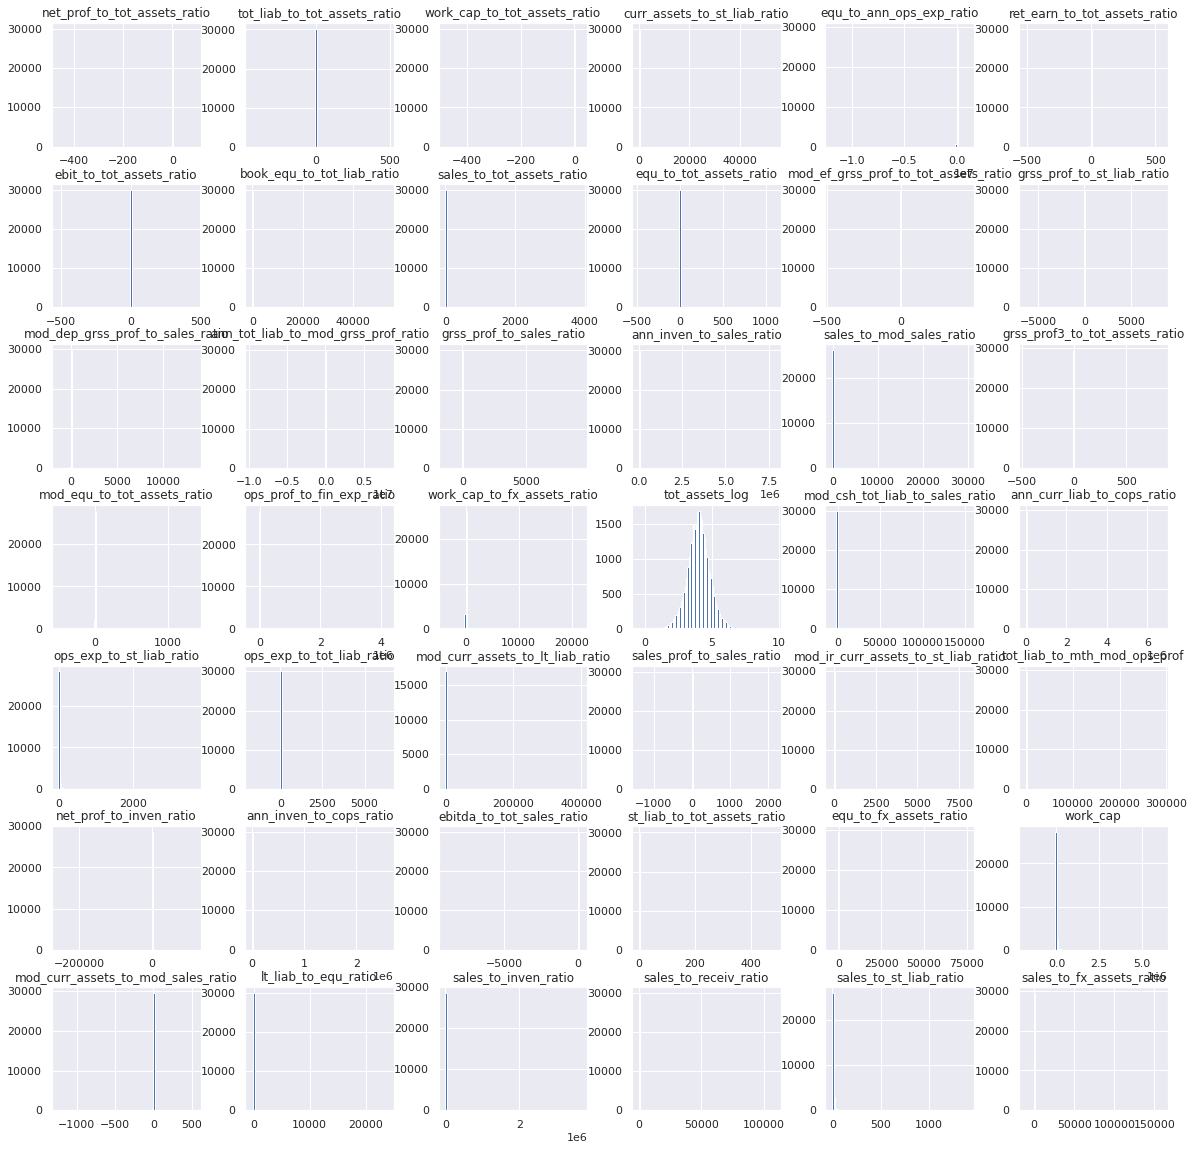

In [25]:
#Visualize the distribution of data in each coulumn of the train set
train_x02_tx_df01_eda1.hist(bins=100, figsize=(20, 20));

#### EDA explanation 2.6 \
Due to large range and skew data, most of the features are concentrate near the means which only showed as  vertical lines in the distribution charts

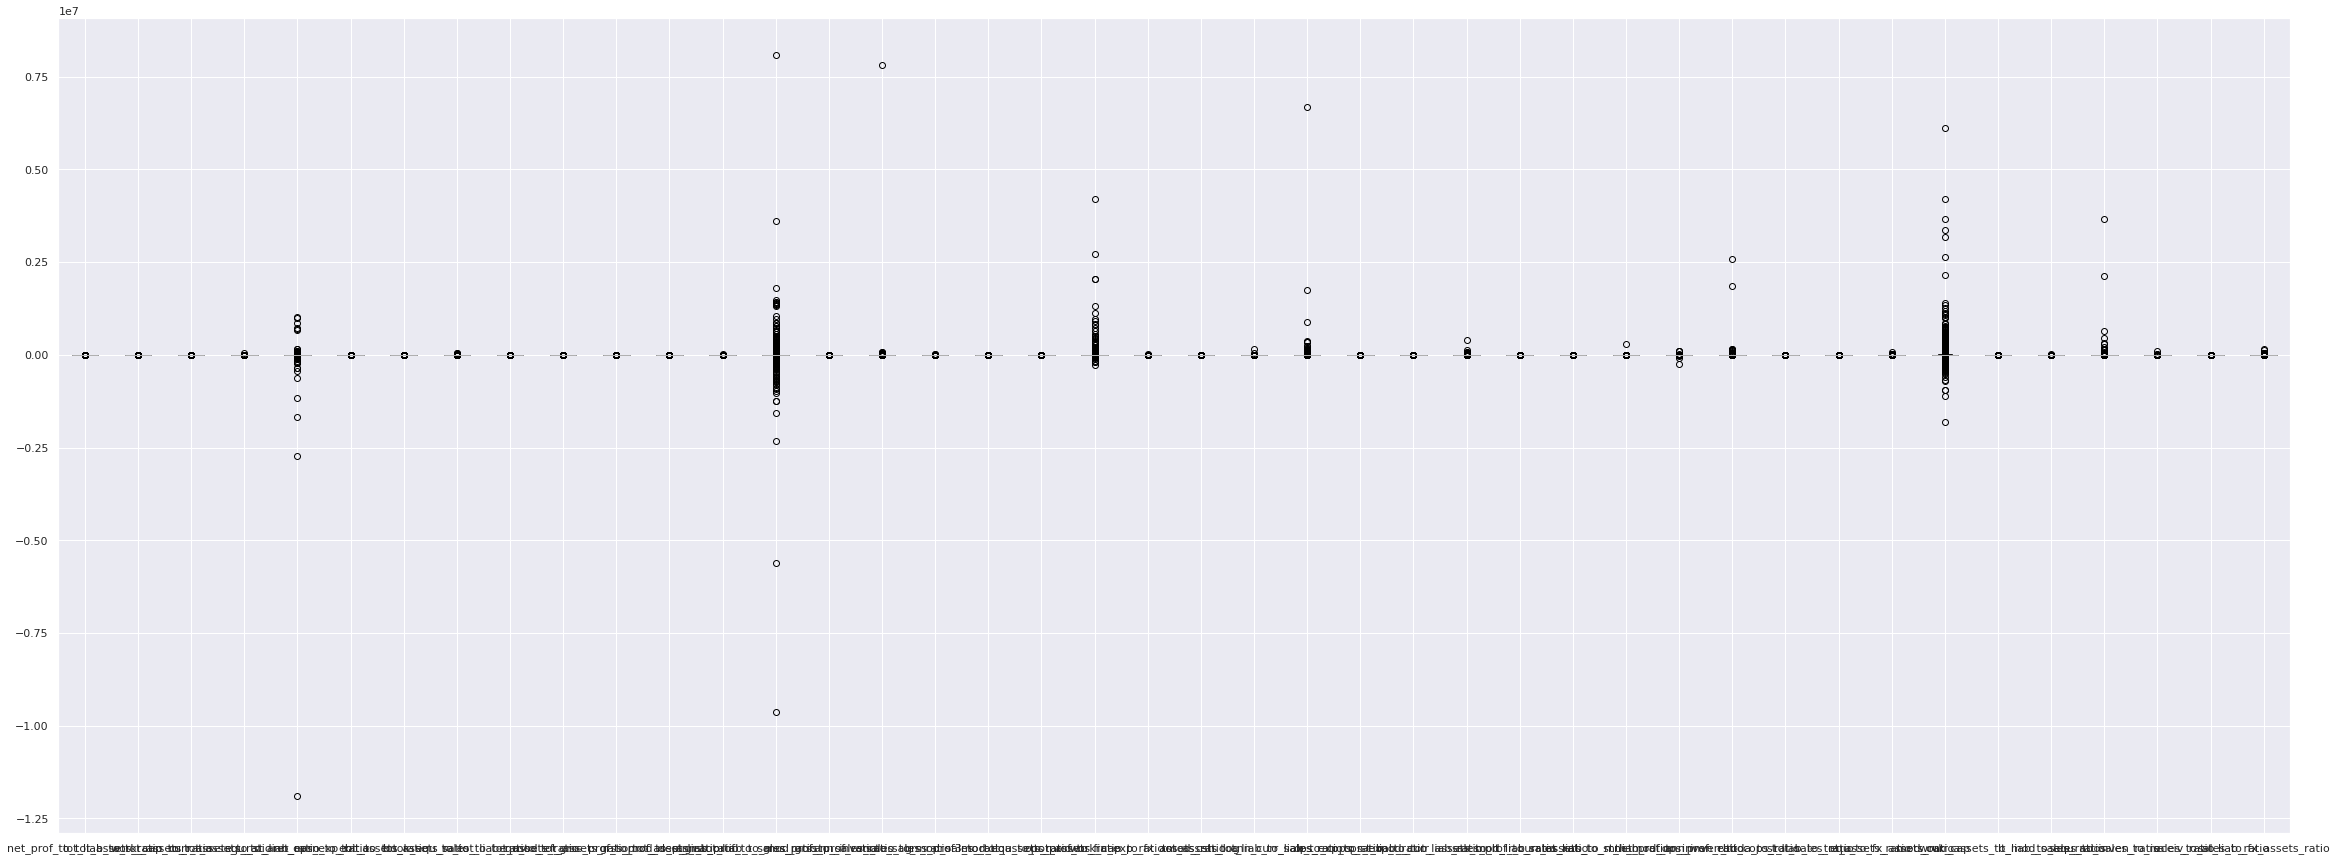

In [26]:
#Show boxplots for data distribution of each column on the training set
train_x02_tx_df01_eda1.boxplot()

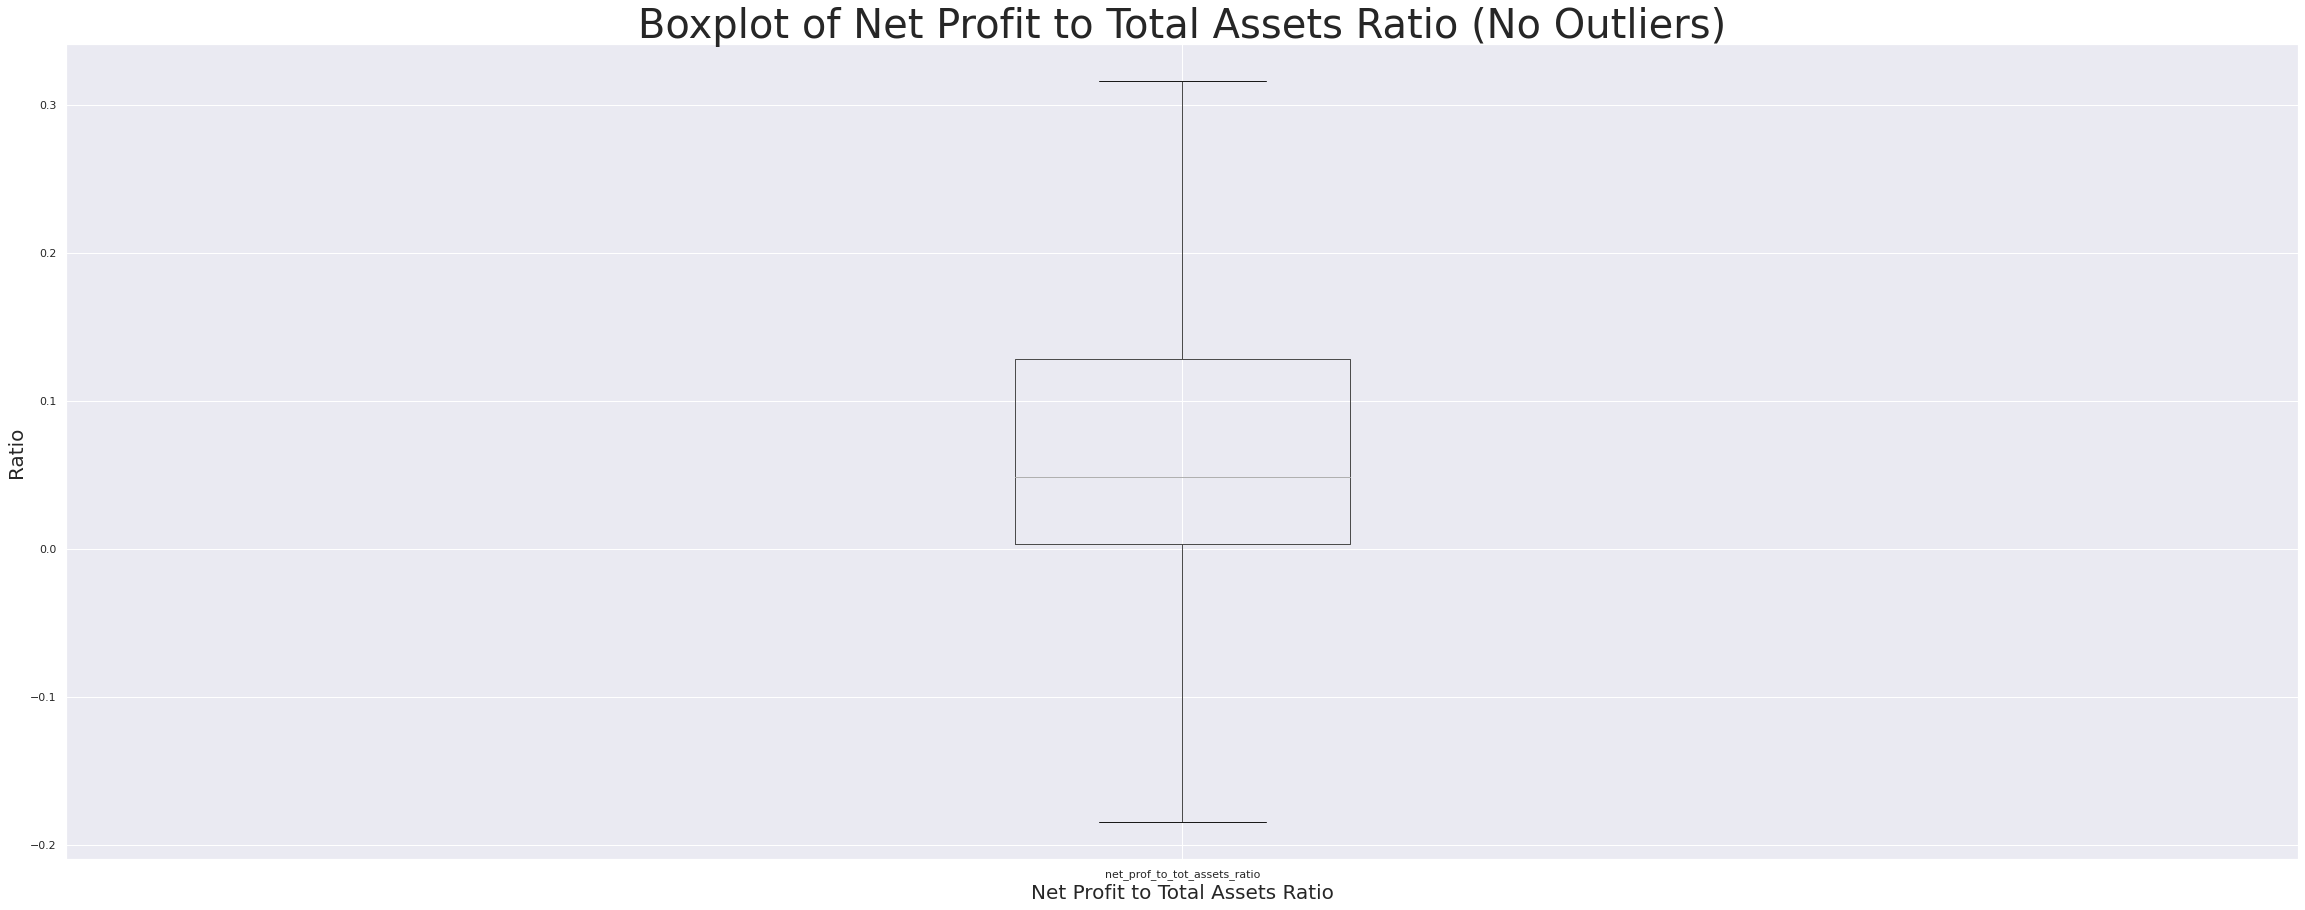

In [27]:
#Boxplot of data on a single column within the lower and upper limits 
train_x02_tx_df01_eda1[['net_prof_to_tot_assets_ratio']].boxplot(
                                                              showfliers=False)
plt.xlabel('Net Profit to Total Assets Ratio', fontsize=20)
plt.ylabel('Ratio', fontsize=20)
plt.title('Boxplot of Net Profit to Total Assets Ratio (No Outliers)',
          fontsize=40)
plt.show()

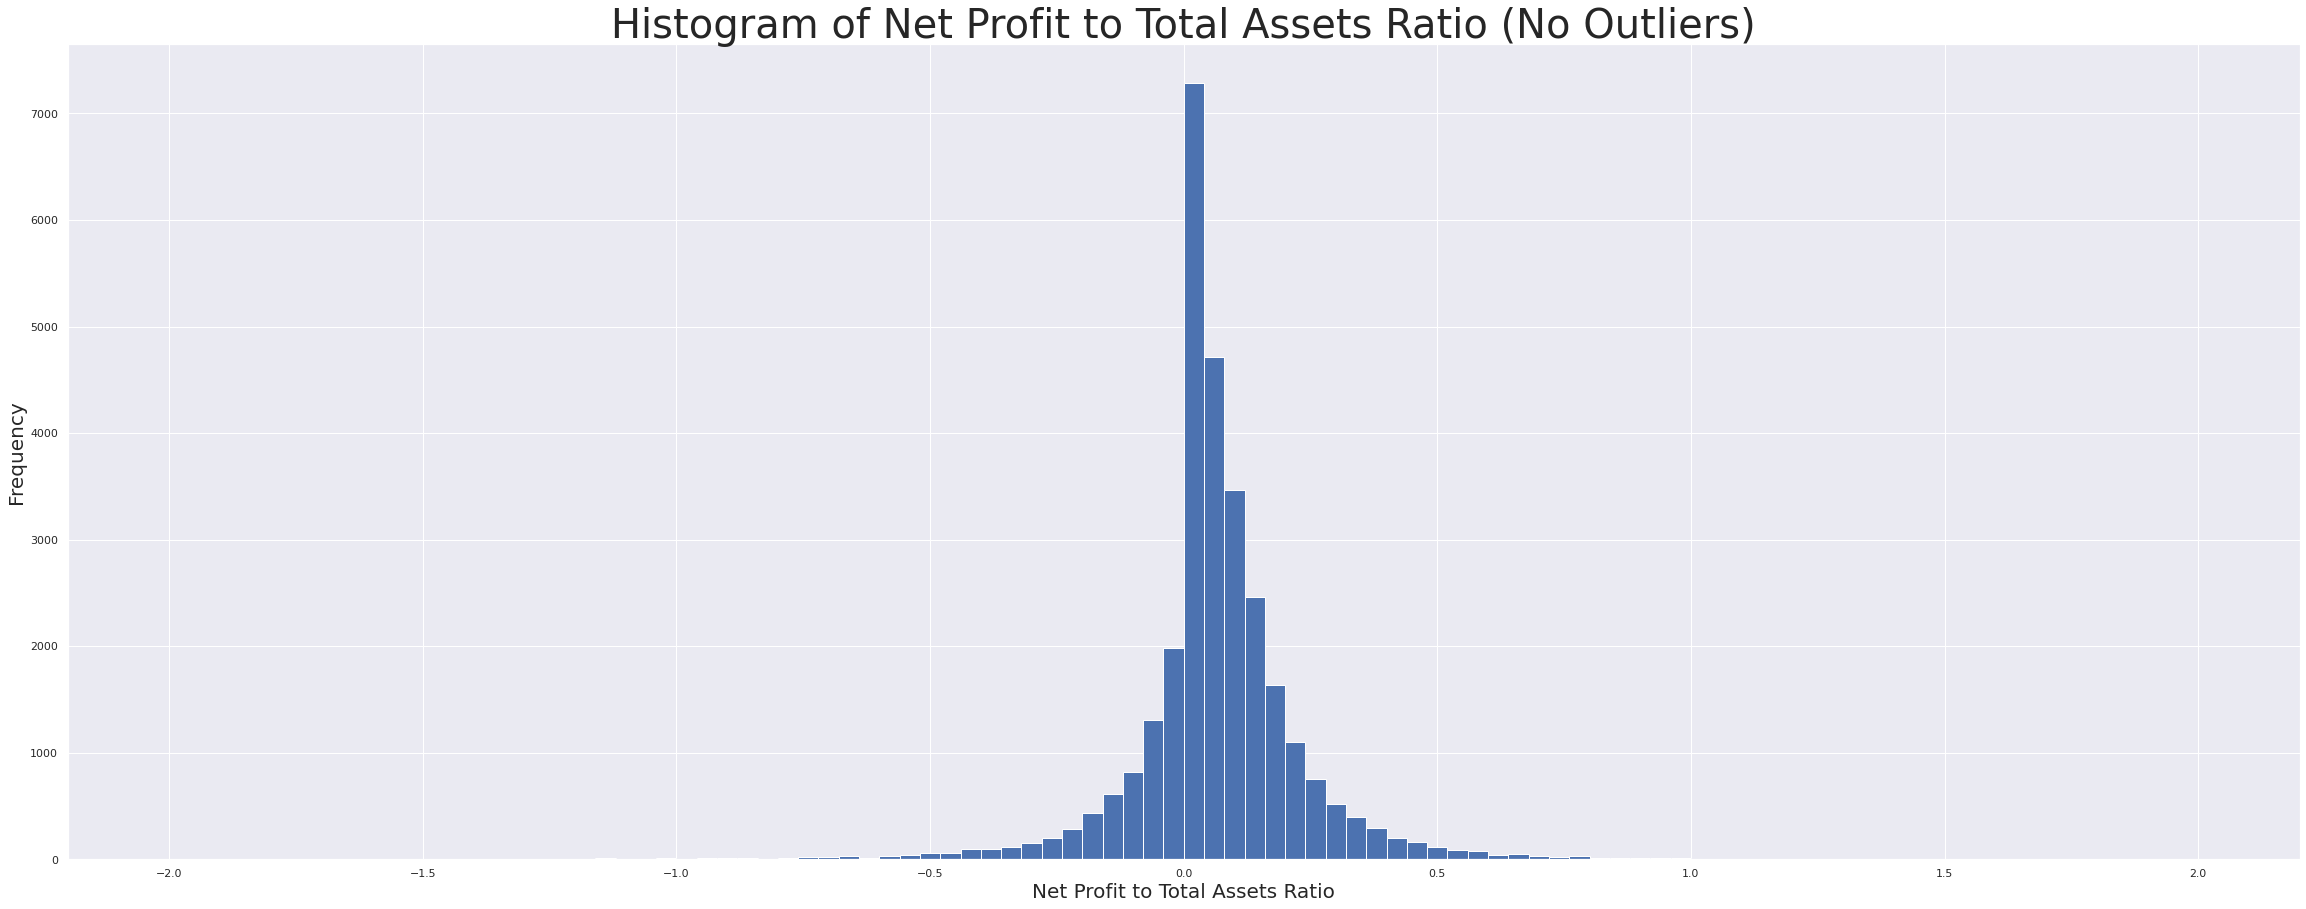

In [28]:
#Histogram of data on a single column within the lower and upper limits
plt.hist(train_x02_tx_df01_eda1['net_prof_to_tot_assets_ratio'],
         range=[-2, 2],
         bins=100);
plt.xlabel('Net Profit to Total Assets Ratio',
           fontsize=20)
plt.ylabel('Frequency',
           fontsize=20)
plt.title('Histogram of Net Profit to Total Assets Ratio (No Outliers)',
          fontsize=40)
plt.show()

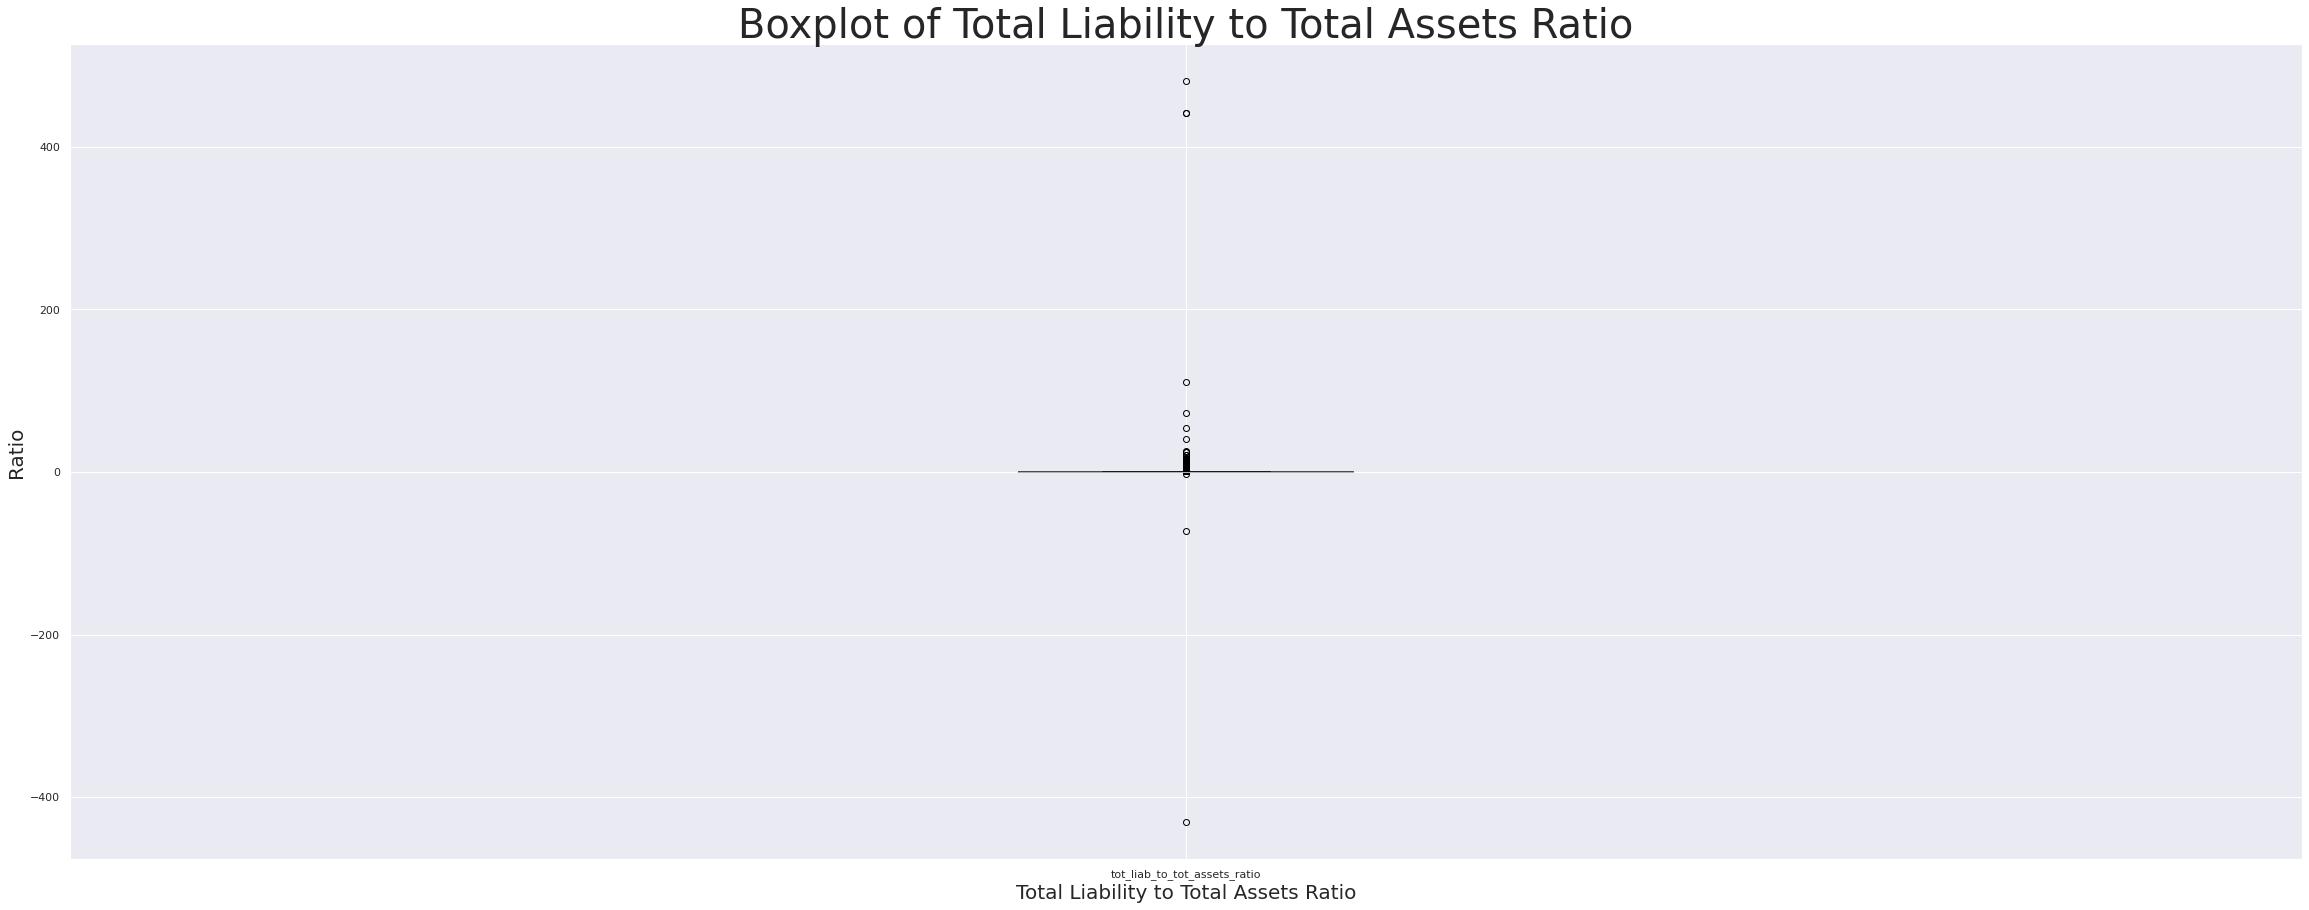

In [29]:
#Boxplot of data on a single column within the lower and upper limits 
train_x02_tx_df01_eda1[['tot_liab_to_tot_assets_ratio']].boxplot(showfliers=True)
plt.xlabel('Total Liability to Total Assets Ratio', fontsize=20)
plt.ylabel('Ratio', fontsize=20)
plt.title('Boxplot of Total Liability to Total Assets Ratio', fontsize=40)
plt.show()

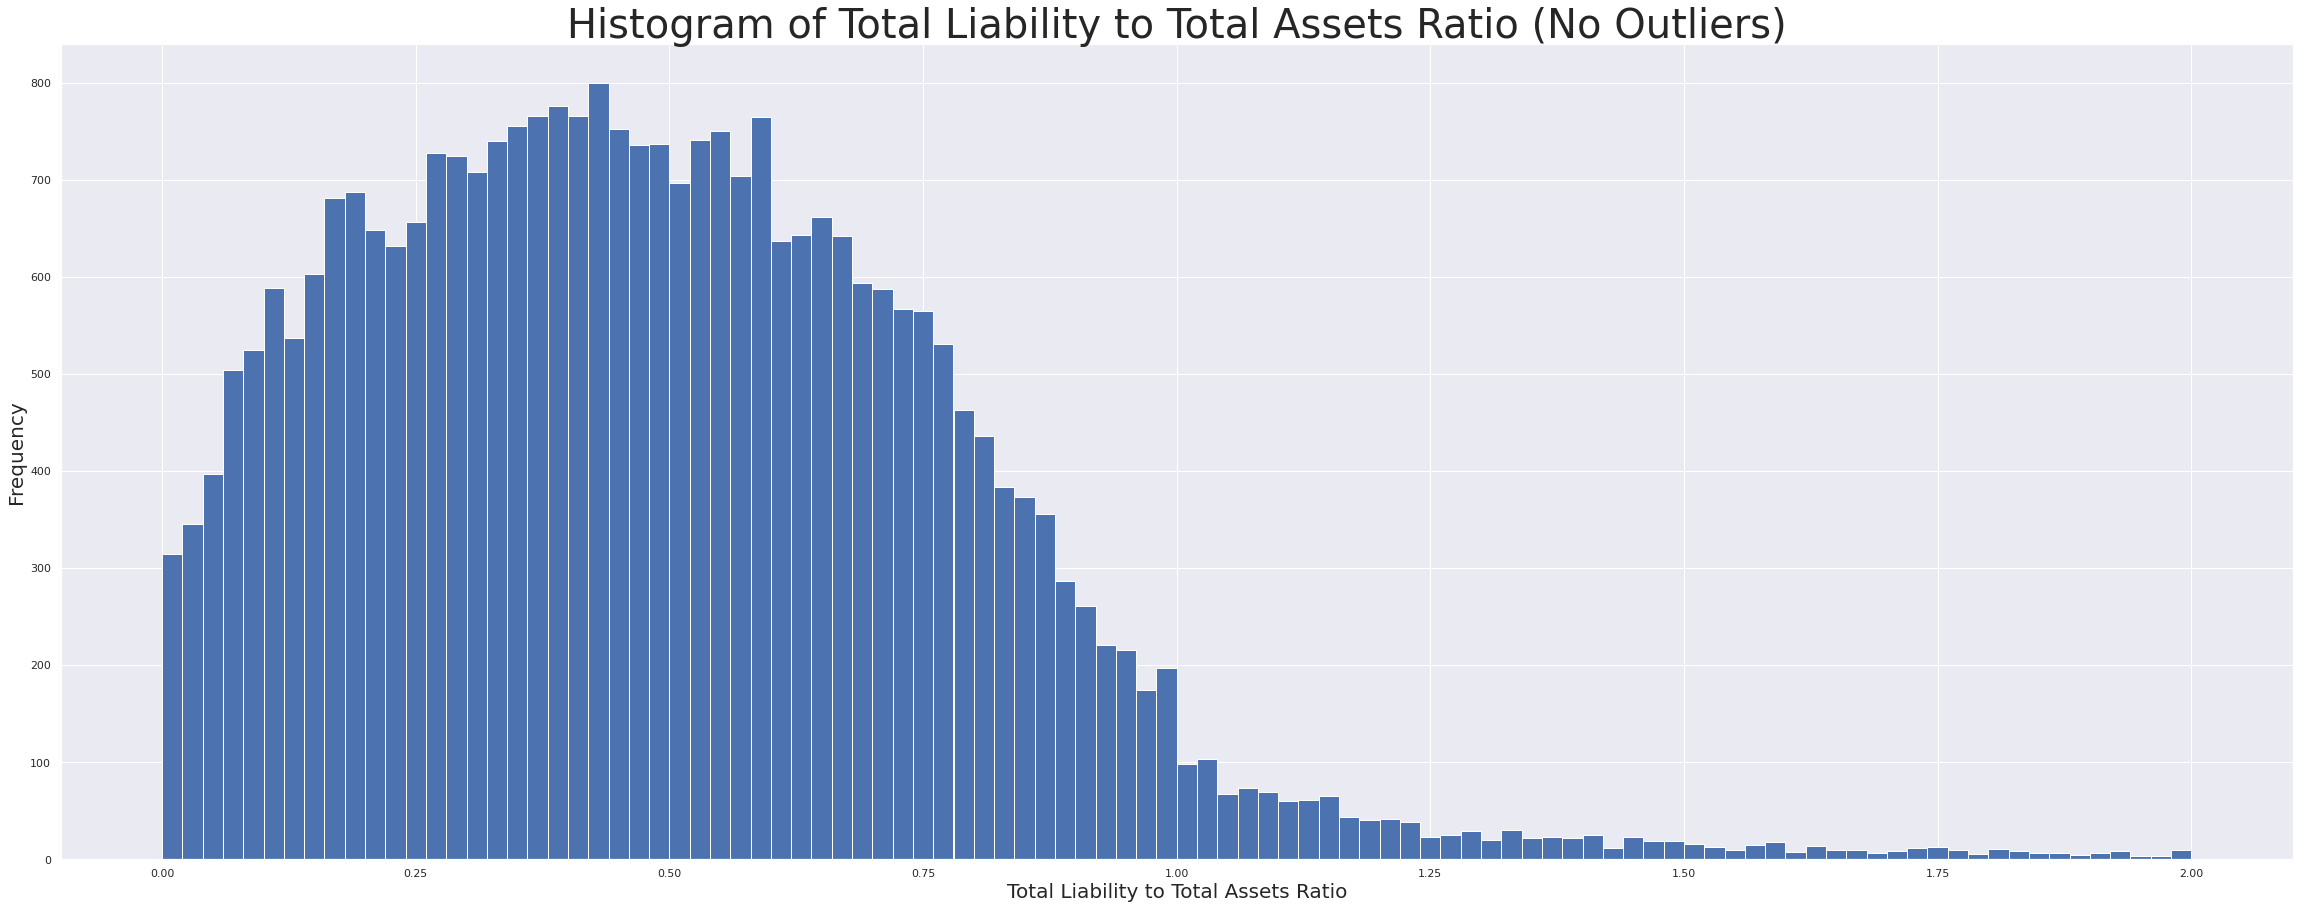

In [30]:
#Histogram of data on a single column within the lower and upper limits
plt.hist(train_x02_tx_df01_eda1['tot_liab_to_tot_assets_ratio'],
         range=[0, 2],
         bins=100);
plt.xlabel('Total Liability to Total Assets Ratio',
           fontsize=20)
plt.ylabel('Frequency',
           fontsize=20)
plt.title('Histogram of Total Liability to Total Assets Ratio (No Outliers)',
          fontsize=40)
plt.show()

### Identify and review outliers {-}

In [31]:
#Detect outliers using IQR
cols = train_x02_tx_df01_eda1.columns 
Q1 = train_x02_tx_df01_eda1[cols].quantile(0.25)
Q3 = train_x02_tx_df01_eda1[cols].quantile(0.75)
IQR = Q3 - Q1
#Checking row having outliers
outliers = train_x02_tx_df01_eda1[((train_x02_tx_df01_eda1[cols] < 
                                    (Q1 - 1.5 * IQR)) |
                                   (train_x02_tx_df01_eda1[cols] > 
                                    (Q3 + 1.5 * IQR))).any(axis=1)]
#remove ouliers
#train_x02_tx_df01_eda2 = train_x02_tx_df01_eda1[~(
    #(train_x02_tx_df01_eda1[cols] < (Q1 - 1.5 * IQR)) |
    #(train_x02_tx_df01_eda1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers.shape)
outliers.head()

(26504, 42)


,net_prof_to_tot_assets_ratio,tot_liab_to_tot_assets_ratio,work_cap_to_tot_assets_ratio,curr_assets_to_st_liab_ratio,equ_to_ann_ops_exp_ratio,ret_earn_to_tot_assets_ratio,ebit_to_tot_assets_ratio,book_equ_to_tot_liab_ratio,sales_to_tot_assets_ratio,equ_to_tot_assets_ratio,...,ebitda_to_tot_sales_ratio,st_liab_to_tot_assets_ratio,equ_to_fx_assets_ratio,work_cap,mod_curr_assets_to_mod_sales_ratio,lt_liab_to_equ_ratio,sales_to_inven_ratio,sales_to_receiv_ratio,sales_to_st_liab_ratio,sales_to_fx_assets_ratio
0,-0.023908,0.67869,0.013342,1.02670,-120.3700,-0.45312,-0.033635,0.47342,0.44747,0.32131,...,-0.200620,0.50016,0.66045,1571.0,-0.074410,0.50712,2.7735,1.9724,0.89464,0.91978
1,0.280690,0.42708,0.250370,2.06470,8.2409,0.83446,0.280690,1.34150,1.03990,0.57292,...,0.025332,0.23516,1.11360,2265.0,0.489920,0.33498,113.0700,22.0970,34.10700,15.59000
2,0.124390,0.39996,0.404580,2.41050,23.6530,0.62886,0.154240,1.05860,1.21330,0.42338,...,0.158220,0.28683,1.37200,39811.0,0.293800,0.26721,2.4551,2.6089,2.98890,2.77800
3,0.030410,0.52344,-0.102460,0.66978,-109.7400,0.24133,0.041528,0.85918,1.09860,0.44973,...,-0.022984,0.31027,0.56771,-1591.1,0.067618,0.47400,12.8230,5.5998,2.34880,0.91992
4,-0.101190,0.42663,0.482710,2.13440,33.6220,0.19492,-0.111890,1.28550,0.92958,0.54844,...,-0.174620,0.42552,5.97640,2770.4,-0.184510,0.00203,2.2529,1.9561,2.09290,9.70480


In [32]:
#Number of outliers in each columns
((train_x02_tx_df01_eda1[cols] < (Q1 - 1.5 * IQR)) | 
          (train_x02_tx_df01_eda1[cols] > (Q3 + 1.5 * IQR))).sum().sort_values(
                                                               ascending=False)

ret_earn_to_tot_assets_ratio            7829
ops_prof_to_fin_exp_ratio               5806
ann_tot_liab_to_mod_grss_prof_ratio     5158
work_cap                                5130
tot_liab_to_mth_mod_ops_prof            4856
net_prof_to_inven_ratio                 4831
lt_liab_to_equ_ratio                    4760
equ_to_ann_ops_exp_ratio                4275
work_cap_to_fx_assets_ratio             4151
equ_to_fx_assets_ratio                  4029
grss_prof_to_st_liab_ratio              3966
sales_to_fx_assets_ratio                3884
ebitda_to_tot_sales_ratio               3816
mod_curr_assets_to_mod_sales_ratio      3803
mod_ir_curr_assets_to_st_liab_ratio     3661
grss_prof_to_sales_ratio                3626
sales_to_inven_ratio                    3418
sales_prof_to_sales_ratio               3330
net_prof_to_tot_assets_ratio            3263
book_equ_to_tot_liab_ratio              3254
curr_assets_to_st_liab_ratio            3150
mod_dep_grss_prof_to_sales_ratio        2977
ebit_to_to

#### EDA explanation 2.7 \
There are not a lot of outliers overlapping in the columns, resulting in high number of rows containing outliers (26,504 rows).

In [33]:
outlier_row = train_x02_tx_df01_eda1.loc[train_x02_tx_df01_eda1
                              ['net_prof_to_tot_assets_ratio'] == 87.459000, :]
outlier_row  

,net_prof_to_tot_assets_ratio,tot_liab_to_tot_assets_ratio,work_cap_to_tot_assets_ratio,curr_assets_to_st_liab_ratio,equ_to_ann_ops_exp_ratio,ret_earn_to_tot_assets_ratio,ebit_to_tot_assets_ratio,book_equ_to_tot_liab_ratio,sales_to_tot_assets_ratio,equ_to_tot_assets_ratio,...,ebitda_to_tot_sales_ratio,st_liab_to_tot_assets_ratio,equ_to_fx_assets_ratio,work_cap,mod_curr_assets_to_mod_sales_ratio,lt_liab_to_equ_ratio,sales_to_inven_ratio,sales_to_receiv_ratio,sales_to_st_liab_ratio,sales_to_fx_assets_ratio
28504,87.459,-430.87,-6.459,0.44818,8.0767,543.25,-517.48,-0.78876,65.607,339.85,...,-0.31584,11.705,1.0,-394.0,0.25734,0.37639,0.59018,285.86,5.605,0.19304


In [34]:
#A look at overlap outliers (those show values) among features. NaN values--
#-- are not outliers
outliers = train_x02_tx_df01_eda1[((train_x02_tx_df01_eda1 < 
                                    (Q1 - 1.5 * IQR)) |
                                   (train_x02_tx_df01_eda1 > 
                                    (Q3 + 1.5 * IQR)))]
outliers.head()                                  

,net_prof_to_tot_assets_ratio,tot_liab_to_tot_assets_ratio,work_cap_to_tot_assets_ratio,curr_assets_to_st_liab_ratio,equ_to_ann_ops_exp_ratio,ret_earn_to_tot_assets_ratio,ebit_to_tot_assets_ratio,book_equ_to_tot_liab_ratio,sales_to_tot_assets_ratio,equ_to_tot_assets_ratio,...,ebitda_to_tot_sales_ratio,st_liab_to_tot_assets_ratio,equ_to_fx_assets_ratio,work_cap,mod_curr_assets_to_mod_sales_ratio,lt_liab_to_equ_ratio,sales_to_inven_ratio,sales_to_receiv_ratio,sales_to_st_liab_ratio,sales_to_fx_assets_ratio
0,NaN,NaN,NaN,NaN,NaN,-0.45312,NaN,NaN,NaN,NaN,...,-0.20062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.83446,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,113.07,22.097,34.107,NaN
2,NaN,NaN,NaN,NaN,NaN,0.62886,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39811.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.24133,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.17462,NaN,5.9764,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display final df's from EDA {-}

In [35]:
# Train set
print(train_x02_tx_df01_eda1.shape)
print(train_y01_vc01_eda1.shape)

# Test set
print(test_x02_tx_df01_eda1.shape)
print(test_y01_vc01.shape)

(30174, 42)
(30174,)
(13022, 42)
(13022,)


## 3. Additional preprocessing (Phase 2, post-EDA) {-}

### Check for Missing data {-}

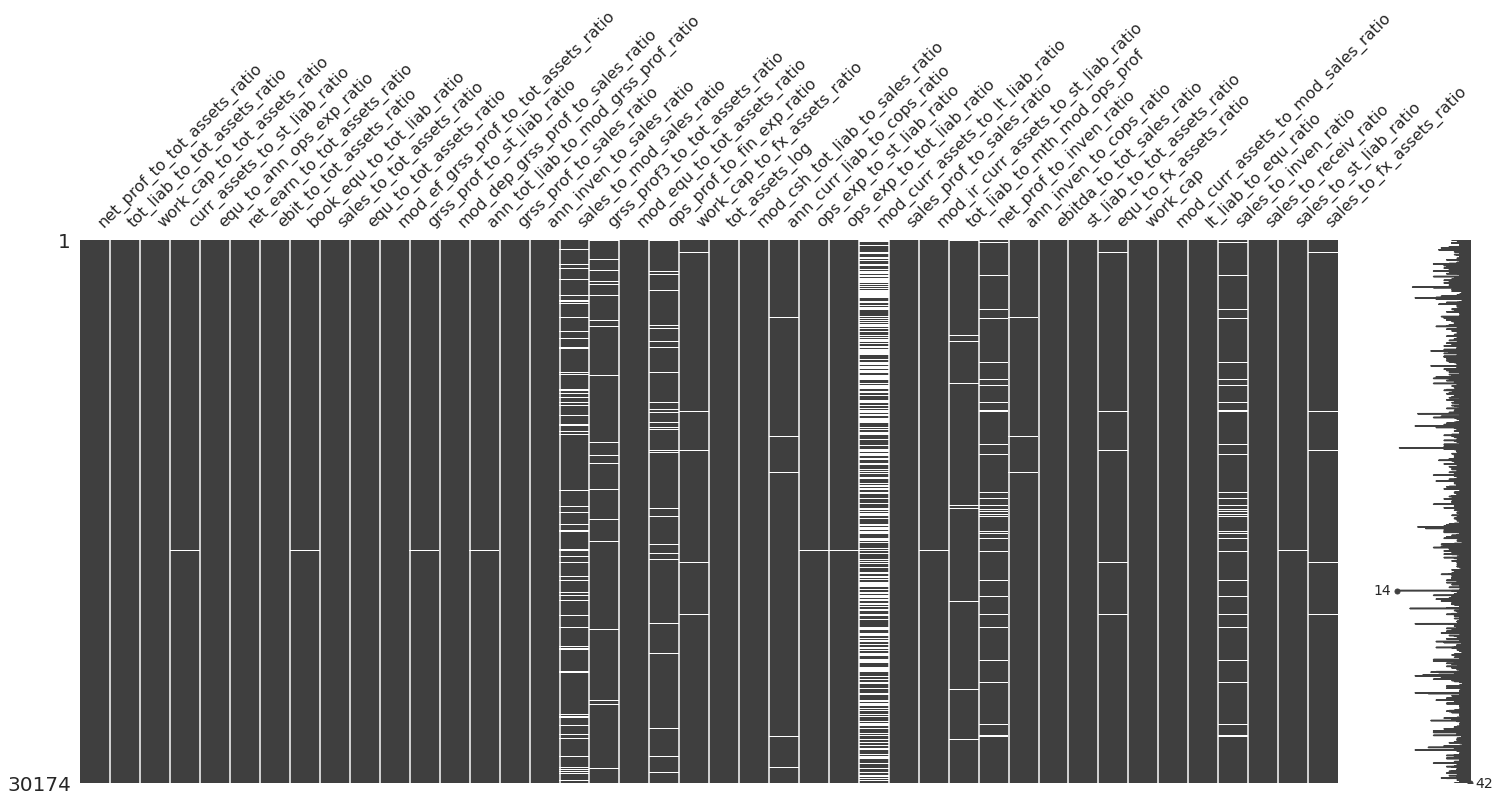

In [36]:
# Visualize missing values in each column
msno.matrix(train_x02_tx_df01_eda1)

### Display all training instances with null values {-}

In [37]:
null_val_df01 = train_x02_tx_df01_eda1.loc[train_x02_tx_df01_eda1.isnull().any(
                                                                       axis=1)]
print(f'{null_val_df01.head()}\n{null_val_df01.shape}')

   net_prof_to_tot_assets_ratio  tot_liab_to_tot_assets_ratio  \
5                     -0.002297                      0.881090   
6                      0.004913                      0.498890   
7                      0.031102                      0.390130   
8                      0.000029                      0.000426   
9                      0.438780                      0.410180   

   work_cap_to_tot_assets_ratio  curr_assets_to_st_liab_ratio  \
5                      -0.20510                       0.73775   
6                       0.40923                       1.82030   
7                       0.24344                       1.62400   
8                       0.40601                    3171.70000   
9                       0.39582                       2.02840   

   equ_to_ann_ops_exp_ratio  ret_earn_to_tot_assets_ratio  \
5                  -121.130                     -0.079250   
6                 -1766.600                      0.000000   
7                102170.000        

### Remove features with high count of missing values {-}

In [38]:
# Remove any features for which the number of null vals exceed a threshold--
#-- (15% of total N)
train_x02_tx_df01_eda1_null_summ01 = pd.DataFrame(
                      train_x02_tx_df01_eda1.isnull().sum(), columns=['count'])

train_x02_tx_df01_eda1_null_summ02 = train_x02_tx_df01_eda1_null_summ01.loc[
              (train_x02_tx_df01_eda1_null_summ01['count'] != 0)].sort_values(
                                                      'count', ascending=False)
train_x02_tx_df01_eda1_null_summ03 = \
                               train_x02_tx_df01_eda1_null_summ02.reset_index()
print(train_x02_tx_df01_eda1_null_summ03)

train_x02_tx_df01_eda1_null_summ04 = train_x02_tx_df01_eda1_null_summ03.loc[
                              train_x02_tx_df01_eda1_null_summ03['count'] > (
                                             len(train_x02_tx_df01_eda1)*.15)]
print('\n', train_x02_tx_df01_eda1_null_summ04)

train_x02_tx_df01_eda1_null_summ04_remove_lst01 = list(
                                  train_x02_tx_df01_eda1_null_summ04['index'])
print('\n', train_x02_tx_df01_eda1_null_summ04_remove_lst01)

train_x03_tx_df01 = train_x02_tx_df01_eda1.drop(
                       train_x02_tx_df01_eda1_null_summ04_remove_lst01, axis=1)
test_x03_tx_df01 = test_x02_tx_df01_eda1.drop(
                      train_x02_tx_df01_eda1_null_summ04_remove_lst01, axis=1)

print(f'\n{train_x03_tx_df01.shape}')
print(f'\n{test_x03_tx_df01.shape}')

                                   index  count
0       mod_curr_assets_to_lt_liab_ratio  13155
1               sales_to_mod_sales_ratio   4093
2              ops_prof_to_fin_exp_ratio   1902
3                   sales_to_inven_ratio   1520
4                net_prof_to_inven_ratio   1516
5         grss_prof3_to_tot_assets_ratio    641
6            work_cap_to_fx_assets_ratio    554
7                 equ_to_fx_assets_ratio    554
8               sales_to_fx_assets_ratio    554
9           tot_liab_to_mth_mod_ops_prof    541
10           ann_curr_liab_to_cops_ratio    259
11               ann_inven_to_cops_ratio    209
12              grss_prof_to_sales_ratio     98
13      mod_dep_grss_prof_to_sales_ratio     97
14              ann_inven_to_sales_ratio     97
15             sales_prof_to_sales_ratio     97
16             ebitda_to_tot_sales_ratio     97
17       mod_csh_tot_liab_to_sales_ratio     97
18              ops_exp_to_st_liab_ratio     94
19            grss_prof_to_st_liab_ratio

#### Preprocessing phase 2 explanation 3.1 \
Determine number of null values for each feature and eliminate all of those above a specificed threshold (> 15% of *N*) based on the assumption that the imputation of values for those features above the threshold will introduce more bias than is off-set by any information those features' values will add to prediction.

### Impute missing values {-}

In [39]:
# Implement KNN Imputer for remaining missing vals
train_x03_tx_df01_kni_fit = KNNImputer().fit(train_x03_tx_df01)
train_x03_tx_vc02 = train_x03_tx_df01_kni_fit.transform(train_x03_tx_df01)
test_x03_tx_vc02 = train_x03_tx_df01_kni_fit.transform(test_x03_tx_df01)

train_x03_tx_df02 = pd.DataFrame(train_x03_tx_vc02,
                                 columns=train_x03_tx_df01.columns)
test_x03_tx_df02 = pd.DataFrame(test_x03_tx_vc02,
                                columns=train_x03_tx_df01.columns)

train_x03_tx_df02_null_summ01 = pd.DataFrame(train_x03_tx_df02.isnull().sum(),
                                             columns=['count'])

display(train_x03_tx_df02_null_summ01.loc[
                                (train_x03_tx_df02_null_summ01['count'] != 0)])

,count


#### Preprocessing phase 2 explanation 3.2 \
Imputation is the process of deriving an unknown value and can be done using either simple methods (e.g., mean value imputation) or more sophisticated methods (e.g., KNN imputation). In this instance, KNN imputation has been used, which uses distances calculated between each instance to fill in values calculated from a record's closest neighbor(s) on the basis that close records would most likely have similar values for the unknown features, were they actually known.

### Scale X values in two ways {-}

In [40]:
# Z-score normalization
train_x03_tx_df02_sts_fit = StandardScaler().fit(train_x03_tx_df02)
train_x03_tx_vc03 = train_x03_tx_df02_sts_fit.transform(train_x03_tx_df02)
test_x03_tx_vc03 = train_x03_tx_df02_sts_fit.transform(test_x03_tx_df02)

train_x03_tx_df03 = pd.DataFrame(train_x03_tx_vc03,
                                 columns=train_x03_tx_df01.columns)
test_x03_tx_df03 = pd.DataFrame(test_x03_tx_vc03,
                                columns=train_x03_tx_df01.columns)

print(f'{train_x03_tx_df03.shape}')
print(f'{test_x03_tx_df03.shape}')

'''__________________________________________________________________________'''
# Min-max scaling
train_x03_tx_df02_mms_fit = MinMaxScaler().fit(train_x03_tx_df02)
train_x03_tx_vc04 = train_x03_tx_df02_mms_fit.transform(train_x03_tx_df02)
test_x03_tx_vc04 = train_x03_tx_df02_mms_fit.transform(test_x03_tx_df02)

train_x03_tx_df04 = pd.DataFrame(train_x03_tx_vc04,
                                 columns=train_x03_tx_df01.columns)
test_x03_tx_df04 = pd.DataFrame(test_x03_tx_vc04,
                                columns=train_x03_tx_df01.columns)

print(f'\n{train_x03_tx_df04.shape}')
print(f'{test_x03_tx_df04.shape}')

(30174, 41)
(13022, 41)

(30174, 41)
(13022, 41)


#### Preprocessing phase 2 explanation 3.3 \
Perform two separate scaling procedures based on different ML algorithms working better with specifically formatted data values. *Z*-score scaling converts values by deducting the mean from each value, then dividing by the standard deviation (s.d.); therefore the mean is 0 and s.d. is 1. Min-max scaling converts all values to the range of 0-1.

### Check for and mitigate skew {-}

(30174, 41)
ann_inven_to_sales_ratio                173.618471
tot_liab_to_mth_mod_ops_prof            173.503404
lt_liab_to_equ_ratio                    166.605052
curr_assets_to_st_liab_ratio            165.925827
mod_csh_tot_liab_to_sales_ratio         144.750764
sales_to_receiv_ratio                   144.486530
grss_prof_to_sales_ratio                141.418514
mod_ir_curr_assets_to_st_liab_ratio     123.277591
sales_to_inven_ratio                    116.078226
ann_inven_to_cops_ratio                 110.896006
ann_curr_liab_to_cops_ratio             109.457278
work_cap_to_fx_assets_ratio             108.450848
mod_dep_grss_prof_to_sales_ratio        100.585481
st_liab_to_tot_assets_ratio              94.504982
sales_to_mod_sales_ratio                 93.283983
ops_exp_to_tot_liab_ratio                85.733190
sales_to_tot_assets_ratio                79.158760
equ_to_fx_assets_ratio                   78.890728
book_equ_to_tot_liab_ratio               77.826100
sales_to_fx_assets_

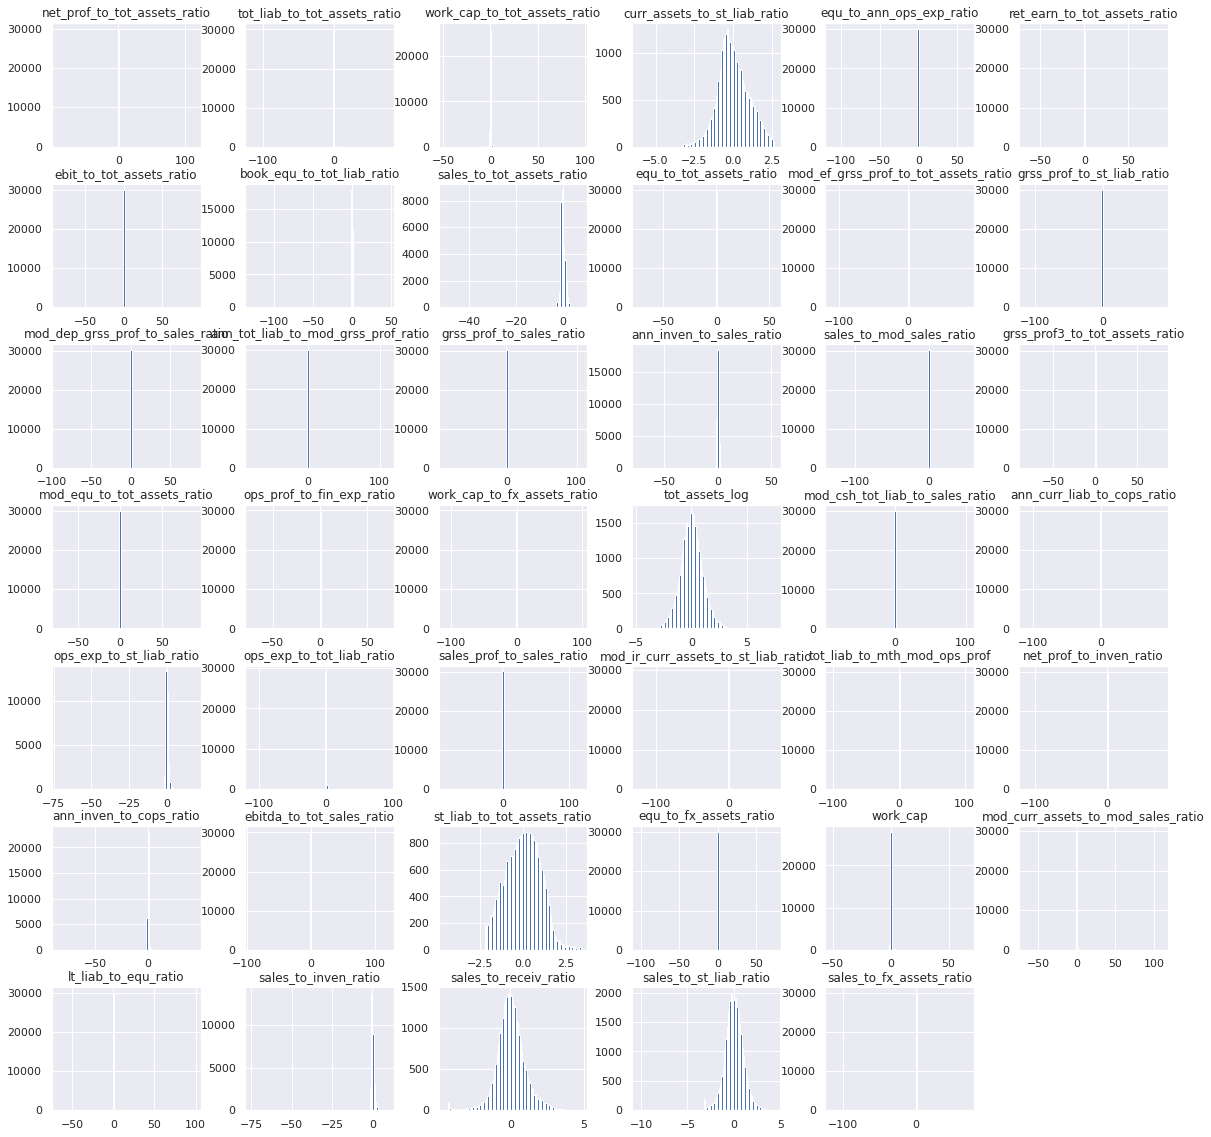

In [41]:
# Use transformer to adjust for skew (includes standardization)
train_x03_tx_df02_skw = train_x03_tx_df02.skew(axis=0,
                                               skipna=True)
train_skewed = train_x03_tx_df02_skw[train_x03_tx_df02_skw > abs(0)]
print(train_x03_tx_df02.shape)
print(f'{train_x03_tx_df02_skw.sort_values(ascending=False)}\n {train_x03_tx_df02_skw.shape}')

'''Use scikit-learn power transformer function (with Yeo-Johnson
transformation) to adjust skewed features closer to normal dist'''
train_x03_tx_df02_sts_fit = PowerTransformer().fit(train_x03_tx_df02)
train_x03_tx_vc05 = train_x03_tx_df02_sts_fit.transform(train_x03_tx_df02)
test_x03_tx_vc05 = train_x03_tx_df02_sts_fit.transform(test_x03_tx_df02)

train_x03_tx_df05 = pd.DataFrame(train_x03_tx_vc05,
                                 columns=train_x03_tx_df01.columns)
test_x03_tx_df05 = pd.DataFrame(test_x03_tx_vc05,
                                columns=train_x03_tx_df01.columns)

# Plot histograms of features after adjusting for skew
train_x03_tx_df05.hist(bins=100, figsize=(20, 20));

#### Preprocessing phase 2 explanation 3.4 \
As previously noted in the EDA section, the values for the vast majority of features is highly skewed; this is most likely do to a large amount of similarly ranged values with several very large outliers. Using the Yeo-Johnson transformation method, some of the features were able to be adjusted to have more normal distributions, as seen in the set of histograms.

### Apply rebalancing technique (using SMOTE) for scaled data {-}

In [42]:
# Apply SMOTE to address class imbalance on training set only (Geeks for Geeks, 2022)
smote_txr = SMOTE(random_state=1699)
train_x03_tx_df03a, \
train_y01_vc01_eda1a = smote_txr.fit_resample(train_x03_tx_df03,
                                              train_y01_vc01_eda1)

print(f'{train_x03_tx_df03.shape}')
print(f'{train_x03_tx_df03a.shape}')
print(f'{train_y01_vc01_eda1a.shape}')

'''__________________________________________________________________________'''
train_x03_tx_df04a, \
train_y01_vc01_eda1b = smote_txr.fit_resample(train_x03_tx_df04,
                                              train_y01_vc01_eda1)

print(f'\n{train_x03_tx_df04.shape}')
print(f'{train_x03_tx_df04a.shape}')
print(f'{train_y01_vc01_eda1b.shape}')

'''__________________________________________________________________________'''
train_x03_tx_df05a, \
train_y01_vc01_eda1c = smote_txr.fit_resample(train_x03_tx_df05,
                                              train_y01_vc01_eda1)

print(f'\n{train_x03_tx_df05.shape}')
print(f'{train_x03_tx_df05a.shape}')
print(f'{train_y01_vc01_eda1c.shape}')

(30174, 41)
(57424, 41)
(57424,)

(30174, 41)
(57424, 41)
(57424,)

(30174, 41)
(57424, 41)
(57424,)


### Apply rebalancing technique (using SMOTE) for unscaled data {-}

In [43]:
# fit and apply the transform
X_over2, \
y_over2 = smote_txr.fit_resample(train_x03_tx_df02,
                                 train_y01_vc01_eda1)

### Apply rebalancing technique (using random oversampling) for unscaled data {-}

In [44]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, \
y_over = oversample.fit_resample(train_x03_tx_df02,
                                         train_y01_vc01_eda1)

#### Preprocessing phase 2 explanation 3.5 \
As there is a relatively significant imbalance in classes for the data set, additional df's were created using: 1) Synthetic Minority Oversampling Technique (SMOTE), which works by creating synthetic data points based on those in the minority class (Korstanje, 2021); and 2) Random over sampling.

## 4. Modeling {-}

### Data Frame Map {-}

|Feature Set (X)       |Data Frame Name          |Comments                                                  |
|----------------------|-------------------------|----------------------------------------------------------|
|1                     |x01_df01                 |full X data set, no transformations                       |
|2a                    |train_x01_df01           |train X, no transformations                               |
|2b                    |test_x01_df01            |test X, no transformations                                |
|3a                    |train_x02_tx_df01        |train X, near zero variance features (if any) removed     |
|3b                    |test_x02_tx_df01         |test X, near zero variance features (if any) removed      |
|3c                    |train_x02_tx_df01_eda1   |train X, #3a + drop duplicates + drop highly correlated   |
|3d                    |test_x02_tx_df01_eda1    |train X, #3b + drop highly correlated                     |
|4a                    |train_x03_tx_df01        |train X, #3c + remove features w/ null count > N*.15      |
|4b                    |test_x03_tx_df01         |test X, #3d + remove features w/ null count > N*.15       |
|5a                    |train_x03_tx_df02        |train X, #4a + missing values imputed                     |
|5b                    |test_x03_tx_df02         |test X, #4b + missing values imputed                      |
|6a                    |train_x03_tx_df03        |train X, #5a + *z*-score scaling                          |
|6b                    |test_x03_tx_df03         |test X, #5b + *z*-score scaling                           |
|6c                    |train_x03_tx_df03a       |train X, #6a + SMOTE rebalancing                          |
|7a                    |train_x03_tx_df04        |train X, #5a + min-max scaling                            |
|7b                    |test_x03_tx_df04         |test X, #5b + min-max scaling                             |
|7c                    |train_x03_tx_df04a       |train X, #7a + SMOTE rebalancing                          |
|8a                    |train_x03_tx_df05        |train X, #5a + skew transformation                        |
|8b                    |test_x03_tx_df05         |test X, #5b + skew transformation                         |
|8c                    |train_x03_tx_df05a       |train X, #8a + SMOTE rebalancing                          |

|Feature Set (Y)       |Data Frame Name          |Comments                                                  |
|----------------------|-------------------------|----------------------------------------------------------|
|9                     |y01_df01                 |full Y data set, no transformations                       |
|10a                   |train_y01_vc01           |train Y, no transformations                               |
|10b                   |train_y01_vc01_eda1      |train Y, #10a + drop duplicates                           |
|10c                   |test_y01_vc01            |test Y, no transformations                                |
|10d                   |train_y01_vc01_eda1a     |train Y, #6a/#10b + SMOTE rebalancing                     |
|10e                   |train_y01_vc01_eda1b     |train Y, #7a/#10b + SMOTE rebalancing                     |
|10f                   |train_y01_vc01_eda1c     |train Y, #8a/#10b + SMOTE rebalancing                     |

### Decision Tree Classifier {-}

Text(0, 0.5, 'Performance')

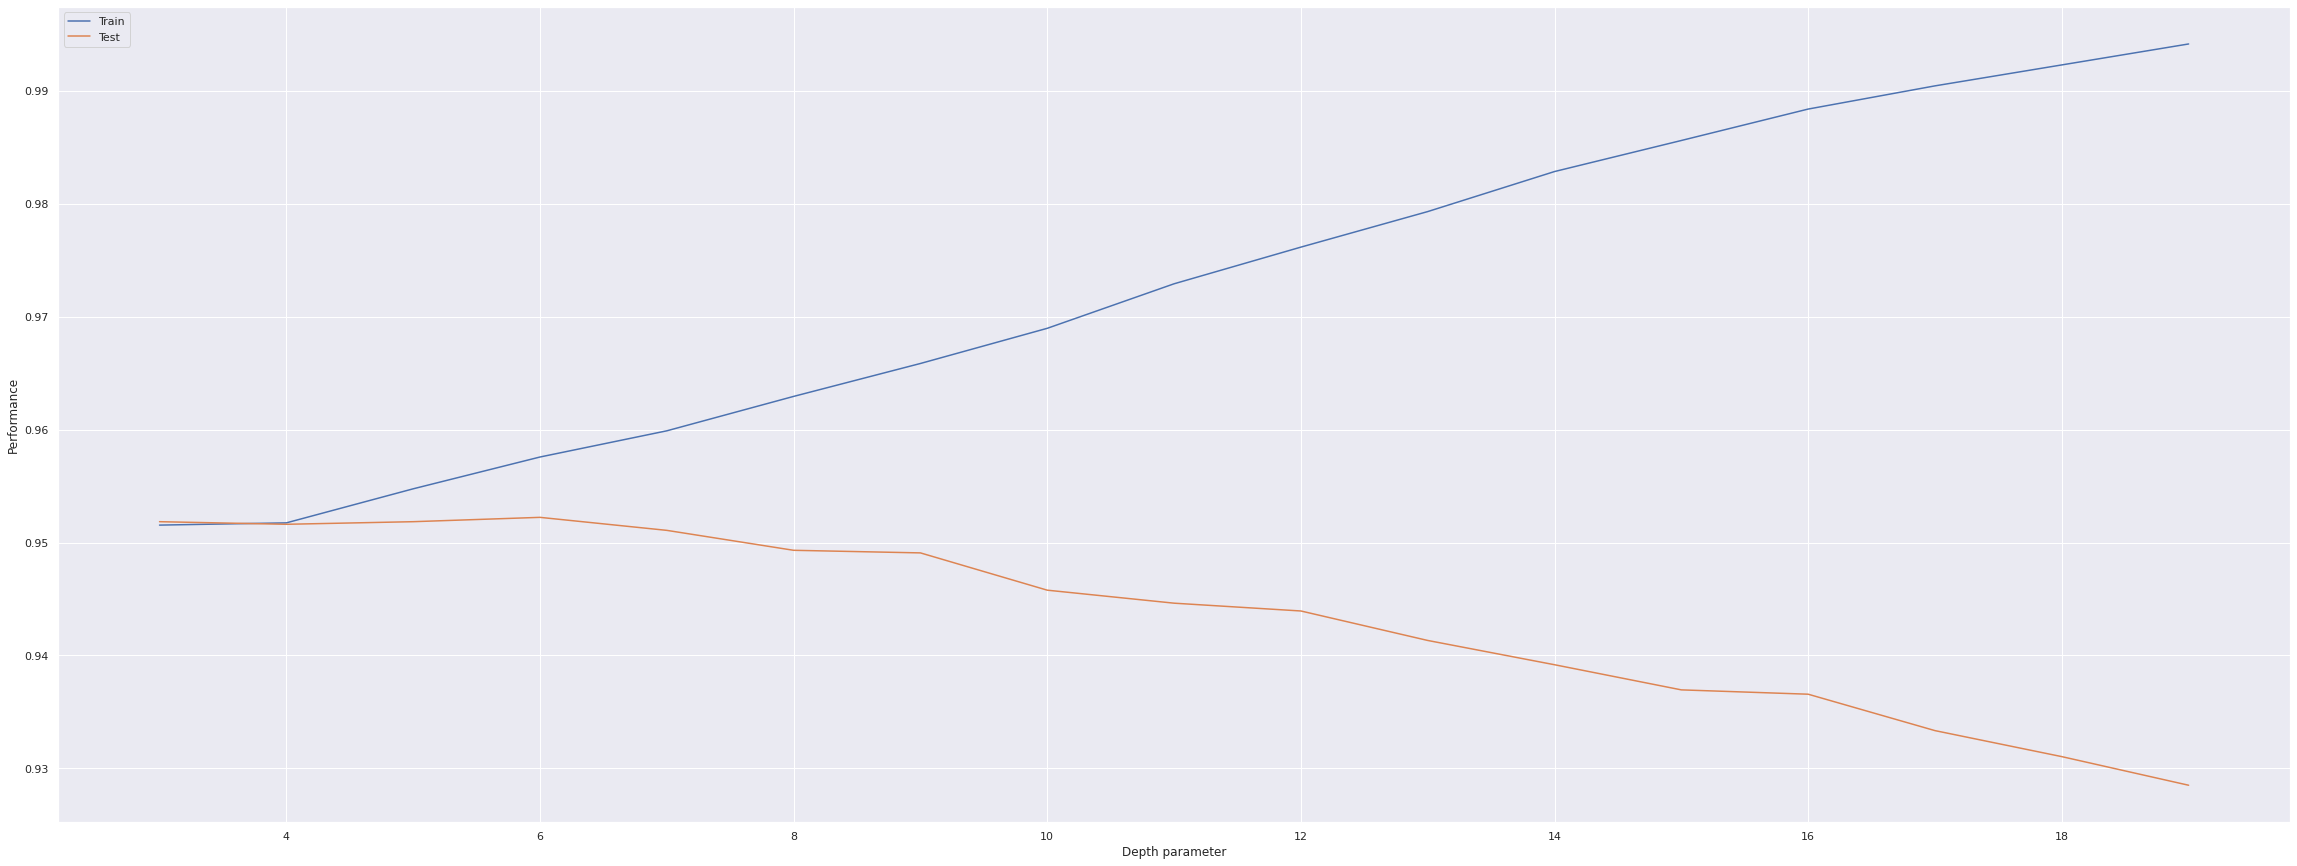

In [45]:
#list to store the output of for loops
train_errors = list()
test_errors = list()
accuracy = list()

#for loop for tree depths between 3 and 20
for x in range(3,20):
  clf = DecisionTreeClassifier(max_depth=x, random_state=1)
  clf = clf.fit(train_x03_tx_df03, train_y01_vc01_eda1)
  y_pred = clf.predict(test_x03_tx_df03)
  train_errors.append(clf.score(train_x03_tx_df03, train_y01_vc01_eda1))
  test_errors.append(clf.score(test_x03_tx_df03, test_y01_vc01))
  accuracy.append(accuracy_score(test_y01_vc01, y_pred))

# Plot of test and training errors
plt.plot(range(3,20),train_errors, label='Train')
plt.plot(range(3,20),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

### Random Forests {-}

In [46]:
#list to store the output of for loops
train_errors = list()
test_errors = list()
accuracy = list()

#for loop for n_estimators between 100 and 1000
for x in range(100,300,100):
  rf = RandomForestClassifier(n_estimators=x, random_state=1)
  rf = rf.fit(train_x03_tx_df03, train_y01_vc01_eda1)
  y_pred = rf.predict(test_x03_tx_df03)
  train_errors.append(rf.score(train_x03_tx_df03, train_y01_vc01_eda1))
  test_errors.append(rf.score(test_x03_tx_df03, test_y01_vc01))
  accuracy.append(accuracy_score(test_y01_vc01, y_pred))

Text(0, 0.5, 'Performance')

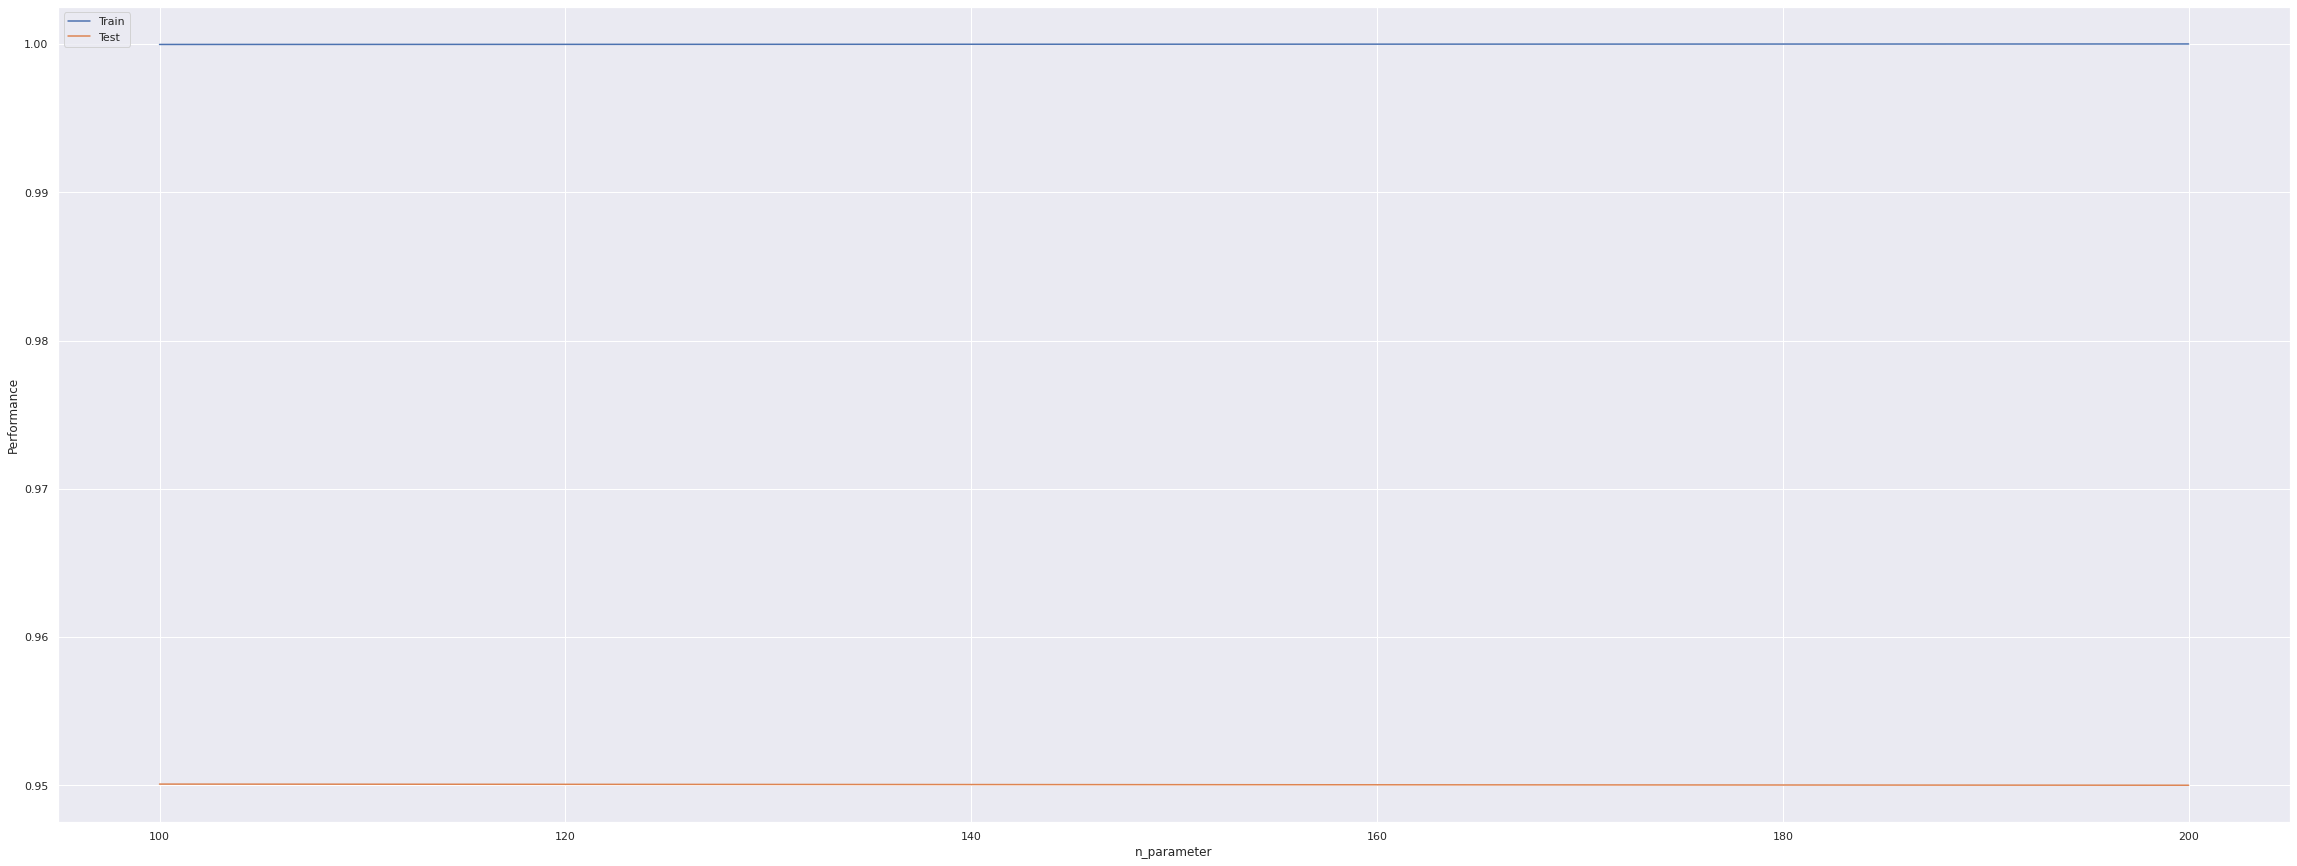

In [47]:
# Plot of test and training errors
plt.plot(range(100,300,100), train_errors, label='Train')
plt.plot(range(100,300,100), test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('n_parameter')
plt.ylabel('Performance')

In [48]:
#develop the final rf model based on the best n_estimators
rf_final = RandomForestClassifier(n_estimators=200, random_state=1)
rf_final = rf_final.fit(train_x03_tx_df03, train_y01_vc01_eda1)

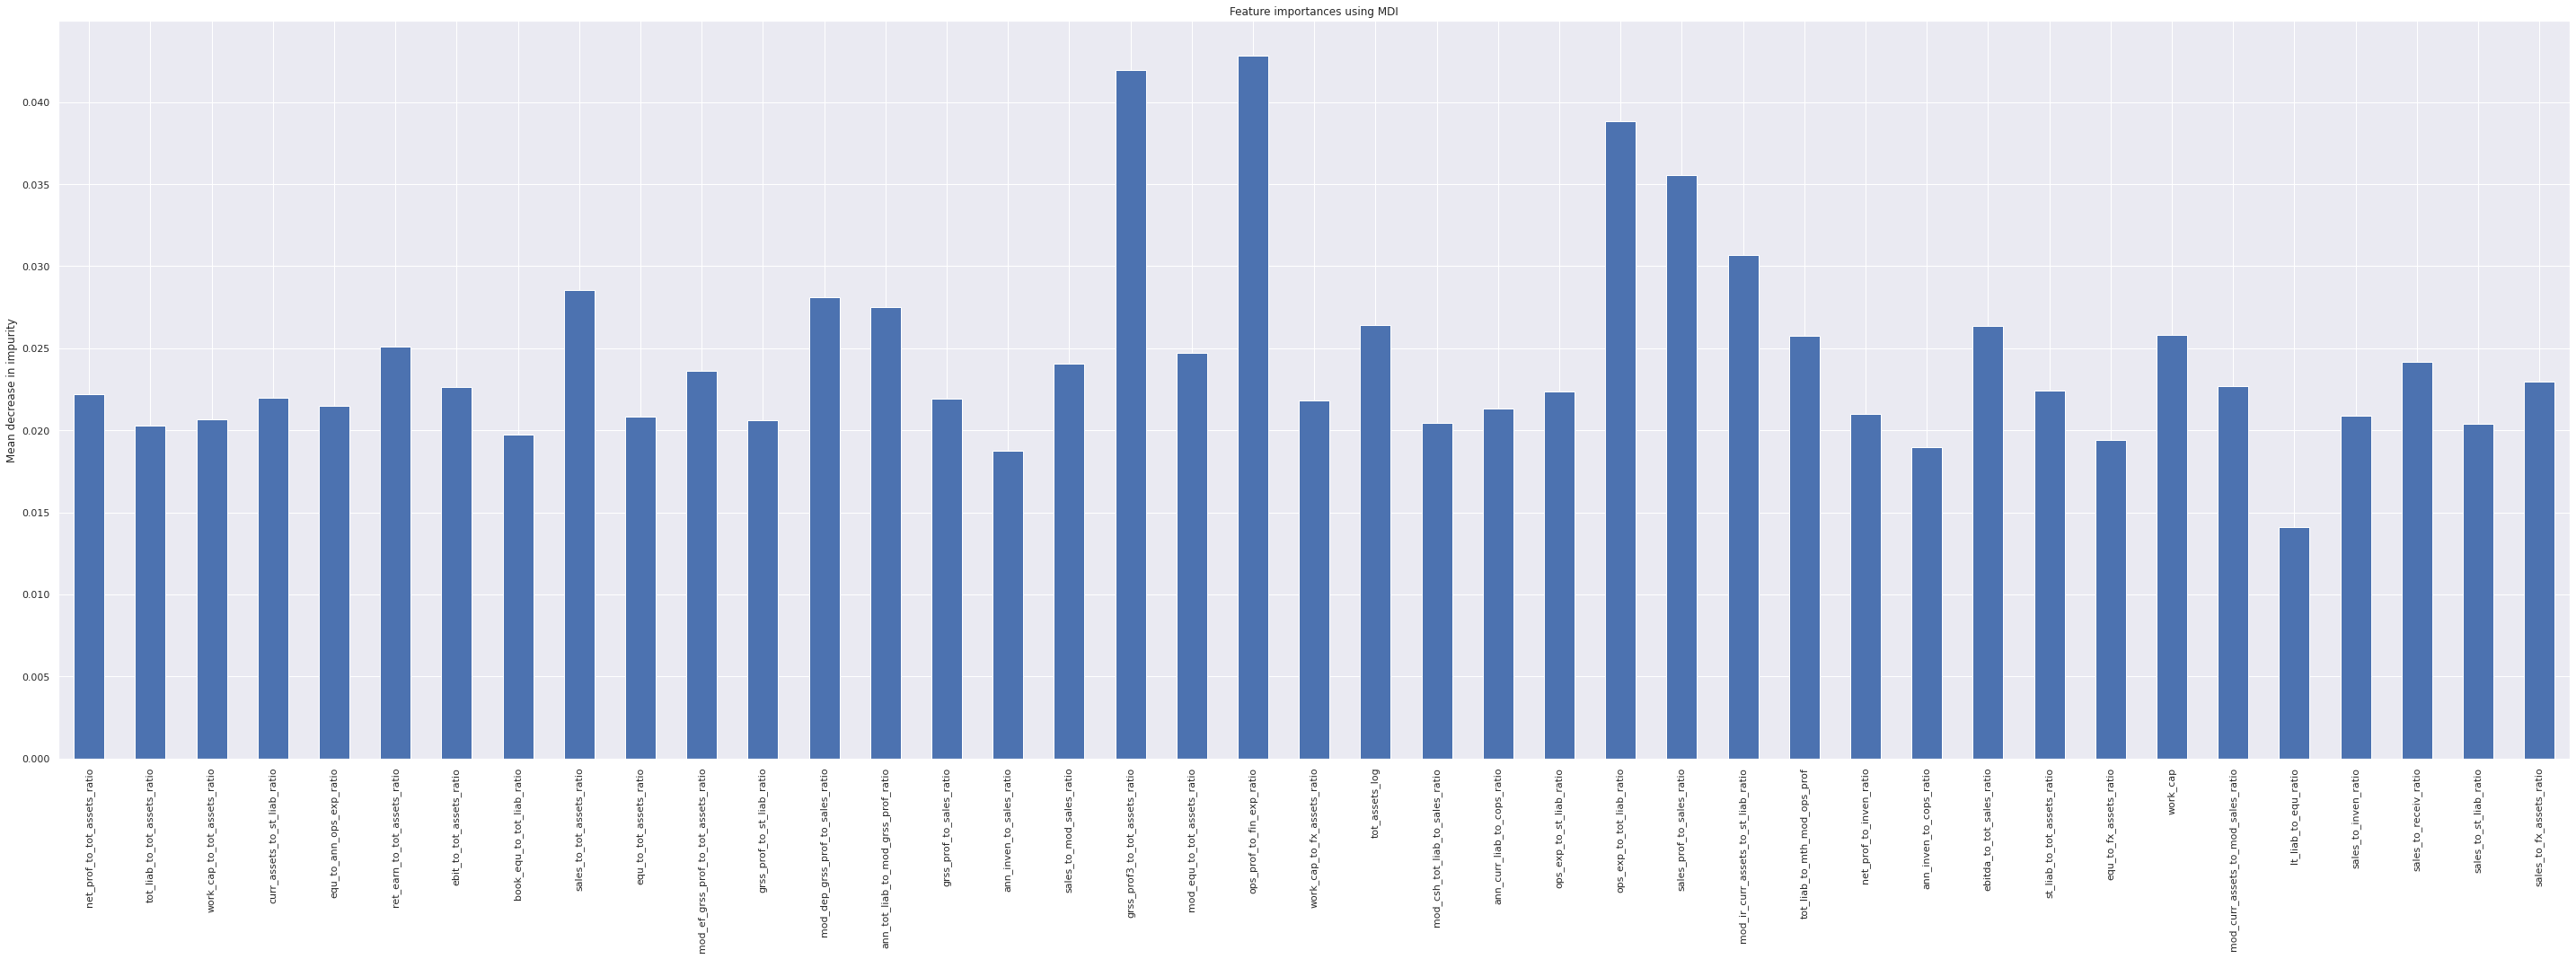

In [49]:
#create the feature names from the training data
feature_names = train_x03_tx_df03.columns

#variable importance variables from the rf model 
importances = rf_final.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

#plot the feature importance of RF
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Define custom function to apply scikit-learn classification grid tuning {-}

In [50]:
# Define function to create scikit-learn classification model standard output
class_names = ['going_concern', 'bankrupt']
def skl_class_model(train_x=None,
                    train_y=None,
                    val_x=None,
                    val_y=None,
                    skl_model=None,
                    grid=None,
                    cv=5):
  '''takes a scikit-learn classifier, train X/Y, val XY, and grid as input;
  displays class eval metrics for training & val; returns the best fit model'''    
  start_time = dt.datetime.today()
  print('+++++++++++++++++++++++++++++++++++++++++++++++++')
  if grid == None:
      model_fit = skl_model.fit(train_x, train_y)
  else: 
      model_gridcv_fit = GridSearchCV(skl_model,
                                      grid,
                                      cv=cv).fit(train_x, train_y)
      model_fit = model_gridcv_fit.best_estimator_
      print(f'Best CV grid parameters for {skl_model}: {model_gridcv_fit.best_params_}')
  print('Training set')
  classificationSummary(train_y,
                        model_fit.predict(train_x))
  print(f'\nAdditional Eval Measures for {skl_model}:')
  print(f'Recall = {recall_score(train_y, model_fit.predict(train_x))}')
  print(f'Precision = {precision_score(train_y, model_fit.predict(train_x))}')
  print(f'F1 = {f1_score(train_y, model_fit.predict(train_x))}')

  print('\n_________________________________________________')
  print('Val/Test set')
  classificationSummary(val_y,
                        model_fit.predict(val_x))
  print(f'\nAdditional Eval Measures for {skl_model}:')
  print(f'Recall = {recall_score(val_y, model_fit.predict(val_x))}')
  print(f'Precision = {precision_score(val_y, model_fit.predict(val_x))}')
  print(f'F1 = {f1_score(val_y, model_fit.predict(val_x))}')

  end_time = dt.datetime.today()
  time_elapsed = end_time - start_time
  print(f'\nStart Time = {start_time}')
  print(f'End Time = {end_time}')
  print(f'Script Time = {time_elapsed}')
  return model_fit

#### Custom modeling function explanation \
Create a custom function to standardize scikit-learn classification process. It was deployed for the KNN, LDA, the boosting methods, and NN modeling.

### Gradient Boosting {-}

> GBT model 1 (dataset with SMOTE)

In [51]:
# #Build GBT model with tuning on number of trees
# boost_1 = GradientBoostingClassifier()
# boost_grid ={'n_estimators':[100,200,500]}
# boost_fit = skl_class_model(train_x=X_over2,
#                                  train_y=y_over2,
#                                  val_x= test_x03_tx_df02,
#                                  val_y=test_y01_vc01,
#                                  skl_model=boost_1,
#                                  grid=boost_grid)
# #Pickle fitted model 
# joblib.dump(boost_fit, folder_path_mods + '/boost_1')

> GBT model 2 (dataset with SMOTE)

In [52]:
# #Build GBT model with 200 trees
# boost_2 = GradientBoostingClassifier(n_estimators=200)
# #boost_grid ={}
# boost_fit = skl_class_model(train_x=X_over2,
#                                  train_y=y_over2,
#                                  val_x= test_x03_tx_df02,
#                                  val_y=test_y01_vc01,
#                                  skl_model=boost_2,
#                                  grid=None)
# #Pickle fitted model 
# joblib.dump(boost_fit, folder_path_mods + '/boost_2')

>GBT model 3 (dataset with RandomSampling)

In [53]:
# #Build GBT model with 200 trees
# boost_3 = GradientBoostingClassifier(n_estimators=200)
# #boost_grid ={}
# boost_fit = skl_class_model(train_x=X_over,
#                                  train_y=y_over,
#                                  val_x= test_x03_tx_df02,
#                                  val_y=test_y01_vc01,
#                                  skl_model=boost_3,
#                                  grid=None)
# #Pickle fitted model 
# joblib.dump(boost_fit, folder_path_mods + '/boost_3')

>GBT model 4 (bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced, removed skew)

In [54]:
# boost_4 = GradientBoostingClassifier(n_estimators=200)
# #boost_grid = None
# boost_fit = skl_class_model(train_x=train_x03_tx_df05a,
#                                  train_y=train_y01_vc01_eda1c,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=boost_4,
#                                  grid=None)
# #Pickle fitted model 
# joblib.dump(boost_fit, folder_path_mods + '/boost_4')

### XGBoosting {-}

> XGBoost 1 (dataset with RandomSampling)

In [55]:
# #Build GBT model with 200 trees
# XGB = XGBClassifier(n_estimators=200)
# SGB_fit = skl_class_model(train_x= X_over,
#                                  train_y=y_over,
#                                  val_x= test_x03_tx_df02,
#                                  val_y=test_y01_vc01,
#                                  skl_model=XGB,
#                                  grid=None)
# #Pickle fitted model 
# joblib.dump(SGB_fit, folder_path_mods + '/xgboost_1')

> XGBoost 2 (bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced, removed skew)

In [56]:
# xgboost_2 = GradientBoostingClassifier(n_estimators=200)
# #boost_grid = None
# boost_fit_2 = skl_class_model(train_x=train_x03_tx_df05a,
#                                  train_y=train_y01_vc01_eda1c,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=xgboost_2,
#                                  grid=None)
# #Pickle fitted model 
# joblib.dump(boost_fit_2, folder_path_mods + '/xgboost_2')

### Neural Network (NN) {-}

> Neural Network model (dataset with RandomOversampling)

In [57]:
#Build neural Network with tuning parameters
#NN = MLPClassifier(max_iter=100)
#grid = {
#    'hidden_layer_sizes': [(20,20,20),(20,)],
#    'activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}
#NN_tune = GridSearchCV(NN, grid, n_jobs=-1, cv=2)
#NN_tune.fit(X_over, y_over) 

In [58]:
# #Build Neural Network model
# NN =MLPClassifier(max_iter=100)
# NN_grid = {'hidden_layer_sizes': [(20,20,20),(20,)], 
#             'activation': ['identity', 'logistic', 'tanh', 'relu'],
#             'solver': ['sgd', 'adam'],
#             'alpha': [0.0001, 0.05],
#             'learning_rate': ['constant','adaptive']}
# NN_fit= skl_class_model(train_x= X_over,
#                          train_y=y_over,
#                          val_x= test_x03_tx_df02,
#                          val_y=test_y01_vc01,
#                          skl_model=NN,
#                          grid=NN_grid,
#                          cv=2)
# #Pickle fitted model 
# joblib.dump(NN_fit, folder_path_mods + '/NN_tune')

### *K*-nearest neighbors (KNN) {-}

In [59]:
'''
These algorithms were run using the custom function defined above to return
a fit model; however, as the models took several hours to train, the fitted
model has been pickled and the code has been commented out to avoid
repeated need to absorb computation resources. Evaluation measure
outputs for each model are included in the appropriate section below.
'''

# # Run k-nearest neighbors (KNN) algorithm
# # Sets Bundle 1: Cleaned, eliminated features, z-score scaled, no rebalancing
# knn_mod_v1 = KNeighborsClassifier()

# knn_mod_v1_grd = {'n_neighbors': range(1, 30, 2),
#                   'weights': ['uniform', 'distance'],
#                   'p': [1, 2]}

# knn_mod_v1_fit = skl_class_model(train_x=train_x03_tx_df03,
#                                  train_y=train_y01_vc01_eda1,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=knn_mod_v1,
#                                  grid=knn_mod_v1_grd,
#                                  cv=5)

# #print(knn_mod_v1_fit.kneighbors_graph())

# # Sets Bundle 2: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced
# knn_mod_v2_fit = skl_class_model(train_x=train_x03_tx_df03a,
#                                  train_y=train_y01_vc01_eda1a,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=knn_mod_v1,
#                                  grid=knn_mod_v1_grd,
#                                  cv=5)

# # Sets Bundle 3: Cleaned, eliminated features, z-score scaled, no rebalancing,
# #-- removed skew
# knn_mod_v3_fit = skl_class_model(train_x=train_x03_tx_df05,
#                                  train_y=train_y01_vc01_eda1,
#                                  val_x=test_x03_tx_df05,
#                                  val_y=test_y01_vc01,
#                                  skl_model=knn_mod_v1,
#                                  grid=knn_mod_v1_grd,
#                                  cv=5)

# # Sets Bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced,
# #-- removed skew
# knn_mod_v4_fit = skl_class_model(train_x=train_x03_tx_df05a,
#                                  train_y=train_y01_vc01_eda1c,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=knn_mod_v1,
#                                  grid=knn_mod_v1_grd,
#                                  cv=5)

'\nThese algorithms were run using the custom function defined above to return\na fit model; however, as the models took several hours to train, the fitted\nmodel has been pickled and the code has been commented out to avoid\nrepeated need to absorb computation resources. Evaluation measure\noutputs for each model are included in the appropriate section below.\n'

#### KNN modeling explanation \
Deploy four different KNN classifiers, using different df's to determine which is best in turns of maximizing efficiency and performance. \
The data sets have the following characteristics: \
* Data Sets Bundle 1: Cleaned, eliminated features, *z*-score scaled, no rebalancing \
* Data Sets Bundle 2: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced \
* Data Sets Bundle 3: Cleaned, eliminated features, z-score scaled, no rebalancing, removed skew \
* Data Sets Bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced, removed skew\
\
KNN is generally suspetible to noise in the data, which given the relative size and prevalance of the outliers is very likely to be present in this data. As such, KNN is being used more as comparative model.

### Linear Discriminant Analysis (LDA) {-}

In [60]:
'''
These algorithms were run using the custom function defined above to return
a fit model; however, as the models took several hours to train, the fitted
model has been pickled and the code has been commented out to avoid
repeated need to absorb computation resources. Evaluation measure
outputs for each model are included in the appropriate section below.
'''

# # Run linear discriminant analysis (LDA) algorithm
# lda_mod_v1 = LinearDiscriminantAnalysis()

# lda_mod_v1_grd = {'solver': ['svd', 'lsqr', 'eigen'],
#                   'shrinkage': [.001, .01, .05, .1, .5, 1, 'auto', None],
#                   'store_covariance': [True, False]}

# # Sets Bundle 1: Cleaned, eliminated features, z-score scaled, no rebalancing
# lda_mod_v1_fit = skl_class_model(train_x=train_x03_tx_df03,
#                                  train_y=train_y01_vc01_eda1,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=lda_mod_v1,
#                                  grid=lda_mod_v1_grd,
#                                  cv=5)

# # Sets Bundle 2: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced
# lda_mod_v2_fit = skl_class_model(train_x=train_x03_tx_df03a,
#                                  train_y=train_y01_vc01_eda1a,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=lda_mod_v1,
#                                  grid=lda_mod_v1_grd,
#                                  cv=5)

# # Sets Bundle 3: Cleaned, eliminated features, z-score scaled, no rebalancing, 
# #--removed skew
# lda_mod_v3_fit = skl_class_model(train_x=train_x03_tx_df05,
#                                  train_y=train_y01_vc01_eda1,
#                                  val_x=test_x03_tx_df05,
#                                  val_y=test_y01_vc01,
#                                  skl_model=lda_mod_v1,
#                                  grid=lda_mod_v1_grd,
#                                  cv=5)

# # Sets Bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced,
# #-- removed skew
# lda_mod_v4_fit = skl_class_model(train_x=train_x03_tx_df05a,
#                                  train_y=train_y01_vc01_eda1c,
#                                  val_x=test_x03_tx_df03,
#                                  val_y=test_y01_vc01,
#                                  skl_model=lda_mod_v1,
#                                  grid=lda_mod_v1_grd,
#                                  cv=5)

'\nThese algorithms were run using the custom function defined above to return\na fit model; however, as the models took several hours to train, the fitted\nmodel has been pickled and the code has been commented out to avoid\nrepeated need to absorb computation resources. Evaluation measure\noutputs for each model are included in the appropriate section below.\n'

#### LDA modeling explanation \
Deploy four different LDA classifiers, using different df's to determine which is best in turns of maximizing efficiency and performance. \
The data sets have the following characteristics: \
- Data Sets Bundle 1: Cleaned, eliminated features, *z*-score scaled, no rebalancing \
- Data Sets Bundle 2: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced \
- Data Sets Bundle 3: Cleaned, eliminated features, z-score scaled, no rebalancing, removed skew \
- Data Sets Bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced, removed skew

LDA is generally suspetible to outliers which appear to be inherent in this data. As such, LDA is being used more as comparative model.

## 5. Model evaluation {-}

#### File paths to NNet, XGBoost and GBT {-}

In [61]:
##For these use test set: test_y01_vc01test_x03_tx_df02, test_y01_vc01
boost_1 = joblib.load(folder_path_mods + '/boost_1')
#boost_2=joblib.load(folder_path_mods + '/boost_2.pickle')
boost_3 = joblib.load(folder_path_mods + '/boost_3')
#xgboost_1=joblib.load(folder_path_mods + '/xgboost_1.pickle')
NN_tune = joblib.load(folder_path_mods + '/NN_tune')

#For these use test set: test_x03_tx_df03, test_y01_vc01
xgboost_2 = joblib.load(folder_path_mods + '/xgboost_2')
boost_4 = joblib.load(folder_path_mods + '/boost_4')


#### File paths to KNN and LDA output {-}

In [62]:
# Load best estimator grid parameters and final model fit to training data set

# KNN
# Sets Bundle 1: Cleaned, eliminated features, z-score scaled, no rebalancing
knn_mod_v1_path = r'/KNeighborsClassifier^n_neighbors-13_p-1^2022-10-07_00-25-33-358581.pickle'
knn_mod_v1_fit = joblib.load(folder_path + r'/models' + knn_mod_v1_path)
knn_mod_v1_fit_grd = joblib.load(folder_path + r'/grids' + knn_mod_v1_path)
print(knn_mod_v1_fit_grd)
print(knn_mod_v1_fit)

# Sets Bundle 2: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced
knn_mod_v2_path = r'/KNeighborsClassifier^n_neighbors-1_p-1^2022-10-07_00-52-41-032112.pickle'
knn_mod_v2_fit = joblib.load(folder_path + r'/models' + knn_mod_v2_path)
knn_mod_v2_fit_grd = joblib.load(folder_path + r'/grids' + knn_mod_v2_path)
print('\n', knn_mod_v2_fit_grd)
print(knn_mod_v2_fit)

# Sets Bundle 3: Cleaned, eliminated features, z-score scaled, no rebalancing, 
#--removed skew
knn_mod_v3_path = r'/KNeighborsClassifier^n_neighbors-21^2022-10-07_02-35-01-540637.pickle'
knn_mod_v3_fit = joblib.load(folder_path + r'/models' + knn_mod_v3_path)
knn_mod_v3_fit_grd = joblib.load(folder_path + r'/grids' + knn_mod_v3_path)
print('\n', knn_mod_v3_fit_grd)
print(knn_mod_v3_fit)

# Sets Bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced, 
#--removed skew
knn_mod_v4_path = r'/KNeighborsClassifier^n_neighbors-1^2022-10-07_03-01-04-140264.pickle'
knn_mod_v4_fit = joblib.load(folder_path + r'/models' + knn_mod_v4_path)
knn_mod_v4_fit_grd = joblib.load(folder_path + r'/grids' + knn_mod_v4_path)
print('\n', knn_mod_v4_fit_grd)
print(knn_mod_v4_fit)

# LDA
# Sets Bundle 1: Cleaned, eliminated features, z-score scaled, no rebalancing
lda_mod_v1_path = r'/LinearDiscriminantAnalysis^shrinkage-0.5_solver-lsqr_store_covariance-True^2022-10-07_11-08-29-174541.pickle'
lda_mod_v1_fit = joblib.load(folder_path + r'/models' + lda_mod_v1_path)
lda_mod_v1_fit_grd = joblib.load(folder_path + r'/grids' + lda_mod_v1_path)
print(lda_mod_v1_fit_grd)
print(lda_mod_v1_fit)

# Sets Bundle 2: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced
lda_mod_v2_path = r'/LinearDiscriminantAnalysis^store_covariance-True^2022-10-07_11-08-46-890084.pickle'
lda_mod_v2_fit = joblib.load(folder_path + r'/models' + lda_mod_v2_path)
lda_mod_v2_fit_grd = joblib.load(folder_path + r'/grids' + lda_mod_v2_path)
print('\n', lda_mod_v2_fit_grd)
print(lda_mod_v2_fit)

# Sets Bundle 3: Cleaned, eliminated features, z-score scaled, no rebalancing, 
#--removed skew
lda_mod_v3_path = r'/LinearDiscriminantAnalysis^shrinkage-0.1_solver-lsqr_store_covariance-True^2022-10-07_11-09-21-893014.pickle'
lda_mod_v3_fit = joblib.load(folder_path + r'/models' + lda_mod_v3_path)
lda_mod_v3_fit_grd = joblib.load(folder_path + r'/grids' + lda_mod_v3_path)
print('\n', lda_mod_v3_fit_grd)
print(lda_mod_v3_fit)

# Sets Bundle 4: Cleaned, eliminated features, z-score scaled, SMOTE rebalanced,
#-- removed skew
lda_mod_v4_path = r'/LinearDiscriminantAnalysis^store_covariance-True^2022-10-07_11-09-40-471260.pickle'
lda_mod_v4_fit = joblib.load(folder_path + r'/models' + lda_mod_v4_path)
lda_mod_v4_fit_grd = joblib.load(folder_path + r'/grids' + lda_mod_v4_path)
print('\n', lda_mod_v4_fit_grd)
print(lda_mod_v4_fit)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})
KNeighborsClassifier(n_neighbors=13, p=1)

 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})
KNeighborsClassifier(n_neighbors=1, p=1)

 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})
KNeighborsClassifier(n_neighbors=21)

 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})
KNeighborsClassifier(n_neighbors=1)
GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [

### Final models and training/testing output {-}

#### Decision Tree Classifer Model {-}





In [63]:
#develop the final decision tree classifier from
clf_final = DecisionTreeClassifier(max_depth=6,
                                   random_state=1)
clf_final.fit(train_x03_tx_df03, train_y01_vc01_eda1)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [64]:
#predictions for the training data and test data
clf_train_pred = clf_final.predict(train_x03_tx_df03)
clf_test_pred = clf_final.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
clf_train_prob = clf_final.predict_proba(train_x03_tx_df03)
clf_test_prob = clf_final.predict_proba(test_x03_tx_df03)

In [65]:
#confusion matrix for decision tree training
print("Confusion Matrix for Decision Tree Training")
classificationSummary(train_y01_vc01_eda1,
                      clf_final.predict(train_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for Decision Tree Training
Confusion Matrix (Accuracy 0.9576)

              Prediction
       Actual going_concern      bankrupt
going_concern         28654            58
     bankrupt          1222           240


In [66]:
#classifiation report for decision tree training
print("Classification Report for Decision Tree Training")
print(classification_report(train_y01_vc01_eda1,
                            clf_train_pred,
                            target_names=class_names))

Classification Report for Decision Tree Training
               precision    recall  f1-score   support

going_concern       0.96      1.00      0.98     28712
     bankrupt       0.81      0.16      0.27      1462

     accuracy                           0.96     30174
    macro avg       0.88      0.58      0.63     30174
 weighted avg       0.95      0.96      0.94     30174



In [67]:
#confusion matrix for decision tree test
print("Confusion Matrix for Decision Tree Test")
classificationSummary(test_y01_vc01,
                      clf_final.predict(test_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for Decision Tree Test
Confusion Matrix (Accuracy 0.9522)

              Prediction
       Actual going_concern      bankrupt
going_concern         12347            48
     bankrupt           574            53


In [68]:
#classifiation report for decision tree
print("Classification Report for Decision Tree Test")
print(classification_report(test_y01_vc01,
                            clf_test_pred,
                            target_names=class_names))

Classification Report for Decision Tree Test
               precision    recall  f1-score   support

going_concern       0.96      1.00      0.98     12395
     bankrupt       0.52      0.08      0.15       627

     accuracy                           0.95     13022
    macro avg       0.74      0.54      0.56     13022
 weighted avg       0.93      0.95      0.94     13022



In [69]:
#Model performance on the test set
classificationSummary(test_y01_vc01,
                      clf_final.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {clf_final}:')
print(f'Recall = {recall_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03))}')

Confusion Matrix (Accuracy 0.9522)

              Prediction
       Actual going_concern      bankrupt
going_concern         12347            48
     bankrupt           574            53

Additional Eval Measures for DecisionTreeClassifier(max_depth=6, random_state=1):
Recall = 0.08452950558213716
Precision = 0.5247524752475248
F1 = 0.14560439560439561


In [70]:
#create the results dataframe for the full predictor set probability values 
test_clf_results = pd.DataFrame({'actual': test_y01_vc01,
                                 'p(0)': [p[0] for p in clf_test_prob],
                                 'p(1)': [p[1] for p in clf_test_prob],
                                 'predicted': clf_test_pred})
test_clf_results = test_clf_results.sort_values(by=['p(1)'],
                                                ascending=False)
test_clf_results.head()

,actual,p(0),p(1),predicted
6865,0,0.0,1.0,1
273,1,0.0,1.0,1
11038,0,0.0,1.0,1
12710,0,0.0,1.0,1
6314,0,0.0,1.0,1


###### Lift and Gains charts {-}

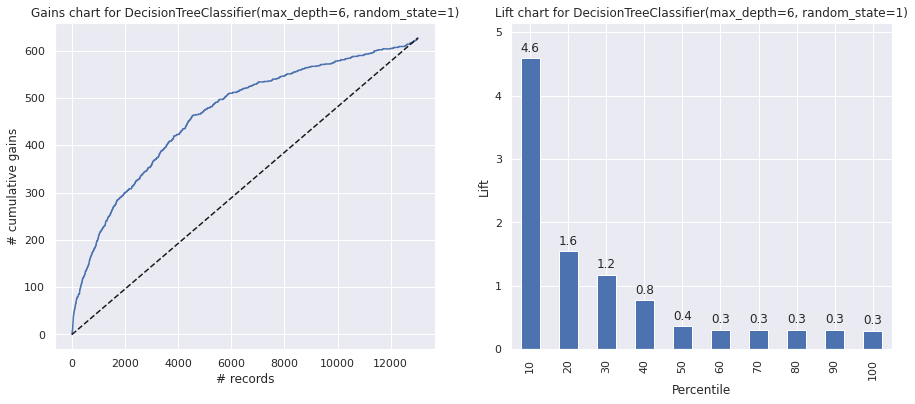

In [71]:
#develop the lift and gain charts for the decision tree classifier
clf_df = test_clf_results.sort_values(by=['p(1)'],
                                      ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(clf_df.actual, ax=axes[0])
liftChart(clf_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {clf_final}')
axes[1].set_title(f'Lift chart for {clf_final}')
plt.show()

#### Random Forests Model {-}

In [72]:
#develop the final rf model based on the best n_estimators
rf_final = RandomForestClassifier(n_estimators=200,
                                  random_state=1)
rf_final = rf_final.fit(train_x03_tx_df03, train_y01_vc01_eda1)

In [73]:
#create the feature names from the training data
feature_names = train_x03_tx_df03.columns

In [74]:
#predictions for the training data and test data
rf_train_pred = rf_final.predict(train_x03_tx_df03)
rf_test_pred = rf_final.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
rf_train_prob = rf_final.predict_proba(train_x03_tx_df03)
rf_test_prob = rf_final.predict_proba(test_x03_tx_df03)

In [75]:
#confusion matrix for random forest training
print("Confusion Matrix for Random Forest Training")
classificationSummary(train_y01_vc01_eda1,
                      rf_final.predict(train_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for Random Forest Training
Confusion Matrix (Accuracy 1.0000)

              Prediction
       Actual going_concern      bankrupt
going_concern         28712             0
     bankrupt             0          1462


In [76]:
#classifiation report for random forest training
print("Classification Report for Random Forest Training")
print(classification_report(train_y01_vc01_eda1,
                            rf_train_pred,
                            target_names=class_names))

Classification Report for Random Forest Training
               precision    recall  f1-score   support

going_concern       1.00      1.00      1.00     28712
     bankrupt       1.00      1.00      1.00      1462

     accuracy                           1.00     30174
    macro avg       1.00      1.00      1.00     30174
 weighted avg       1.00      1.00      1.00     30174



In [77]:
#confusion matrix for random forest test
print("Confusion Matrix for Random Forest Test")
classificationSummary(test_y01_vc01,
                      rf_final.predict(test_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for Random Forest Test
Confusion Matrix (Accuracy 0.9500)

              Prediction
       Actual going_concern      bankrupt
going_concern         12340            55
     bankrupt           596            31


In [78]:
#classifiation report for random forest
print("Classification Report for Random Forest Test")
print(classification_report(test_y01_vc01,
                            rf_test_pred,
                            target_names=class_names))

Classification Report for Random Forest Test
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.97     12395
     bankrupt       0.36      0.05      0.09       627

     accuracy                           0.95     13022
    macro avg       0.66      0.52      0.53     13022
 weighted avg       0.93      0.95      0.93     13022



In [79]:
#Model performance on the test set
classificationSummary(test_y01_vc01,
                      rf_final.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {rf_final}:')
print(f'Recall = {recall_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03))}')

Confusion Matrix (Accuracy 0.9500)

              Prediction
       Actual going_concern      bankrupt
going_concern         12340            55
     bankrupt           596            31

Additional Eval Measures for RandomForestClassifier(n_estimators=200, random_state=1):
Recall = 0.049441786283891544
Precision = 0.36046511627906974
F1 = 0.08695652173913043


In [80]:
#create the results dataframe for the full predictor set probability values 
test_rf_results = pd.DataFrame({'actual': test_y01_vc01,
                                'p(0)': [p[0] for p in rf_test_prob],
                                'p(1)': [p[1] for p in rf_test_prob],
                                'predicted': rf_test_pred})
test_rf_results = test_clf_results.sort_values(by=['p(1)'],ascending=False)
test_rf_results.head()

,actual,p(0),p(1),predicted
6865,0,0.0,1.0,1
7044,1,0.0,1.0,1
12377,1,0.0,1.0,1
3705,1,0.0,1.0,1
7534,1,0.0,1.0,1


###### Lift and Gains charts {-}

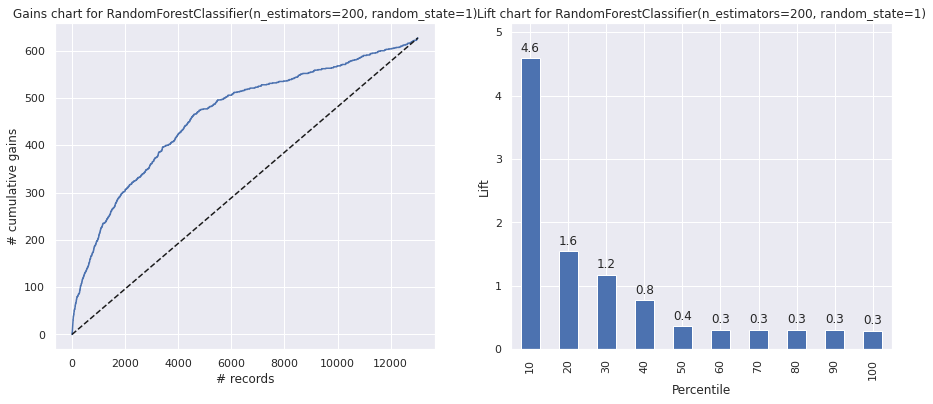

In [81]:
#develop the lift and gain charts for the decision tree classifier
rf_df = test_rf_results.sort_values(by=['p(1)'],
                                    ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(rf_df.actual, ax=axes[0])
liftChart(rf_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {rf_final}')
axes[1].set_title(f'Lift chart for {rf_final}')
plt.show()

#### Gradient Boosted Trees (GBT) Models {-}

##### GBT Model 1 {-}

In [82]:
#Load pickled model
boost_1 = joblib.load(folder_path_mods + '/boost_1')
print(boost_1)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      boost_1.predict(test_x03_tx_df02),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {boost_1}:')
print(f'Recall = {recall_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02))}')
print(f'Precision = {precision_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02))}')
print(f'F1 = {f1_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02))}')

GradientBoostingClassifier(n_estimators=500)
Confusion Matrix (Accuracy 0.9201)

              Prediction
       Actual going_concern      bankrupt
going_concern         11676           719
     bankrupt           321           306

Additional Eval Measures for GradientBoostingClassifier(n_estimators=500):
Recall = 0.4880382775119617
Precision = 0.29853658536585365
F1 = 0.3704600484261501


In [83]:
#predictions for the training data and test data
gbt_train_pred = boost_1.predict(train_x03_tx_df02)
gbt_test_pred = boost_1.predict(test_x03_tx_df02)

#return the predicted probabilites into a single variable for training and test
gbt_train_prob = boost_1.predict_proba(train_x03_tx_df02)
gbt_test_prob = boost_1.predict_proba(test_x03_tx_df02)

In [84]:
#create the results dataframe for the full predictor set probability values 
test_gbt_results = pd.DataFrame({'actual': test_y01_vc01,
                                 'p(0)': [p[0] for p in gbt_test_prob],
                                 'p(1)': [p[1] for p in gbt_test_prob],
                                 'predicted': gbt_test_pred})

test_gbt_results = test_gbt_results.sort_values(by=['p(1)'],
                                                ascending=False)
test_gbt_results.head()

,actual,p(0),p(1),predicted
6739,1,0.004984,0.995016,1
9096,1,0.012047,0.987953,1
366,1,0.019239,0.980761,1
2907,1,0.019930,0.980070,1
2548,1,0.021847,0.978153,1


###### Lift and Gains charts {-}

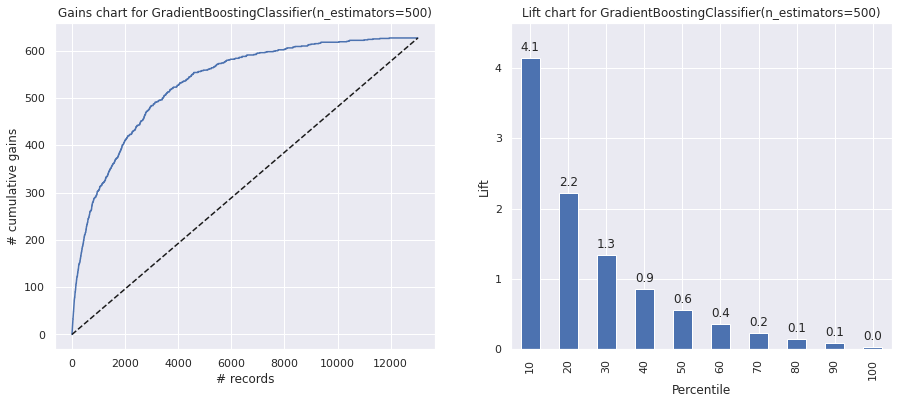

In [85]:
#develop the lift and gain charts for the decision tree classifier
gbt_df = test_gbt_results.sort_values(by=['p(1)'],
                                      ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(gbt_df.actual, ax=axes[0])
liftChart(gbt_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {boost_1}')
axes[1].set_title(f'Lift chart for {boost_1}')
plt.show()

In [86]:
# Examine evaluation measure impact based on setting ROI cutoff
gbt_df['cum_gains'] = gbt_df['actual'].cumsum()
#gbt_df = gbt_df.loc[gbt_df['actual'] == 1]

variable = 150
print(gbt_df[gbt_df['cum_gains'] == variable])

gbt_df02 = gbt_df.loc[gbt_df['cum_gains'] <= variable]
gbt_df02a = gbt_df.copy()
print(gbt_df02.shape)
print(gbt_df02a.shape)

#Model performance on the test set
classificationSummary(gbt_df02['actual'],
                      gbt_df02['predicted'],
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {boost_1}:')
print(f'Recall = {recall_score(gbt_df02.actual, gbt_df02.predicted)}')
print(f'Precision = {precision_score(gbt_df02.actual, gbt_df02.predicted)}')
print(f'F1 = {f1_score(gbt_df02.actual, gbt_df02.predicted)}')

      actual      p(0)      p(1)  predicted  cum_gains
1894       1  0.232175  0.767825          1        150
3657       0  0.232388  0.767612          1        150
7555       0  0.233120  0.766880          1        150
(276, 5)
(13022, 5)
Confusion Matrix (Accuracy 0.5435)

              Prediction
       Actual going_concern      bankrupt
going_concern             0           126
     bankrupt             0           150

Additional Eval Measures for GradientBoostingClassifier(n_estimators=500):
Recall = 1.0
Precision = 0.5434782608695652
F1 = 0.704225352112676


##### GBT Model 2 {-}

In [87]:
#Load pickled model
boost_2 = joblib.load(folder_path_mods + '/boost_2.pickle')
print(boost_2)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      boost_2.predict(test_x03_tx_df02),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {boost_2}:')
print(f'Recall = {recall_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02))}')
print(f'Precision = {precision_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02))}')
print(f'F1 = {f1_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02))}')

GradientBoostingClassifier(n_estimators=200)
Confusion Matrix (Accuracy 0.8764)

              Prediction
       Actual going_concern      bankrupt
going_concern         11066          1329
     bankrupt           281           346

Additional Eval Measures for GradientBoostingClassifier(n_estimators=200):
Recall = 0.5518341307814992
Precision = 0.20656716417910448
F1 = 0.3006081668114683


##### GBT Model 3 {-}

In [88]:
#Load pickled model
boost_3 = joblib.load(folder_path_mods + '/boost_3')
print(boost_3)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      boost_3.predict(test_x03_tx_df02),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {boost_3}:')
print(f'Recall = {recall_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02))}')
print(f'Precision = {precision_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02))}')
print(f'F1 = {f1_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02))}')

GradientBoostingClassifier(n_estimators=200)
Confusion Matrix (Accuracy 0.8227)

              Prediction
       Actual going_concern      bankrupt
going_concern         10272          2123
     bankrupt           186           441

Additional Eval Measures for GradientBoostingClassifier(n_estimators=200):
Recall = 0.7033492822966507
Precision = 0.17199687987519502
F1 = 0.27640238169852716


##### GBT Model 4 {-}

In [89]:
#Load pickled model
boost_4 = joblib.load(folder_path_mods + '/boost_4')
print(boost_4)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      boost_4.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {boost_4}:')
print(f'Recall = {recall_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03))}')

GradientBoostingClassifier(n_estimators=200)
Confusion Matrix (Accuracy 0.2995)

              Prediction
       Actual going_concern      bankrupt
going_concern          3315          9080
     bankrupt            42           585

Additional Eval Measures for GradientBoostingClassifier(n_estimators=200):
Recall = 0.9330143540669856
Precision = 0.060527677185721676
F1 = 0.1136805285658764


#### XGBoost Models {-}

##### XGBoost Model 1 {-}

In [90]:
#Load pickled model
xgboost_1 = joblib.load(folder_path_mods + '/xgboost_1.pickle')
print(xgboost_1)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      xgboost_1.predict(test_x03_tx_df02),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {xgboost_1}:')
print(f'Recall = {recall_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02))}')
print(f'Precision = {precision_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02))}')
print(f'F1 = {f1_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02))}')

XGBClassifier(missing=nan, n_estimators=200)
Confusion Matrix (Accuracy 0.8187)

              Prediction
       Actual going_concern      bankrupt
going_concern         10206          2189
     bankrupt           172           455

Additional Eval Measures for XGBClassifier(missing=nan, n_estimators=200):
Recall = 0.7256778309409888
Precision = 0.1720877458396369
F1 = 0.2782023845918679


In [91]:
#predictions for the training data and test data
xgb_train_pred = xgboost_1.predict(train_x03_tx_df02)
xgb_test_pred = xgboost_1.predict(test_x03_tx_df02)

#return the predicted probabilites into a single variable for training and test
xgb_train_prob = xgboost_1.predict_proba(train_x03_tx_df02)
xgb_test_prob = xgboost_1.predict_proba(test_x03_tx_df02)

In [92]:
#create the results dataframe for the full predictor set probability values 
test_xgb_results = pd.DataFrame({'actual': test_y01_vc01,
                                 'p(0)': [p[0] for p in xgb_test_prob],
                                 'p(1)': [p[1] for p in xgb_test_prob],
                                 'predicted': xgb_test_pred})

test_xgb_results = test_xgb_results.sort_values(by=['p(1)'],ascending=False)

test_xgb_results.head()

,actual,p(0),p(1),predicted
1811,1,0.026374,0.973626,1
11267,0,0.033347,0.966653,1
10998,1,0.033360,0.966640,1
7095,0,0.036633,0.963367,1
3113,1,0.037111,0.962889,1


###### Lift and Gains charts {-}

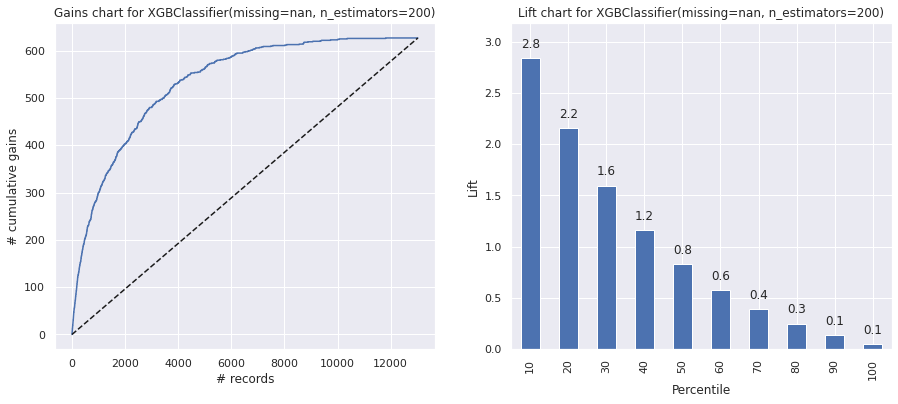

In [93]:
#develop the lift and gain charts 
xgb_df = test_xgb_results.sort_values(by=['p(1)'],
                                      ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(xgb_df.actual, ax=axes[0])
liftChart(xgb_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {xgboost_1}')
axes[1].set_title(f'Lift chart for {xgboost_1}')
plt.show()

##### XGBoost Model 2 {-}

In [94]:
#Load pickled model
xgboost_2 = joblib.load(folder_path_mods + '/xgboost_2')
print(xgboost_2)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      xgboost_2.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {xgboost_2}:')
print(f'Recall = {recall_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03))}')

XGBClassifier(missing=nan, n_estimators=200)
Confusion Matrix (Accuracy 0.2303)

              Prediction
       Actual going_concern      bankrupt
going_concern          2382         10013
     bankrupt            10           617

Additional Eval Measures for XGBClassifier(missing=nan, n_estimators=200):
Recall = 0.9840510366826156
Precision = 0.058043273753527753
F1 = 0.10962068046548816


#### Neural Network Model {-}

In [95]:
#Load pickled model
NN_tune = joblib.load(folder_path_mods + '/NN_tune')
print(NN_tune)

#Model performamce on the test set
classificationSummary(test_y01_vc01,
                      NN_tune.predict(test_x03_tx_df02),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {NN_tune}:')
print(f'Recall = {recall_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02))}')
print(f'Precision = {precision_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02))}')
print(f'F1 = {f1_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02))}')

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(20, 20, 20), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})
Confusion Matrix (Accuracy 0.5900)

              Prediction
       Actual going_concern      bankrupt
going_concern          7222          5173
     bankrupt           166           461

Additional Eval Measures for GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(20, 20, 20), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']}):


In [96]:
#predictions for the training data and test data
nn_train_pred = NN_tune.predict(train_x03_tx_df02)
nn_test_pred = NN_tune.predict(test_x03_tx_df02)

#return the predicted probabilites into a single variable for training and test
nn_train_prob = NN_tune.predict_proba(train_x03_tx_df02)
nn_test_prob = NN_tune.predict_proba(test_x03_tx_df02)

In [97]:
#create the results dataframe for the full predictor set probability values 
test_nn_results = pd.DataFrame({'actual': test_y01_vc01,
                                'p(0)': [p[0] for p in nn_test_prob],
                                'p(1)': [p[1] for p in nn_test_prob],
                                'predicted': nn_test_pred})

test_nn_results = test_nn_results.sort_values(by=['p(1)'],
                                              ascending=False)

test_nn_results.head()

,actual,p(0),p(1),predicted
1629,0,0.035471,0.964529,1
10651,0,0.045020,0.954980,1
6969,0,0.045575,0.954425,1
5584,1,0.045575,0.954425,1
11632,0,0.052656,0.947344,1


###### Lift and Gains charts {-}

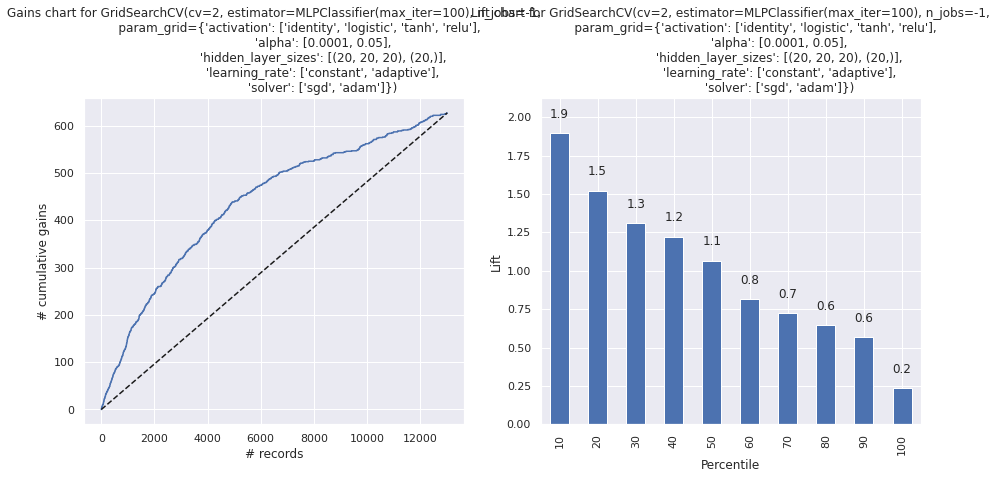

In [98]:
#develop the lift and gain charts 
nn_df = test_nn_results.sort_values(by=['p(1)'],
                                    ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(nn_df.actual, ax=axes[0])
liftChart(nn_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {NN_tune}')
axes[1].set_title(f'Lift chart for {NN_tune}')
plt.show()

#### *K*-nearest neighbors (KNN) Models {-}

In [99]:
#reassign knn pick filepath varialbes to knn_final models
knn_final_1 = knn_mod_v1_fit
knn_final_2 = knn_mod_v2_fit
knn_final_3 = knn_mod_v3_fit
knn_final_4 = knn_mod_v4_fit

##### KNN Model 1 {-}

In [100]:
#predictions for the training data and test data
knn_train_pred = knn_final_1.predict(train_x03_tx_df03)
knn_test_pred = knn_final_1.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
knn_train_prob = knn_final_1.predict_proba(train_x03_tx_df03)
knn_test_prob = knn_final_1.predict_proba(test_x03_tx_df03)

In [101]:
#confusion matrix for KNN_1training
print("Confusion Matrix for KNN_1 Training")
classificationSummary(train_y01_vc01_eda1,
                      knn_train_pred,
                      class_names=class_names)

Confusion Matrix for KNN_1 Training
Confusion Matrix (Accuracy 0.9518)

              Prediction
       Actual going_concern      bankrupt
going_concern         28700            12
     bankrupt          1442            20


In [102]:
#classifiation report for KNN_1 training
print("Classification Report for KNN_1 Training")
print(classification_report(train_y01_vc01_eda1,
                            knn_train_pred,
                            target_names=class_names))

Classification Report for KNN_1 Training
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.98     28712
     bankrupt       0.62      0.01      0.03      1462

     accuracy                           0.95     30174
    macro avg       0.79      0.51      0.50     30174
 weighted avg       0.94      0.95      0.93     30174



In [103]:
#confusion matrix for KNN_1 test 
print("Confusion Matrix for KNN_1 Test")
classificationSummary(test_y01_vc01,
                      knn_test_pred,
                      class_names=class_names)

Confusion Matrix for KNN_1 Test
Confusion Matrix (Accuracy 0.9515)

              Prediction
       Actual going_concern      bankrupt
going_concern         12389             6
     bankrupt           626             1


In [104]:
#classifiation report for KNN_1 test
print("Classification Report for KNN_1 Test")
print(classification_report(test_y01_vc01,
                            knn_test_pred,
                            target_names=class_names))

Classification Report for KNN_1 Test
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.98     12395
     bankrupt       0.14      0.00      0.00       627

     accuracy                           0.95     13022
    macro avg       0.55      0.50      0.49     13022
 weighted avg       0.91      0.95      0.93     13022



##### KNN Model 2 {-}

In [105]:
#predictions for the training data and test data
knn_train_pred2 = knn_final_2.predict(train_x03_tx_df03a)
knn_test_pred2 = knn_final_2.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
knn_train_prob2 = knn_final_2.predict_proba(train_x03_tx_df03a)
knn_test_prob2 = knn_final_2.predict_proba(test_x03_tx_df03)

In [106]:
#confusion matrix for KNN_2 training
print("Confusion Matrix for KNN_2 Training")
classificationSummary(train_y01_vc01_eda1a,
                      knn_train_pred2,
                      class_names=class_names)

Confusion Matrix for KNN_2 Training
Confusion Matrix (Accuracy 1.0000)

              Prediction
       Actual going_concern      bankrupt
going_concern         28712             0
     bankrupt             0         28712


In [107]:
#classifiation report for KNN_2 training
print("Classification Report for KNN_2 Training")
print(classification_report(train_y01_vc01_eda1a,
                            knn_train_pred2,
                            target_names=class_names))

Classification Report for KNN_2 Training
               precision    recall  f1-score   support

going_concern       1.00      1.00      1.00     28712
     bankrupt       1.00      1.00      1.00     28712

     accuracy                           1.00     57424
    macro avg       1.00      1.00      1.00     57424
 weighted avg       1.00      1.00      1.00     57424



In [108]:
#confusion matrix for KNN_2 test 
print("Confusion Matrix for KNN_2 Test")
classificationSummary(test_y01_vc01,
                      knn_test_pred2,
                      class_names=class_names)

Confusion Matrix for KNN_2 Test
Confusion Matrix (Accuracy 0.8656)

              Prediction
       Actual going_concern      bankrupt
going_concern         11085          1310
     bankrupt           440           187


In [109]:
#classifiation report for KNN_2 test
print("Classification Report for KNN_2 Test")
print(classification_report(test_y01_vc01,
                            knn_test_pred2,
                            target_names=class_names))

Classification Report for KNN_2 Test
               precision    recall  f1-score   support

going_concern       0.96      0.89      0.93     12395
     bankrupt       0.12      0.30      0.18       627

     accuracy                           0.87     13022
    macro avg       0.54      0.60      0.55     13022
 weighted avg       0.92      0.87      0.89     13022



In [110]:
#create the results dataframe for the full predictor set probability values 
test_knn2_results = pd.DataFrame({'actual': test_y01_vc01,
                                  'p(0)': [p[0] for p in knn_test_prob2],
                                  'p(1)': [p[1] for p in knn_test_prob2],
                                  'predicted': knn_test_pred2})
test_knn2_results = test_knn2_results.sort_values(by=['p(1)'],ascending=False)
#test_knn3_results.head()

###### Lift and Gains charts {-}

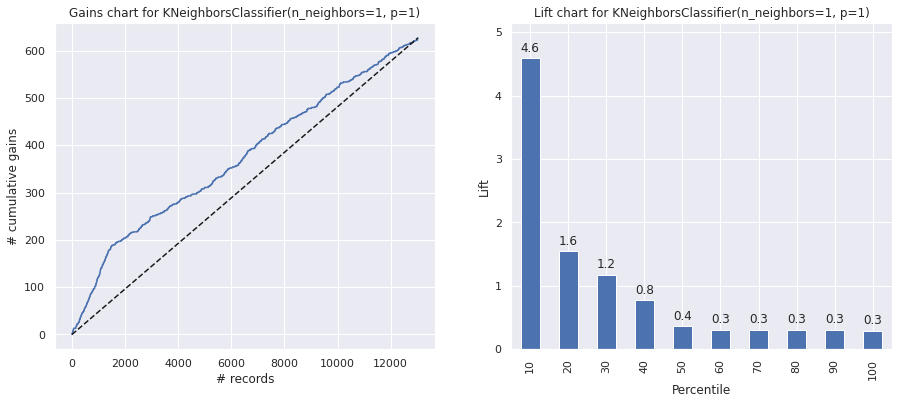

In [111]:
#develop the lift and gain charts for the decision tree classifier
knn_df_2 = test_knn2_results.sort_values(by=['p(1)'],
                                         ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(knn_df_2.actual, ax=axes[0])
liftChart(rf_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {knn_final_2}')
axes[1].set_title(f'Lift chart for {knn_final_2}')
plt.show()

##### KNN Model 3 {-}

In [112]:
#predictions for the training data and test data
knn_train_pred3 = knn_final_3.predict(train_x03_tx_df05)
knn_test_pred3 = knn_final_3.predict(test_x03_tx_df05)

#return the predicted probabilites into a single variable for training and test
knn_train_prob3 = knn_final_3.predict_proba(train_x03_tx_df05)
knn_test_prob3 = knn_final_3.predict_proba(test_x03_tx_df05)

In [113]:
#confusion matrix for KNN_3 training
print("Confusion Matrix for KNN_3 Training")
classificationSummary(train_y01_vc01_eda1,
                      knn_train_pred3,
                      class_names=class_names)

Confusion Matrix for KNN_3 Training
Confusion Matrix (Accuracy 0.9518)

              Prediction
       Actual going_concern      bankrupt
going_concern         28706             6
     bankrupt          1449            13


In [114]:
#classifiation report for KNN_3 training
print("Classification Report for KNN_3 Training")
print(classification_report(train_y01_vc01_eda1,
                            knn_train_pred3,
                            target_names=class_names))

Classification Report for KNN_3 Training
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.98     28712
     bankrupt       0.68      0.01      0.02      1462

     accuracy                           0.95     30174
    macro avg       0.82      0.50      0.50     30174
 weighted avg       0.94      0.95      0.93     30174



In [115]:
#confusion matrix for KNN_3 test 
print("Confusion Matrix for KNN_3 Test")
classificationSummary(test_y01_vc01,
                      knn_test_pred3,
                      class_names=class_names)

Confusion Matrix for KNN_3 Test
Confusion Matrix (Accuracy 0.9519)

              Prediction
       Actual going_concern      bankrupt
going_concern         12392             3
     bankrupt           623             4


In [116]:
#classifiation report for KNN_3 test
print("Classification Report for KNN_3 Test")
print(classification_report(test_y01_vc01,
                            knn_test_pred3,
                            target_names=class_names))

Classification Report for KNN_3 Test
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.98     12395
     bankrupt       0.57      0.01      0.01       627

     accuracy                           0.95     13022
    macro avg       0.76      0.50      0.49     13022
 weighted avg       0.93      0.95      0.93     13022



##### KNN Model 4 {-}

In [117]:
#predictions for the training data and test data
knn_train_pred4 = knn_final_4.predict(train_x03_tx_df05a)
knn_test_pred4 = knn_final_4.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
knn_train_prob4 = knn_final_4.predict_proba(train_x03_tx_df05a)
knn_test_prob4 = knn_final_4.predict_proba(test_x03_tx_df03)

In [118]:
#confusion matrix for KNN_4 training
print("Confusion Matrix for KNN_4 Training")
classificationSummary(train_y01_vc01_eda1c,
                      knn_train_pred4,
                      class_names=class_names)

Confusion Matrix for KNN_4 Training
Confusion Matrix (Accuracy 1.0000)

              Prediction
       Actual going_concern      bankrupt
going_concern         28712             0
     bankrupt             0         28712


In [119]:
#classifiation report for KNN_4 training
print("Classification Report for KNN_4 Training")
print(classification_report(train_y01_vc01_eda1c,
                            knn_train_pred4,
                            target_names=class_names))

Classification Report for KNN_4 Training
               precision    recall  f1-score   support

going_concern       1.00      1.00      1.00     28712
     bankrupt       1.00      1.00      1.00     28712

     accuracy                           1.00     57424
    macro avg       1.00      1.00      1.00     57424
 weighted avg       1.00      1.00      1.00     57424



In [120]:
#confusion matrix for KNN_4 test 
print("Confusion Matrix for KNN_4 Test")
classificationSummary(test_y01_vc01,
                      knn_test_pred4,
                      class_names=class_names)

Confusion Matrix for KNN_4 Test
Confusion Matrix (Accuracy 0.9371)

              Prediction
       Actual going_concern      bankrupt
going_concern         12195           200
     bankrupt           619             8


In [121]:
#classifiation report for KNN_4 test
print("Classification Report for KNN_4 Test")
print(classification_report(test_y01_vc01,
                            knn_test_pred4,
                            target_names=class_names))

Classification Report for KNN_4 Test
               precision    recall  f1-score   support

going_concern       0.95      0.98      0.97     12395
     bankrupt       0.04      0.01      0.02       627

     accuracy                           0.94     13022
    macro avg       0.50      0.50      0.49     13022
 weighted avg       0.91      0.94      0.92     13022



#### Linear Discriminant Analysis (LDA) Models {-}

In [122]:
lda_final_1 = lda_mod_v1_fit
lda_final_2 = lda_mod_v2_fit
lda_final_3 = lda_mod_v3_fit
lda_final_4 = lda_mod_v4_fit

##### LDA Model 1 {-}

In [123]:
#predictions for the training data and test data
lda_train_pred1 = lda_final_1.predict(train_x03_tx_df03)
lda_test_pred1 = lda_final_1.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
lda_train_prob1 = lda_final_1.predict_proba(train_x03_tx_df03)
lda_test_prob1 = lda_final_1.predict_proba(test_x03_tx_df03)

In [124]:
#confusion matrix for LDA_1training
print("Confusion Matrix for LDA_1 Training")
classificationSummary(train_y01_vc01_eda1,
                      lda_final_1.predict(train_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for LDA_1 Training
Confusion Matrix (Accuracy 0.9513)

              Prediction
       Actual going_concern      bankrupt
going_concern         28699            13
     bankrupt          1455             7


In [125]:
#classifiation report for LDA_1 training
print("Classification Report for LDA_1 Training")
print(classification_report(train_y01_vc01_eda1,
                            lda_train_pred1,
                            target_names=class_names))

Classification Report for LDA_1 Training
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.98     28712
     bankrupt       0.35      0.00      0.01      1462

     accuracy                           0.95     30174
    macro avg       0.65      0.50      0.49     30174
 weighted avg       0.92      0.95      0.93     30174



In [126]:
#confusion matrix for LDA_1 test 
print("Confusion Matrix for LDA_1 Test")
classificationSummary(test_y01_vc01,
                      lda_final_1.predict(test_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for LDA_1 Test
Confusion Matrix (Accuracy 0.9517)

              Prediction
       Actual going_concern      bankrupt
going_concern         12391             4
     bankrupt           625             2


In [127]:
#classifiation report for LDA_1 test
print("Classification Report for LDA_1 Test")
print(classification_report(test_y01_vc01,
                            lda_test_pred1,
                            target_names=class_names))

Classification Report for LDA_1 Test
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.98     12395
     bankrupt       0.33      0.00      0.01       627

     accuracy                           0.95     13022
    macro avg       0.64      0.50      0.49     13022
 weighted avg       0.92      0.95      0.93     13022



In [128]:
#Model performance on the test set
classificationSummary(test_y01_vc01,
                      lda_final_1.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {lda_final_1}:')
print(f'Recall = {recall_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03))}')

Confusion Matrix (Accuracy 0.9517)

              Prediction
       Actual going_concern      bankrupt
going_concern         12391             4
     bankrupt           625             2

Additional Eval Measures for LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr', store_covariance=True):
Recall = 0.003189792663476874
Precision = 0.3333333333333333
F1 = 0.00631911532385466


##### LDA Model 2 {-}

In [129]:
#predictions for the training data and test data
lda_train_pred2 = lda_final_2.predict(train_x03_tx_df03a)
lda_test_pred2 = lda_final_2.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
lda_train_prob2 = lda_final_2.predict_proba(train_x03_tx_df03a)
lda_test_prob2 = lda_final_2.predict_proba(test_x03_tx_df03)

In [130]:
#confusion matrix for LDA_2 training
print("Confusion Matrix for LDA_2 Training")
classificationSummary(train_y01_vc01_eda1a,
                      lda_final_2.predict(train_x03_tx_df03a),
                      class_names=class_names)

Confusion Matrix for LDA_2 Training
Confusion Matrix (Accuracy 0.5703)

              Prediction
       Actual going_concern      bankrupt
going_concern         16581         12131
     bankrupt         12544         16168


In [131]:
#classifiation report for LDA_2 training
print("Classification Report for LDA_2 Training")
print(classification_report(train_y01_vc01_eda1a,
                            lda_train_pred2,
                            target_names=class_names))

Classification Report for LDA_2 Training
               precision    recall  f1-score   support

going_concern       0.57      0.58      0.57     28712
     bankrupt       0.57      0.56      0.57     28712

     accuracy                           0.57     57424
    macro avg       0.57      0.57      0.57     57424
 weighted avg       0.57      0.57      0.57     57424



In [132]:
#confusion matrix for LDA_2 test 
print("Confusion Matrix for LDA_2 Test")
classificationSummary(test_y01_vc01,
                      lda_final_2.predict(test_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for LDA_2 Test
Confusion Matrix (Accuracy 0.5819)

              Prediction
       Actual going_concern      bankrupt
going_concern          7223          5172
     bankrupt           272           355


In [133]:
#classifiation report for LDA_2 test
print("Classification Report for LDA_2 Test")
print(classification_report(test_y01_vc01,
                            lda_test_pred2,
                            target_names=class_names))

Classification Report for LDA_2 Test
               precision    recall  f1-score   support

going_concern       0.96      0.58      0.73     12395
     bankrupt       0.06      0.57      0.12       627

     accuracy                           0.58     13022
    macro avg       0.51      0.57      0.42     13022
 weighted avg       0.92      0.58      0.70     13022



In [134]:
#Model performance on the test set
classificationSummary(test_y01_vc01,
                      lda_final_2.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {lda_final_2}:')
print(f'Recall = {recall_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03))}')

Confusion Matrix (Accuracy 0.5819)

              Prediction
       Actual going_concern      bankrupt
going_concern          7223          5172
     bankrupt           272           355

Additional Eval Measures for LinearDiscriminantAnalysis(store_covariance=True):
Recall = 0.5661881977671451
Precision = 0.06423014293468428
F1 = 0.11537211569710756


In [135]:
#create the results dataframe for the full predictor set probability values 
test_lda2_results = pd.DataFrame({'actual': test_y01_vc01,
                                  'p(0)': [p[0] for p in lda_test_prob2],
                                  'p(1)': [p[1] for p in lda_test_prob2],
                                  'predicted': lda_test_pred2})

test_lda2_results = test_lda2_results.sort_values(by=['p(1)'],
                                                  ascending=False)
test_lda2_results.head()

,actual,p(0),p(1),predicted
8158,1,4.440892e-16,1.000000,1
2134,0,3.344583e-03,0.996655,1
1252,0,1.534000e-02,0.984660,1
711,0,2.123494e-02,0.978765,1
194,0,6.474752e-02,0.935252,1


###### Lift and Gains charts {-}

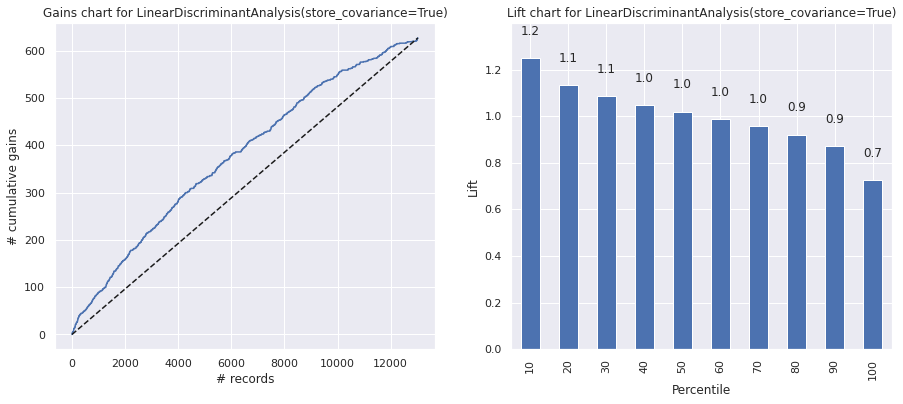

In [136]:
#develop the lift and gain charts for the decision tree classifier
lda2_df = test_lda2_results.sort_values(by=['p(1)'],
                                        ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
gainsChart(lda2_df.actual, ax=axes[0])
liftChart(lda2_df['p(1)'], title=False, ax=axes[1])
axes[0].set_title(f'Gains chart for {lda_final_2}')
axes[1].set_title(f'Lift chart for {lda_final_2}')
plt.show()

##### LDA Model 3 {-}

In [137]:
#predictions for the training data and test data
lda_train_pred3 = lda_final_3.predict(train_x03_tx_df05)
lda_test_pred3 = lda_final_3.predict(test_x03_tx_df05)

#return the predicted probabilites into a single variable for training and test
lda_train_prob3 = lda_final_3.predict_proba(train_x03_tx_df05)
lda_test_prob3 = lda_final_3.predict_proba(test_x03_tx_df05)

In [138]:
#confusion matrix for LDA_3 training
print("Confusion Matrix for LDA_3 Training")
classificationSummary(train_y01_vc01_eda1,
                      lda_final_3.predict(train_x03_tx_df05),
                      class_names=class_names)

Confusion Matrix for LDA_3 Training
Confusion Matrix (Accuracy 0.9503)

              Prediction
       Actual going_concern      bankrupt
going_concern         28650            62
     bankrupt          1439            23


In [139]:
#classifiation report for LDA_3 training
print("Classification Report for LDA_3 Training")
print(classification_report(train_y01_vc01_eda1,
                            lda_train_pred3,
                            target_names=class_names))

Classification Report for LDA_3 Training
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.97     28712
     bankrupt       0.27      0.02      0.03      1462

     accuracy                           0.95     30174
    macro avg       0.61      0.51      0.50     30174
 weighted avg       0.92      0.95      0.93     30174



In [140]:
#confusion matrix for LDA_3 test 
print("Confusion Matrix for LDA_3 Test")
classificationSummary(test_y01_vc01,
                      lda_final_3.predict(test_x03_tx_df05),
                      class_names=class_names)

Confusion Matrix for LDA_3 Test
Confusion Matrix (Accuracy 0.9503)

              Prediction
       Actual going_concern      bankrupt
going_concern         12364            31
     bankrupt           616            11


In [141]:
#classifiation report for LDA_3 test
print("Classification Report for LDA_3 Test")
print(classification_report(test_y01_vc01,
                            lda_test_pred3,
                            target_names=class_names))

Classification Report for LDA_3 Test
               precision    recall  f1-score   support

going_concern       0.95      1.00      0.97     12395
     bankrupt       0.26      0.02      0.03       627

     accuracy                           0.95     13022
    macro avg       0.61      0.51      0.50     13022
 weighted avg       0.92      0.95      0.93     13022



In [142]:
#Model performance on the test set
classificationSummary(test_y01_vc01,
                      lda_final_3.predict(test_x03_tx_df05),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {lda_final_3}:')
print(f'Recall = {recall_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05))}')
print(f'Precision = {precision_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05))}')
print(f'F1 = {f1_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05))}')

Confusion Matrix (Accuracy 0.9503)

              Prediction
       Actual going_concern      bankrupt
going_concern         12364            31
     bankrupt           616            11

Additional Eval Measures for LinearDiscriminantAnalysis(shrinkage=0.1, solver='lsqr', store_covariance=True):
Recall = 0.017543859649122806
Precision = 0.2619047619047619
F1 = 0.032884902840059786


##### LDA Model 4 {-}

In [143]:
#predictions for the training data and test data
lda_train_pred4 = lda_final_4.predict(train_x03_tx_df05a)
lda_test_pred4 = lda_final_4.predict(test_x03_tx_df03)

#return the predicted probabilites into a single variable for training and test
lda_train_prob4 = lda_final_4.predict_proba(train_x03_tx_df05a)
lda_test_prob4 = lda_final_4.predict_proba(test_x03_tx_df03)

In [144]:
#confusion matrix for LDA_4 training
print("Confusion Matrix for LDA_4 Training")
classificationSummary(train_y01_vc01_eda1c,
                      lda_final_4.predict(train_x03_tx_df05a),
                      class_names=class_names)

Confusion Matrix for LDA_4 Training
Confusion Matrix (Accuracy 0.6715)

              Prediction
       Actual going_concern      bankrupt
going_concern         19346          9366
     bankrupt          9499         19213


In [145]:
#classifiation report for LDA_4 training
print("Classification Report for LDA_4 Training")
print(classification_report(train_y01_vc01_eda1c,
                            lda_train_pred4,
                            target_names=class_names))

Classification Report for LDA_4 Training
               precision    recall  f1-score   support

going_concern       0.67      0.67      0.67     28712
     bankrupt       0.67      0.67      0.67     28712

     accuracy                           0.67     57424
    macro avg       0.67      0.67      0.67     57424
 weighted avg       0.67      0.67      0.67     57424



In [146]:
#confusion matrix for LDA_4 test 
print("Confusion Matrix for LDA_4 Test")
classificationSummary(test_y01_vc01,
                      lda_final_4.predict(test_x03_tx_df03),
                      class_names=class_names)

Confusion Matrix for LDA_4 Test
Confusion Matrix (Accuracy 0.8633)

              Prediction
       Actual going_concern      bankrupt
going_concern         11102          1293
     bankrupt           487           140


In [147]:
#classifiation report for LDA_4 test
print("Classification Report for LDA_4 Test")
print(classification_report(test_y01_vc01,
                            lda_test_pred4,
                            target_names=class_names))

Classification Report for LDA_4 Test
               precision    recall  f1-score   support

going_concern       0.96      0.90      0.93     12395
     bankrupt       0.10      0.22      0.14       627

     accuracy                           0.86     13022
    macro avg       0.53      0.56      0.53     13022
 weighted avg       0.92      0.86      0.89     13022



In [148]:
#Model performance on the test set
classificationSummary(test_y01_vc01,
                      lda_final_4.predict(test_x03_tx_df03),
                      class_names=class_names)
print(f'\nAdditional Eval Measures for {lda_final_4}:')
print(f'Recall = {recall_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03))}')
print(f'Precision = {precision_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03))}')
print(f'F1 = {f1_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03))}')

Confusion Matrix (Accuracy 0.8633)

              Prediction
       Actual going_concern      bankrupt
going_concern         11102          1293
     bankrupt           487           140

Additional Eval Measures for LinearDiscriminantAnalysis(store_covariance=True):
Recall = 0.22328548644338117
Precision = 0.09769713886950454
F1 = 0.13592233009708737


### Final Evaluations {-}

#### Results table {-}

In [149]:
#Create table of accuracy comparision between models
comp = [['boost_1',
         accuracy_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02)),
         precision_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02)),
         recall_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02)),
         f1_score(test_y01_vc01, boost_1.predict(test_x03_tx_df02))
         ],
        ['boost_2',
         accuracy_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02)),
         precision_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02)),
         recall_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02)),
         f1_score(test_y01_vc01, boost_2.predict(test_x03_tx_df02))
         ],
        ['boost_3',
         accuracy_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02)),
         precision_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02)),
         recall_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02)),
         f1_score(test_y01_vc01, boost_3.predict(test_x03_tx_df02))
         ],
        ['boost_4',
         accuracy_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, boost_4.predict(test_x03_tx_df03))
         ],
        ['xgboost_1',
         accuracy_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02)),
         precision_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02)),
         recall_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02)),
         f1_score(test_y01_vc01, xgboost_1.predict(test_x03_tx_df02))
         ],
        ['xgboost_2',
         accuracy_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, xgboost_2.predict(test_x03_tx_df03))
         ],
        ['NN_tune',
         accuracy_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02)),
         precision_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02)),
         recall_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02)),
         f1_score(test_y01_vc01, NN_tune.predict(test_x03_tx_df02))
         ],
        ['dec_tree',
         accuracy_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, clf_final.predict(test_x03_tx_df03))
         ],
        ['rand_for',
         accuracy_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, rf_final.predict(test_x03_tx_df03))
         ],
        ['knn_1',
         accuracy_score(test_y01_vc01, knn_final_1.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, knn_final_1.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, knn_final_1.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, knn_final_1.predict(test_x03_tx_df03))
         ],
        ['knn_2',
         accuracy_score(test_y01_vc01, knn_final_2.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, knn_final_2.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, knn_final_2.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, knn_final_2.predict(test_x03_tx_df03))
         ],
        ['knn_3',
         accuracy_score(test_y01_vc01, knn_final_3.predict(test_x03_tx_df05)),
         precision_score(test_y01_vc01, knn_final_3.predict(test_x03_tx_df05)),
         recall_score(test_y01_vc01, knn_final_3.predict(test_x03_tx_df05)),
         f1_score(test_y01_vc01, knn_final_3.predict(test_x03_tx_df05))
         ],
        ['knn_4',
         accuracy_score(test_y01_vc01, knn_final_4.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, knn_final_4.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, knn_final_4.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, knn_final_4.predict(test_x03_tx_df03))
         ],
        ['lda_1',
         accuracy_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, lda_final_1.predict(test_x03_tx_df03))
         ],
        ['lda_2',
         accuracy_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, lda_final_2.predict(test_x03_tx_df03))
         ],
        ['lda_3',
         accuracy_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05)),
         precision_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05)),
         recall_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05)),
         f1_score(test_y01_vc01, lda_final_3.predict(test_x03_tx_df05))
         ],
        ['lda_4',
         accuracy_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03)),
         precision_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03)),
         recall_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03)),
         f1_score(test_y01_vc01, lda_final_4.predict(test_x03_tx_df03))]
        ]

col_names= ['Accuracy', 'Precision', 'Recall', 'F1_score']
print ('Comparsion between model evaluation measures using test set')
print(tabulate(comp, headers= col_names, tablefmt="fancy_grid"))

Comparsion between model evaluation measures using test set
╒═══════════╤════════════╤═════════════╤════════════╤════════════╕
│           │   Accuracy │   Precision │     Recall │   F1_score │
╞═══════════╪════════════╪═════════════╪════════════╪════════════╡
│ boost_1   │   0.920135 │   0.298537  │ 0.488038   │ 0.37046    │
├───────────┼────────────┼─────────────┼────────────┼────────────┤
│ boost_2   │   0.876363 │   0.206567  │ 0.551834   │ 0.300608   │
├───────────┼────────────┼─────────────┼────────────┼────────────┤
│ boost_3   │   0.822685 │   0.171997  │ 0.703349   │ 0.276402   │
├───────────┼────────────┼─────────────┼────────────┼────────────┤
│ boost_4   │   0.299493 │   0.0605277 │ 0.933014   │ 0.113681   │
├───────────┼────────────┼─────────────┼────────────┼────────────┤
│ xgboost_1 │   0.818691 │   0.172088  │ 0.725678   │ 0.278202   │
├───────────┼────────────┼─────────────┼────────────┼────────────┤
│ xgboost_2 │   0.230303 │   0.0580433 │ 0.984051   │ 0.109621   │
├─

#### Consolidate Lift and Gains charts {-}

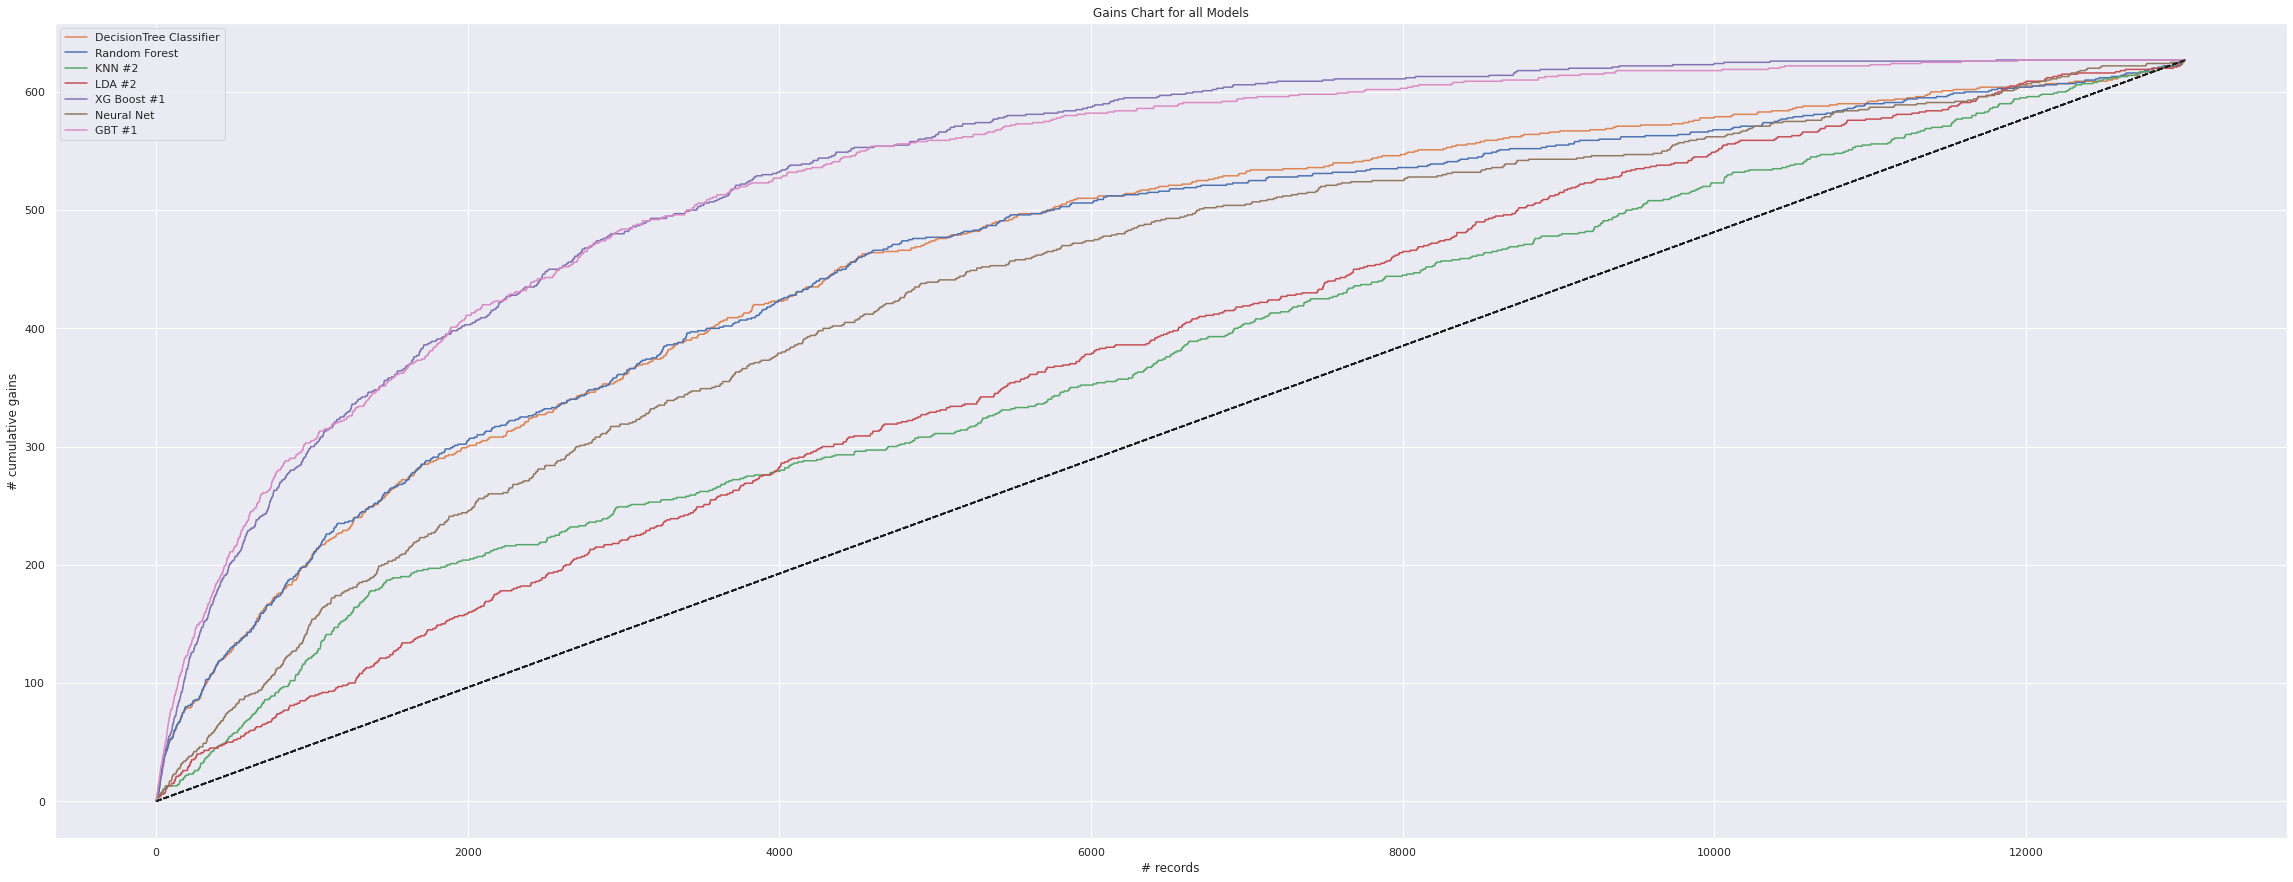

In [150]:
#develop the gains charts for each of the final models (for multiple models,--
#--the best performing model was chosen)
ax = gainsChart(clf_df.actual, color='C1', label='DecisionTree Classifier')
ax = gainsChart(rf_df.actual, color='C0', label='Random Forest', ax=ax)
ax = gainsChart(knn_df_2.actual, color='C2',label='KNN #2', ax=ax)
ax = gainsChart(lda2_df.actual, color='C3', label='LDA #2', ax=ax)
ax = gainsChart(xgb_df.actual, color='C4', label='XG Boost #1', ax=ax)
ax = gainsChart(nn_df.actual, color='C5', label='Neural Net', ax=ax)
ax = gainsChart(gbt_df.actual, color='C6', label='GBT #1', ax=ax)

plt.title("Gains Chart for all Models")
ax.legend()
plt.show()

## 6. Recommendation and Conclusion {-}

### Final Model {-}

Based on peformance measures, including recall, precision, and their harmonic mean ($F_1$-score), as well as results seen on the combined Gains Chart, gradient boost model 1 (GBT $M_1$) was chosen as the final model. \
GBT $M_1$ did not have either the highest accuracy (92.0%), precision (29.9%), or recall (48.8%); however, because both precision and recall were relatively mid-range, the GBT $M_1$ $F_1$ (37.0%) was the highest by a significant margin--two of the three closest where also boosted tree algortithms, GBT $M_2$ (30.1%), XGBoost $M_1$ (27.8%), and GBT $M_3$ (27.6%). \
Accordingly GBT $M_1$ is used below as the basis for developing a business-oriented risk-level prediction structure.

In [151]:
#gbt_df = xgb_df
display(gbt_df.head())
print(gbt_df.shape)

,actual,p(0),p(1),predicted,cum_gains
6739,1,0.004984,0.995016,1,1
9096,1,0.012047,0.987953,1,2
366,1,0.019239,0.980761,1,3
2907,1,0.019930,0.980070,1,4
2548,1,0.021847,0.978153,1,5


(13022, 5)


#### Establish risk levels based on prediction probability ranges {-}

In [152]:
risk_level_1 = '1. Low Risk: Basic Review'
risk_level_2 = '2. Low Risk: Additional Review'
risk_level_3 = '3. Moderate Risk: Senior analyst review'
risk_level_4 = '4. Moderate Risk: Senior analyst review + management signoff'
risk_level_5 = '5. High Risk: Senior analyst review + CFO signoff'

#create logic to assess risk to each prediction
gbt_df['risk_level'] = np.where(gbt_df['p(1)'] >= .90, risk_level_5,
                       np.where(gbt_df['p(1)'] >= .75, risk_level_4,
                       np.where(gbt_df['p(1)'] >= .60, risk_level_3, 
                       np.where(gbt_df['p(1)'] >= .16, risk_level_2, 
                                                               risk_level_1))))
display(gbt_df.head())
print(gbt_df.shape)

,actual,p(0),p(1),predicted,cum_gains,risk_level
6739,1,0.004984,0.995016,1,1,5. High Risk: Senior analyst review + CFO signoff
9096,1,0.012047,0.987953,1,2,5. High Risk: Senior analyst review + CFO signoff
366,1,0.019239,0.980761,1,3,5. High Risk: Senior analyst review + CFO signoff
2907,1,0.019930,0.980070,1,4,5. High Risk: Senior analyst review + CFO signoff
2548,1,0.021847,0.978153,1,5,5. High Risk: Senior analyst review + CFO signoff


(13022, 6)


In [153]:
risk_level_cnt = gbt_df.groupby(['risk_level'], sort=False).count()
risk_level_cnt.iloc[:,3]

risk_level
5. High Risk: Senior analyst review + CFO signoff                 56
4. Moderate Risk: Senior analyst review + management signoff     254
3. Moderate Risk: Senior analyst review                          363
2. Low Risk: Additional Review                                  3264
1. Low Risk: Basic Review                                       9085
Name: predicted, dtype: int64

In [154]:
gbt_df['risk_probabilities'] = np.where(gbt_df['risk_level'] == 
                                                    risk_level_5, '.90 - 1.00',
                               np.where(gbt_df['risk_level'] == 
                                                    risk_level_4, '.75 - .899',
                               np.where(gbt_df['risk_level'] == 
                                                    risk_level_3, '.60 - .749',
                               np.where(gbt_df['risk_level'] == 
                                  risk_level_2, '.16 - .599', '0.00 - 0.159'))))
#gbt_df = gbt_df.join(key_ratio)
display(gbt_df.head())
print(gbt_df.shape)

,actual,p(0),p(1),predicted,cum_gains,risk_level,risk_probabilities
6739,1,0.004984,0.995016,1,1,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00
9096,1,0.012047,0.987953,1,2,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00
366,1,0.019239,0.980761,1,3,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00
2907,1,0.019930,0.980070,1,4,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00
2548,1,0.021847,0.978153,1,5,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00


(13022, 7)


In [155]:
gbt_df03 = gbt_df.join(key_ratio)
#gbt_df03 = gbt_df03.sort_values(by = ['p(1)'], ascending = False)
#gbt_df03 = test_gbt_results.sort_values(by=['p(1)'],
#                                      ascending=False)
display(gbt_df03.head())
print(gbt_df03.shape)

,actual,p(0),p(1),predicted,cum_gains,risk_level,risk_probabilities,tot_liab_to_tot_assets_ratio,curr_assets_to_tot_liab_ratio,work_cap_to_tot_assets_ratio
0,0,0.989545,0.010455,0,625,1. Low Risk: Basic Review,0.00 - 0.159,0.37951,2.0420,0.39641
0,0,0.989545,0.010455,0,625,1. Low Risk: Basic Review,0.00 - 0.159,0.46500,1.5167,0.24038
0,0,0.989545,0.010455,0,625,1. Low Risk: Basic Review,0.00 - 0.159,0.41299,1.3480,0.14371
0,0,0.989545,0.010455,0,625,1. Low Risk: Basic Review,0.00 - 0.159,0.46240,1.1669,0.07773
0,0,0.989545,0.010455,0,625,1. Low Risk: Basic Review,0.00 - 0.159,0.55472,1.0193,0.01134


(45924, 10)


In [156]:
gbt_df03 = gbt_df03.sort_values(by = ['p(1)'], ascending = False)
display(gbt_df03.head())
print(gbt_df03.shape)

,actual,p(0),p(1),predicted,cum_gains,risk_level,risk_probabilities,tot_liab_to_tot_assets_ratio,curr_assets_to_tot_liab_ratio,work_cap_to_tot_assets_ratio
6739,1,0.004984,0.995016,1,1,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00,0.75314,0.76494,-0.015497
6739,1,0.004984,0.995016,1,1,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00,0.57898,0.76051,-0.095395
6739,1,0.004984,0.995016,1,1,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00,0.17752,3.03290,0.436620
6739,1,0.004984,0.995016,1,1,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00,0.81499,0.36020,-0.163050
9096,1,0.012047,0.987953,1,2,5. High Risk: Senior analyst review + CFO signoff,.90 - 1.00,0.16195,3.73300,0.450280


(45924, 10)


In [157]:
tot_liab_to_assets = gbt_df03.groupby('risk_level')[
                                     'tot_liab_to_tot_assets_ratio'].median()
tot_liab_to_assets

risk_level
1. Low Risk: Basic Review                                       0.471240
2. Low Risk: Additional Review                                  0.472275
3. Moderate Risk: Senior analyst review                         0.480830
4. Moderate Risk: Senior analyst review + management signoff    0.469690
5. High Risk: Senior analyst review + CFO signoff               0.507420
Name: tot_liab_to_tot_assets_ratio, dtype: float64

In [158]:
curr_assets_total_lia = gbt_df03.groupby('risk_level')[
                                       'work_cap_to_tot_assets_ratio'].median()
curr_assets_total_lia

risk_level
1. Low Risk: Basic Review                                       0.198105
2. Low Risk: Additional Review                                  0.194210
3. Moderate Risk: Senior analyst review                         0.188220
4. Moderate Risk: Senior analyst review + management signoff    0.195055
5. High Risk: Senior analyst review + CFO signoff               0.201740
Name: work_cap_to_tot_assets_ratio, dtype: float64

#### Graph Risk Levels 2-5 by Actual {-}

(13022, 7)
actual                                                1     0
risk_level                                                   
2. Low Risk: Additional Review                      265  2999
3. Moderate Risk: Senior analyst review             100   263
4. Moderate Risk: Senior analyst review + manag...  112   142
5. High Risk: Senior analyst review + CFO signoff    47     9
predicted                                              0    1
risk_level                                                   
2. Low Risk: Additional Review                      2912  352
3. Moderate Risk: Senior analyst review                0  363
4. Moderate Risk: Senior analyst review + manag...     0  254
5. High Risk: Senior analyst review + CFO signoff      0   56


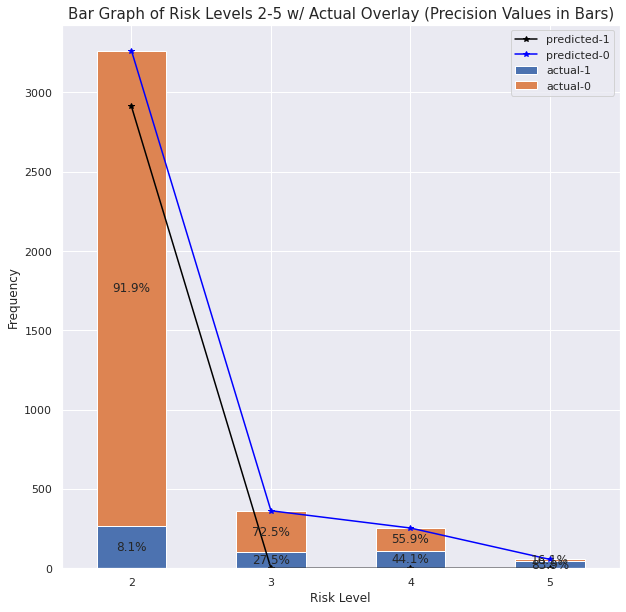

In [159]:
# Create cross-tab report & plot as bar graph
gbt_bar_df = gbt_df.sort_values(by='risk_level',
                                ascending=True)
print(gbt_bar_df.shape)
gbt_bar_ct = pd.crosstab(gbt_bar_df['risk_level'],
                         gbt_bar_df['actual'])
gbt_bar_ct = gbt_bar_ct.drop(risk_level_1)
gbt_bar_ct = gbt_bar_ct[[1, 0]]
gbt_bar_ct02 = gbt_bar_ct.div(gbt_bar_ct.sum(1),
                              axis=0)
gbt_bar_ct03 = pd.crosstab(gbt_bar_df['risk_level'],
                           gbt_bar_df['predicted'])
gbt_bar_ct03 = gbt_bar_ct03.drop(risk_level_1)
#gbt_bar_ct03 = gbt_bar_ct03[[1, 0]]
print(gbt_bar_ct)
print(gbt_bar_ct03)

ax10 = gbt_bar_ct.plot(kind='bar',
                     stacked=True,
                     figsize=(10, 10))
gbt_bar_ct03.plot(kind='line',
                  stacked=True,
                  ax=ax10,
                  marker='*',
                  color=['black', 'blue'])

# Label stacked bars
height_lst01 = []
for b in ax10.patches:
  height_lst01.append(b.get_height())

bar_len = int(len(height_lst01) / 2)
height_lst01a = height_lst01[:bar_len]
height_lst01b = height_lst01[bar_len:]
counter = 0

# Label individual bars (Kumar, 2021)
for b in ax10.patches:
    bar_h = b.get_height()
    bar_w = b.get_width()
    bar_x = b.get_x()
    bar_y = b.get_y()
    label_text = str(round((bar_h / (height_lst01a[counter] \
                                     + height_lst01b[counter]))*100, 1)) + '%'
    label_x = bar_x + bar_w / 2
    label_y = bar_y + bar_h / 2
    ax10.text(label_x,
            label_y,
            label_text,
            ha='center',    
            va='center')

    counter += 1
    if counter >= bar_len:
      counter = 0

plt.title(
    'Bar Graph of Risk Levels 2-5 w/ Actual Overlay (Precision Values in Bars)',
     fontsize=15)
ax10.set_xticklabels(['2', '3', '4', '5'])
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.legend(['predicted-1', 'predicted-0', 'actual-1', 'actual-0'])
plt.show()

#### Graph Risk Levels 1-5 by Confusion Matrix {-}

(13022, 11)
                                                     tp   fp    tn   fn
risk_level                                                             
1. Low Risk: Basic Review                             0    0  8982  103
2. Low Risk: Additional Review                       47  305  2694  218
3. Moderate Risk: Senior analyst review             100  263     0    0
4. Moderate Risk: Senior analyst review + manag...  112  142     0    0
5. High Risk: Senior analyst review + CFO signoff    47    9     0    0


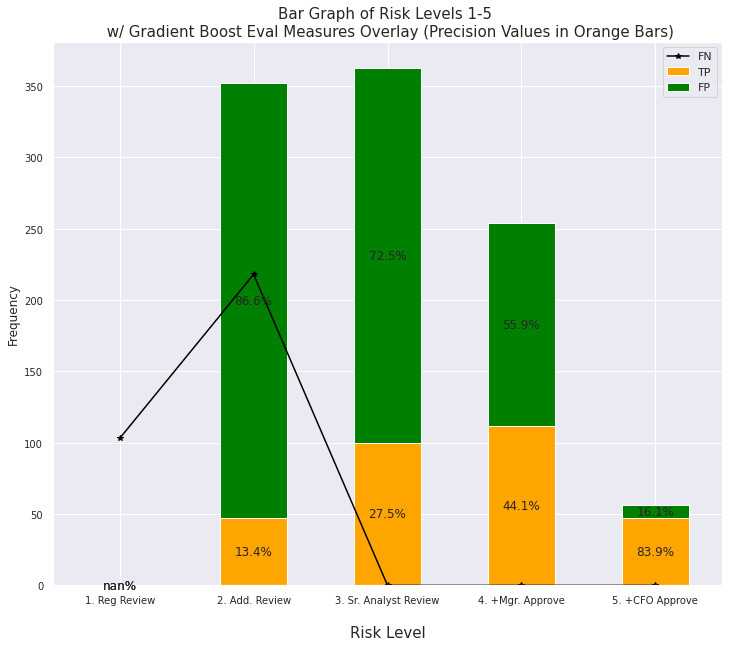

In [160]:
gbt_bar_df02 = gbt_bar_df.copy()
gbt_bar_df02['tp'] = 0
gbt_bar_df02['fp'] = 0
gbt_bar_df02['tn'] = 0
gbt_bar_df02['fn'] = 0

gbt_bar_df02.loc[(gbt_bar_df02.actual == 1) & (gbt_bar_df02.predicted == 1), 
                                                                     'tp'] = 1
gbt_bar_df02.loc[(gbt_bar_df02.actual == 0) & (gbt_bar_df02.predicted == 1), 
                                                                     'fp'] = 1
gbt_bar_df02.loc[(gbt_bar_df02.actual == 0) & (gbt_bar_df02.predicted == 0), 
                                                                      'tn'] = 1
gbt_bar_df02.loc[(gbt_bar_df02.actual == 1) & (gbt_bar_df02.predicted == 0), 
                                                                      'fn'] = 1
#display(gbt_bar_df02.head())
print(gbt_bar_df02.shape)
gbt_bar_df02_gb = gbt_bar_df02.groupby(['risk_level'],
                                       sort=False)['tp', 'fp', 'tn', 'fn'].sum()
print(gbt_bar_df02_gb)

ax20 = gbt_bar_df02_gb[['tp', 'fp']].plot(kind='bar',
                                          stacked=True,
                                          figsize=(12, 10),
                                          color=['orange', 'green'])
gbt_bar_df02_gb['fn'].plot(kind='line',
                           stacked=True,
                           ax=ax20,
                           marker='*',
                           color='black')

# Label stacked bars
height_lst01 = []
for b in ax20.patches:
  height_lst01.append(b.get_height())

bar_len = int(len(height_lst01) / 2)
height_lst01a = height_lst01[:bar_len]
height_lst01b = height_lst01[bar_len:]
counter = 0

# Label individual bars (Kumar, 2021)
for b in ax20.patches:
    bar_h = b.get_height()
    bar_w = b.get_width()
    bar_x = b.get_x()
    bar_y = b.get_y()
    label_text = str(round((bar_h / (height_lst01a[counter] \
                                     + height_lst01b[counter]))*100, 1)) + '%'
    label_x = bar_x + bar_w / 2
    label_y = bar_y + bar_h / 2
    ax20.text(label_x,
              label_y,
              label_text,
              ha='center',
              va='center')

    counter += 1
    if counter >= bar_len:
      counter = 0

# plt.title(
#     'Normalized Bar Graph of Risk Levels 1-5 \n w/ Gradient Boost Eval Measures Overlay', 
#                                                 fontsize=20,  x=0.5, y=1.0)
plt.title(
    'Bar Graph of Risk Levels 1-5 \n w/ Gradient Boost Eval Measures Overlay (Precision Values in Orange Bars)',
                                                   fontsize=15, x=0.5, y=1.0)
ax20.set_xticklabels(['1. Reg Review', '2. Add. Review', '3. Sr. Analyst Review',
                                        '4. +Mgr. Approve', '5. +CFO Approve'])
#plt.xlabel('Risk Level')
ax20.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Risk Level',labelpad=20, fontsize=15)
plt.ylabel('Frequency')
plt.legend(['FN', 'TP', 'FP'])
plt.show()

#### Graph Risk Levels 1-5 by Normalized Confusion Matrix {-}

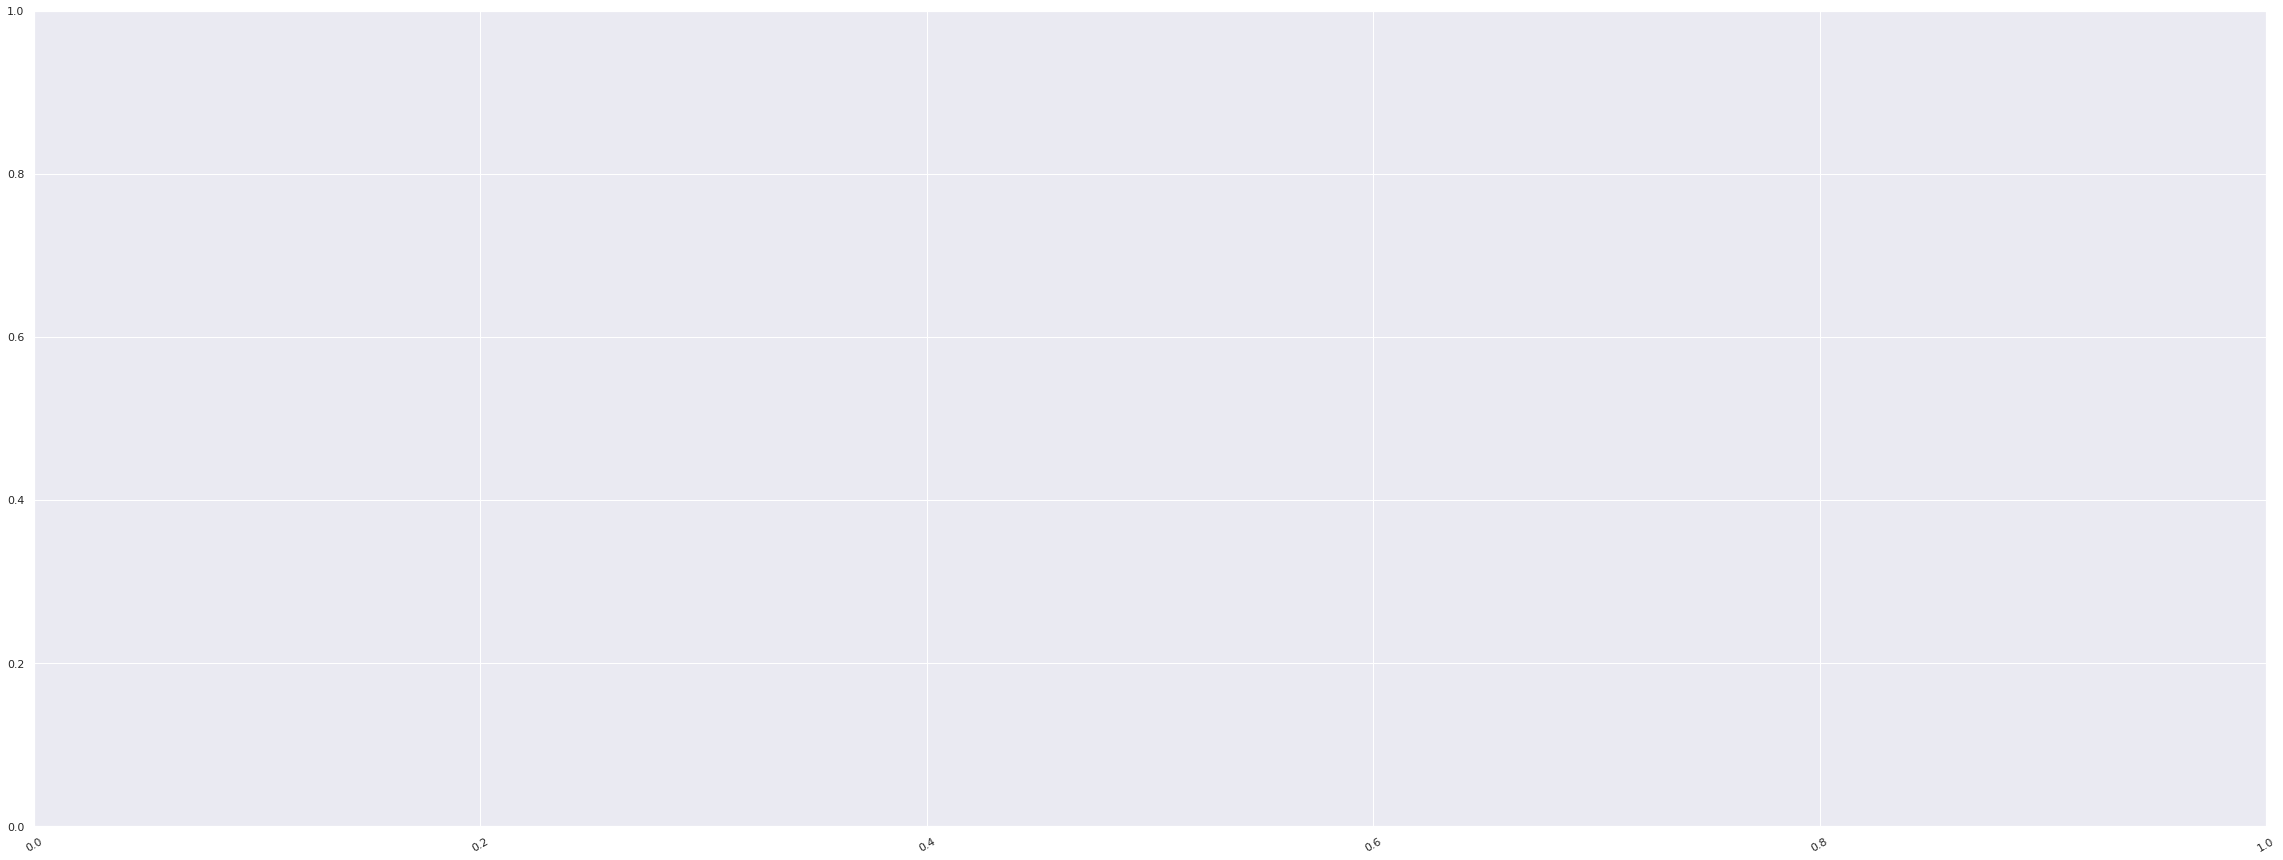

In [161]:
plt.tick_params(axis='x', labelrotation=30)

                                                     tp   fp    tn   fn
risk_level                                                             
1. Low Risk: Basic Review                             0    0  8982  103
2. Low Risk: Additional Review                       47  305  2694  218
3. Moderate Risk: Senior analyst review             100  263     0    0
4. Moderate Risk: Senior analyst review + manag...  112  142     0    0
5. High Risk: Senior analyst review + CFO signoff    47    9     0    0


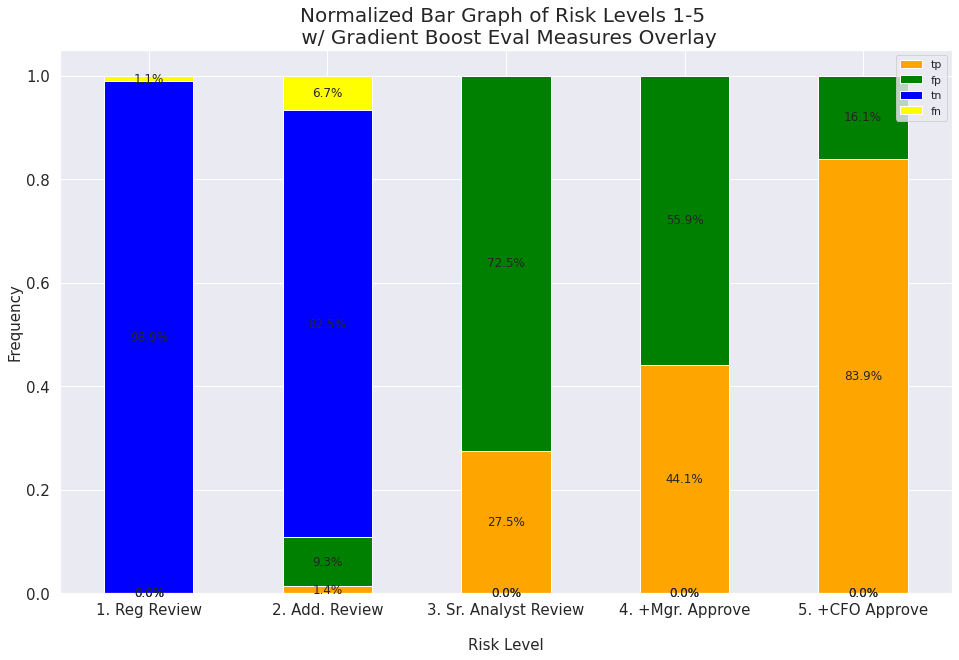

In [162]:
gbt_bar_df02_gb02 = gbt_bar_df02_gb.copy()
gbt_bar_df02_gb03 = gbt_bar_df02_gb02.div(gbt_bar_df02_gb02.sum(1), axis=0)
print(gbt_bar_df02_gb02)
#print(gbt_bar_df02_gb03)

ax30 = gbt_bar_df02_gb03[['tp',
                          'fp',
                          'tn',
                          'fn']].plot(kind='bar',
                                      stacked=True,
                                      figsize=(16, 10),
                                      color=['orange',
                                             'green',
                                             'blue',
                                             'yellow'])
#gbt_bar_df02_gb03['fn'].plot(kind='line',
#                             stacked=True,
#                             ax=ax30,
#                             marker='*',
#                             color='black')

# Label stacked bars
height_lst01 = []
for b in ax30.patches:
  height_lst01.append(b.get_height())

bar_len = int(len(height_lst01) / 2)
height_lst01a = height_lst01[:bar_len]
height_lst01b = height_lst01[bar_len:]
counter = 0

# Label individual bars (Kumar, 2021)
for b in ax30.patches:
    bar_h = b.get_height()
    bar_w = b.get_width()
    bar_x = b.get_x()
    bar_y = b.get_y()
#    label_text = str(round((bar_h / (height_lst01a[counter] \
#                                     + height_lst01b[counter]))*100, 1)) + '%'
    label_text = str(round(bar_h*100,1)) + '%'
    label_x = bar_x + bar_w / 2
    label_y = bar_y + bar_h / 2
    ax30.text(label_x,
              label_y,
              label_text,
              ha='center',
              va='center')

    counter += 1
    if counter >= bar_len:
      counter = 0
plt.title(
    'Normalized Bar Graph of Risk Levels 1-5 \n w/ Gradient Boost Eval Measures Overlay', 
                                                fontsize=20, x=0.5, y=1.0)
ax30.set_xticklabels(['1. Reg Review', '2. Add. Review', '3. Sr. Analyst Review',
                      '4. +Mgr. Approve', '5. +CFO Approve'])
plt.tick_params(axis='x', labelrotation=0)
ax30.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Risk Level',labelpad=20, fontsize=15)
plt.ylabel('Frequency', fontsize=15)
#plt.legend(['FN', 'TP', 'FP'])
plt.show()

In [164]:
# Convert Colab to PDF (Stack Overflow, n.d.)
#''''
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF '/content/drive/MyDrive/ADS505_Team1_Final_Project/Working Files/ADS-505_Team1_Final_Project_v2.ipynb'
#'''

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

# References {-}

- Geeks for Geeks. (2022, August 24). *ML | Handling imbalanced data with SMOTE and near miss algorithm in Python*. https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/ \
- Korstanje, J. (2021, August 29). Everything you need to know about SMOTE. With a full example walkthrough of SMOTE in Python. *Towards Data Science*. https://towardsdatascience.com/smote-fdce2f605729 \
- Kumar, B. (2021, October 29). Stacked bar chart Matplotlib - complete tutorial. *Python Guides*. https://pythonguides.com/stacked-bar-chart-matplotlib/ \
- Satopay, H. (2018, November 18). The ultimate markdown guide (for Jupyter Notebook). *Medium* https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd \
- Shmueli, G., Bruce, P. C., Gedeck, P., & Patel, N. R. (2020). *Data mining for business analytics: Concepts, techniques and applications in Python*. Wiley. \
- Stack Overflow. (n.d.). *Google Co-laboratory notebook PDF download*. https://stackoverflow.com/questions/52588552/google-co-laboratory-notebook-pdf-download \
- Zięba, M., Tomczak, S. K., & Tomczak, J. M. (2016a). Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction. *Expert Systems with Applications*, *58*, 93-101. https://doi.org/10.1016/j.eswa.2016.04.001. \
- Zięba, M., Tomczak, S. K., & Tomczak, J. M. (2016b). Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction [Data set]. *UCI Machine Learning Repository*.